# **COMPETENCIA KAGGLE - GRAFICOS** 

**IMPORTO LIBRERIAS**

In [1]:
import pandas as pd
import os
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error

import xgboost as xgb
from xgboost import plot_importance, plot_tree

import os
from datetime import datetime
pd.set_option('display.max_columns', None)


In [2]:


# Definir la ruta base
ruta_base = r'C:/Users/jnnov/OneDrive/Documentos/AUSTRAL/MATERIAS/2_CUAT_2DO/LABO 3\Datasets Competencia/1ERA COMPETENCIA'

# Leer los archivos
sell_in_path = os.path.join(ruta_base, 'sell-in.txt')
tb_productos_path = os.path.join(ruta_base, 'tb_productos.txt')
tb_stocks_path = os.path.join(ruta_base, 'tb_stocks.txt')
tb_productos_descripcion_path = os.path.join(ruta_base, 'tb_productos_descripcion.txt')

ruta_archivo = ruta_base + '/productos_predecir.xlsx'
productos_predecir = pd.read_excel(ruta_archivo)



sell_in = pd.read_csv(sell_in_path, sep='\t')  # Cambia 'sep' si el separador es diferente
tb_productos = pd.read_csv(tb_productos_path, sep='\t')
tb_productos_descripcion = pd.read_csv(tb_productos_descripcion_path, sep='\t')

tb_stocks = pd.read_csv(tb_stocks_path, sep='\t')

In [3]:
productos_predecir.head()

product_id
0       20001
1       20002
2       20003
3       20004
4       20005

In [4]:
sell_in.head(5)

periodo  customer_id  product_id  plan_precios_cuidados  cust_request_qty  \
0   201701        10234       20524                      0                 2   
1   201701        10032       20524                      0                 1   
2   201701        10217       20524                      0                 1   
3   201701        10125       20524                      0                 1   
4   201701        10012       20524                      0                11   

   cust_request_tn       tn  
0          0.05300  0.05300  
1          0.13628  0.13628  
2          0.03028  0.03028  
3          0.02271  0.02271  
4          1.54452  1.54452

In [5]:
tb_productos.head(5)

cat1         cat2     cat3    brand  sku_size  product_id
0   HC  ROPA LAVADO  Liquido  LIMPIEX       900       20280
1   HC  ROPA LAVADO  Liquido  LIMPIEX       450       20180
2   HC  ROPA LAVADO  Liquido  LIMPIEX       120       20332
3   HC  ROPA LAVADO  Liquido  LIMPIEX       450       20222
4   HC  ROPA LAVADO  Liquido  LIMPIEX       900       20288

In [6]:
tb_productos_descripcion.head()

cat1      cat2         cat3   brand  sku_size  product_id  \
0  FOODS  ADEREZOS  Aji Picante  NATURA       240       20609   
1  FOODS  ADEREZOS     Barbacoa  NATURA       250       20266   
2  FOODS  ADEREZOS     Barbacoa  NATURA       400       20325   
3  FOODS  ADEREZOS     Barbacoa  NATURA       500       20503   
4  FOODS  ADEREZOS  Chimichurri  NATURA       350       20797   

         descripcion  
0  Salsa Aji Picante  
1     Salsa Barbacoa  
2     Salsa Barbacoa  
3     Salsa Barbacoa  
4        Chimichurri

---
---

#### **TN VENDIDAS POR MES**

In [7]:
sell_in.groupby('periodo')['tn'].sum().reset_index()

periodo           tn
0    201701  34057.31784
1    201702  34568.65311
2    201703  46040.59636
3    201704  39625.52445
4    201705  45579.63296
5    201706  44853.30050
6    201707  36925.20583
7    201708  40206.38305
8    201709  47934.65801
9    201710  49750.29319
10   201711  44016.26586
11   201712  36752.63501
12   201801  31304.63253
13   201802  35102.81844
14   201803  49608.26718
15   201804  37277.36210
16   201805  41466.99618
17   201806  35758.98480
18   201807  33699.70259
19   201808  37553.11923
20   201809  33840.68678
21   201810  37144.45821
22   201811  34244.88145
23   201812  27446.44548
24   201901  29976.63108
25   201902  31040.41869
26   201903  35886.34281
27   201904  34520.09273
28   201905  33588.29821
29   201906  33147.50439
30   201907  34130.17318
31   201908  25652.96118
32   201909  35040.08141
33   201910  37022.56717
34   201911  34007.62914
35   201912  26217.06728

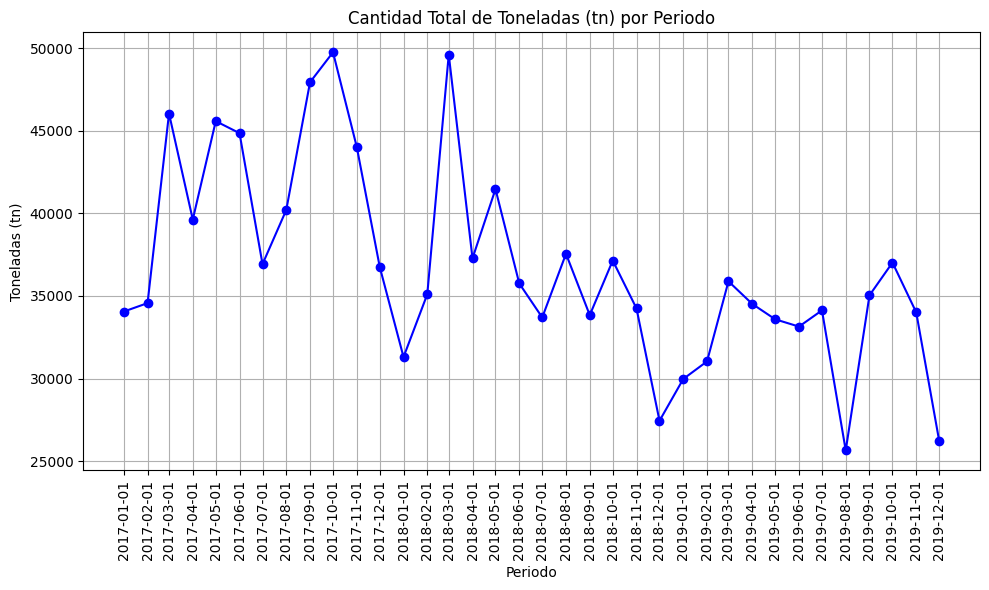

In [8]:

# Cargar el DataFrame desde el archivo

# Calcular la cantidad total de toneladas (tn) por periodo
total_tn_por_periodo = sell_in.groupby('periodo')['tn'].sum().reset_index()

# Convertir la columna 'periodo' a tipo datetime para el gráfico de línea
total_tn_por_periodo['periodo'] = pd.to_datetime(total_tn_por_periodo['periodo'], format='%Y%m')

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(total_tn_por_periodo['periodo'], total_tn_por_periodo['tn'], marker='o', linestyle='-', color='b')
plt.title('Cantidad Total de Toneladas (tn) por Periodo')
plt.xlabel('Periodo')
plt.ylabel('Toneladas (tn)')
plt.grid(True)
#plt.xticks(rotation=45)
#plt.tight_layout()

# Mostrar el gráfico
#plt.show()
# Ajustar las etiquetas del eje x para que estén en formato vertical
plt.xticks(rotation=90)

# Asegurar que todas las etiquetas se muestren
plt.gca().set_xticks(total_tn_por_periodo['periodo'])

# Ajustar el diseño para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

---
---

#### **Combinacion de sell in y de productos_descripcion**

In [9]:
sell_in_productos = pd.merge(sell_in, tb_productos_descripcion,  on='product_id', how='left')

In [10]:
sell_in_productos.head()

periodo  customer_id  product_id  plan_precios_cuidados  cust_request_qty  \
0   201701        10234       20524                      0                 2   
1   201701        10032       20524                      0                 1   
2   201701        10217       20524                      0                 1   
3   201701        10125       20524                      0                 1   
4   201701        10012       20524                      0                11   

   cust_request_tn       tn cat1     cat2        cat3      brand  sku_size  \
0          0.05300  0.05300   HC  VAJILLA  Cristalino  Importado     500.0   
1          0.13628  0.13628   HC  VAJILLA  Cristalino  Importado     500.0   
2          0.03028  0.03028   HC  VAJILLA  Cristalino  Importado     500.0   
3          0.02271  0.02271   HC  VAJILLA  Cristalino  Importado     500.0   
4          1.54452  1.54452   HC  VAJILLA  Cristalino  Importado     500.0   

     descripcion  
0  Abrillantador  
1  Abrillantador  
2  Abrillantador  
3  Abrillantador  
4  Abrillantador

In [11]:
sell_in.shape

(2945818, 7)

In [12]:
sell_in_productos.shape

(2945818, 13)

In [13]:
sell_in_productos.isna().sum()

periodo                     0
customer_id                 0
product_id                  0
plan_precios_cuidados       0
cust_request_qty            0
cust_request_tn             0
tn                          0
cat1                     7448
cat2                     7448
cat3                     7448
brand                    7448
sku_size                 7448
descripcion              7448
dtype: int64

---
----

### **TOP CLIENTES CON MAS VENTAS**

In [14]:
# Filtrar los periodos deseados
periodos2019 = [201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912]
sell_in_2019 = sell_in_productos[sell_in_productos['periodo'].isin(periodos2019)]

# Agrupar por customer_id y sumar las tn
sell_in_2019_customer = sell_in_2019.groupby('customer_id')['tn'].sum().reset_index()

# Ordenar de mayor a menor por tn
sell_in_2019_customer = sell_in_2019_customer.sort_values(by='tn', ascending=False).reset_index(drop=True)


# Calcular el total de tn
total_tn = sell_in_2019_customer['tn'].sum()

# Agregar la columna con el porcentaje de tn sobre el total
sell_in_2019_customer['porcentaje_tn'] = (sell_in_2019_customer['tn'] / total_tn) * 100

# Agregar la columna con la suma acumulada de percentage
sell_in_2019_customer['acum_porcentaje_tn'] = sell_in_2019_customer['porcentaje_tn'].cumsum()

print(sell_in_2019_customer)

     customer_id           tn  porcentaje_tn  acum_porcentaje_tn
0          10001  33685.89001       8.632322            8.632322
1          10002  25948.00375       6.649417           15.281739
2          10003  20514.40695       5.257007           20.538746
3          10004  15890.07730       4.071980           24.610726
4          10005  14958.13439       3.833161           28.443887
..           ...          ...            ...                 ...
529        10581      0.50101       0.000128           99.999671
530        10574      0.44403       0.000114           99.999785
531        10618      0.42129       0.000108           99.999893
532        10524      0.22126       0.000057           99.999950
533        10604      0.19666       0.000050          100.000000

[534 rows x 4 columns]


In [15]:
sell_in_2019_customer.head(30)

customer_id           tn  porcentaje_tn  acum_porcentaje_tn
0         10001  33685.89001       8.632322            8.632322
1         10002  25948.00375       6.649417           15.281739
2         10003  20514.40695       5.257007           20.538746
3         10004  15890.07730       4.071980           24.610726
4         10005  14958.13439       3.833161           28.443887
5         10006  14147.63679       3.625463           32.069350
6         10007  13925.49036       3.568536           35.637886
7         10008  12793.61817       3.278483           38.916369
8         10009  11466.92699       2.938506           41.854876
9         10011  10268.90719       2.631503           44.486379
10        10010   9081.20146       2.327142           46.813521
11        10012   8365.08552       2.143631           48.957152
12        10013   8255.65270       2.115588           51.072739
13        10015   5478.48460       1.403913           52.476652
14        10016   5186.81261       1.329169           53.805821
15        10017   5064.41091       1.297802           55.103623
16        10019   4940.99805       1.266177           56.369800
17        10018   4935.89561       1.264869           57.634669
18        10021   4234.49411       1.085128           58.719797
19        10014   4105.19154       1.051993           59.771791
20        10023   3567.86069       0.914297           60.686088
21        10024   3480.41543       0.891889           61.577977
22        10022   3375.18786       0.864923           62.442900
23        10026   3157.96120       0.809257           63.252157
24        10020   2852.53603       0.730989           63.983146
25        10025   2786.38044       0.714036           64.697181
26        10032   2774.09501       0.710888           65.408069
27        10031   2772.46325       0.710469           66.118539
28        10027   2708.87108       0.694173           66.812712
29        10030   2707.88663       0.693921           67.506633

Los 12 mejores clientes, son los que compraron el 50% de la mercaderia.

In [16]:
customer_ids_top_50 = sell_in_2019_customer.head(12)['customer_id'].tolist()
customer_ids_top_50


[10001,
 10002,
 10003,
 10004,
 10005,
 10006,
 10007,
 10008,
 10009,
 10011,
 10010,
 10012]

---
----

### **TOP PRODUCTOS CON MAS VENTAS 2019**

In [17]:
periodos2019 = [201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912]
sell_in_2019 = sell_in_productos[sell_in_productos['periodo'].isin(periodos2019)]


In [18]:
sell_in_2019 = sell_in_2019.groupby(['periodo', 'product_id']).agg({
    'tn': 'sum',
}).reset_index()

In [19]:
sell_in_2019

periodo  product_id          tn
0       201901       20001  1275.77351
1       201901       20002  1266.78751
2       201901       20003   964.76919
3       201901       20004   511.33713
4       201901       20005   363.58438
...        ...         ...         ...
11026   201912       21265     0.05007
11027   201912       21266     0.05121
11028   201912       21267     0.01569
11029   201912       21271     0.00298
11030   201912       21276     0.00892

[11031 rows x 3 columns]

In [20]:

sell_in_2019 = sell_in_2019.sort_values(by=['periodo', 'tn'], ascending=[True, False]).reset_index(drop=True)


# Calcular el total de tn
total_tn = sell_in_2019['tn'].sum()

# Agregar la columna con el porcentaje de tn sobre el total
sell_in_2019['porcentaje_tn'] = (sell_in_2019['tn'] / total_tn) * 100

# Agregar la columna con la suma acumulada de percentage
sell_in_2019['acum_porcentaje_tn'] = sell_in_2019['porcentaje_tn'].cumsum()

print(sell_in_2019)

       periodo  product_id          tn  porcentaje_tn  acum_porcentaje_tn
0       201901       20001  1275.77351   3.269288e-01            0.326929
1       201901       20002  1266.78751   3.246261e-01            0.651555
2       201901       20003   964.76919   2.472311e-01            0.898786
3       201901       20006   578.74461   1.483087e-01            1.047095
4       201901       20008   543.27828   1.392201e-01            1.186315
...        ...         ...         ...            ...                 ...
11026   201912       20784     0.00450   1.153167e-06           99.999997
11027   201912       21255     0.00328   8.405304e-07           99.999998
11028   201912       21074     0.00311   7.969664e-07           99.999999
11029   201912       21271     0.00298   7.636527e-07          100.000000
11030   201912       21023     0.00126   3.228867e-07          100.000000

[11031 rows x 5 columns]


In [21]:
sell_in_2019

periodo  product_id          tn  porcentaje_tn  acum_porcentaje_tn
0       201901       20001  1275.77351   3.269288e-01            0.326929
1       201901       20002  1266.78751   3.246261e-01            0.651555
2       201901       20003   964.76919   2.472311e-01            0.898786
3       201901       20006   578.74461   1.483087e-01            1.047095
4       201901       20008   543.27828   1.392201e-01            1.186315
...        ...         ...         ...            ...                 ...
11026   201912       20784     0.00450   1.153167e-06           99.999997
11027   201912       21255     0.00328   8.405304e-07           99.999998
11028   201912       21074     0.00311   7.969664e-07           99.999999
11029   201912       21271     0.00298   7.636527e-07          100.000000
11030   201912       21023     0.00126   3.228867e-07          100.000000

[11031 rows x 5 columns]

**SOLO PRODUCTOS**

In [22]:
sell_in_group2019 = sell_in_2019.groupby([ 'product_id']).agg({
    'tn': 'sum',
}).reset_index()

In [23]:
sell_in_group2019

product_id           tn
0          20001  17456.79264
1          20002  14105.24570
2          20003   9419.71689
3          20004   7526.58394
4          20005   8019.24125
...          ...          ...
1079       21267      0.92835
1080       21269      0.87024
1081       21270      0.81278
1082       21271      0.17614
1083       21276      0.45447

[1084 rows x 2 columns]

In [24]:

sell_in_group2019 = sell_in_group2019.sort_values(by='tn', ascending=False).reset_index(drop=True)

# Calcular el total de tn
total_tn = sell_in_group2019['tn'].sum()

# Agregar la columna con el porcentaje de tn sobre el total
sell_in_group2019['porcentaje_tn'] = (sell_in_group2019['tn'] / total_tn) * 100

# Agregar la columna con la suma acumulada de percentage
sell_in_group2019['acum_porcentaje_tn'] = sell_in_group2019['porcentaje_tn'].cumsum()

print(sell_in_group2019)

      product_id           tn  porcentaje_tn  acum_porcentaje_tn
0          20001  17456.79264   4.473465e+00            4.473465
1          20002  14105.24570   3.614600e+00            8.088065
2          20003   9419.71689   2.413890e+00           10.501955
3          20005   8019.24125   2.055005e+00           12.556960
4          20004   7526.58394   1.928757e+00           14.485717
...          ...          ...            ...                 ...
1079       21030      0.04540   1.163417e-05           99.999989
1080       21178      0.02654   6.801121e-06           99.999996
1081       21036      0.01223   3.134051e-06           99.999999
1082       21019      0.00280   7.175260e-07          100.000000
1083       20856      0.00109   2.793226e-07          100.000000

[1084 rows x 4 columns]


In [25]:
sell_in_group2019.head(50)

product_id           tn  porcentaje_tn  acum_porcentaje_tn
0        20001  17456.79264       4.473465            4.473465
1        20002  14105.24570       3.614600            8.088065
2        20003   9419.71689       2.413890           10.501955
3        20005   8019.24125       2.055005           12.556960
4        20004   7526.58394       1.928757           14.485717
5        20009   6495.87104       1.664627           16.150344
6        20032   6493.67026       1.664063           17.814408
7        20006   5743.36450       1.471790           19.286198
8        20007   5209.65367       1.335022           20.621220
9        20010   5154.89593       1.320990           21.942210
10       20008   5064.57820       1.297845           23.240055
11       20013   4992.75504       1.279440           24.519495
12       20014   4976.46240       1.275265           25.794760
13       20011   4531.62528       1.161271           26.956031
14       20015   4428.28382       1.134789           28.090820
15       20012   3986.74662       1.021641           29.112461
16       20019   3678.25953       0.942588           30.055049
17       20016   3462.17508       0.887215           30.942263
18       20017   3448.62902       0.883743           31.826006
19       20020   3361.22825       0.861346           32.687352
20       20022   3350.44804       0.858583           33.545936
21       20018   3305.34133       0.847024           34.392960
22       20023   3202.81416       0.820751           35.213711
23       20021   3113.94798       0.797978           36.011689
24       20026   2845.27486       0.729128           36.740817
25       20027   2760.17901       0.707321           37.448139
26       20025   2674.34622       0.685326           38.133465
27       20024   2665.38636       0.683030           38.816495
28       20028   2558.73618       0.655700           39.472195
29       20049   2447.83812       0.627281           40.099476
30       20089   2356.18408       0.603794           40.703270
31       20085   2289.56547       0.586722           41.289992
32       20031   2230.89464       0.571687           41.861680
33       20029   2221.95298       0.569396           42.431076
34       20037   2155.80070       0.552444           42.983520
35       20033   2112.38937       0.541319           43.524839
36       20038   2111.29878       0.541040           44.065879
37       20042   2095.62889       0.537024           44.602903
38       20035   2066.29204       0.529507           45.132410
39       20044   2032.96506       0.520966           45.653376
40       20047   1984.24758       0.508482           46.161858
41       20048   1982.12277       0.507937           46.669795
42       20046   1871.99719       0.479717           47.149512
43       20045   1853.10083       0.474874           47.624386
44       20051   1810.52615       0.463964           48.088350
45       20053   1752.78703       0.449168           48.537518
46       20039   1732.48221       0.443965           48.981483
47       20041   1730.85589       0.443548           49.425031
48       20059   1657.60918       0.424778           49.849809
49       20054   1654.46211       0.423971           50.273780

El 50 top de los productos, venden el 50% de las tn.

----
-----

## **GRAFICO HISTORICO DE LOS TOPS 50**

In [26]:
sell_in_group = sell_in.groupby(['periodo', 'product_id']).agg({
    'tn': 'sum',
}).reset_index()

In [27]:
sell_in_group

periodo  product_id          tn
0       201701       20001   934.77222
1       201701       20002   550.15707
2       201701       20003  1063.45835
3       201701       20004   555.91614
4       201701       20005   494.27011
...        ...         ...         ...
31238   201912       21265     0.05007
31239   201912       21266     0.05121
31240   201912       21267     0.01569
31241   201912       21271     0.00298
31242   201912       21276     0.00892

[31243 rows x 3 columns]

In [28]:

sell_in_group = sell_in_group.sort_values(by=['periodo', 'tn'], ascending=[True, False]).reset_index(drop=True)


# Calcular el total de tn
total_tn = sell_in_group['tn'].sum()

# Agregar la columna con el porcentaje de tn sobre el total
sell_in_group['porcentaje_tn'] = (sell_in_group['tn'] / total_tn) * 100

# Agregar la columna con la suma acumulada de percentage
sell_in_group['acum_porcentaje_tn'] = sell_in_group['porcentaje_tn'].cumsum()

print(sell_in_group)

       periodo  product_id          tn  porcentaje_tn  acum_porcentaje_tn
0       201701       20003  1063.45835   8.026170e-02            0.080262
1       201701       20001   934.77222   7.054945e-02            0.150811
2       201701       20004   555.91614   4.195630e-02            0.192767
3       201701       20002   550.15707   4.152165e-02            0.234289
4       201701       20006   528.40996   3.988034e-02            0.274169
...        ...         ...         ...            ...                 ...
31238   201912       20784     0.00450   3.396256e-07           99.999999
31239   201912       21255     0.00328   2.475493e-07           99.999999
31240   201912       21074     0.00311   2.347190e-07          100.000000
31241   201912       21271     0.00298   2.249076e-07          100.000000
31242   201912       21023     0.00126   9.509516e-08          100.000000

[31243 rows x 5 columns]


In [29]:
# Obtener los primeros 50 registros y luego listar los product_id
product_ids_top_50 = sell_in_group2019.head(50)['product_id'].tolist()

print(product_ids_top_50)

[20001, 20002, 20003, 20005, 20004, 20009, 20032, 20006, 20007, 20010, 20008, 20013, 20014, 20011, 20015, 20012, 20019, 20016, 20017, 20020, 20022, 20018, 20023, 20021, 20026, 20027, 20025, 20024, 20028, 20049, 20089, 20085, 20031, 20029, 20037, 20033, 20038, 20042, 20035, 20044, 20047, 20048, 20046, 20045, 20051, 20053, 20039, 20041, 20059, 20054]


In [30]:

# Filtrar sell_in_2019 por los product_ids_top_50
sell_in_group_top50 = sell_in_group[sell_in_group['product_id'].isin(product_ids_top_50)].reset_index(drop=True)

print(sell_in_group_top50)

      periodo  product_id          tn  porcentaje_tn  acum_porcentaje_tn
0      201701       20003  1063.45835       0.080262            0.080262
1      201701       20001   934.77222       0.070549            0.150811
2      201701       20004   555.91614       0.041956            0.192767
3      201701       20002   550.15707       0.041522            0.234289
4      201701       20006   528.40996       0.039880            0.274169
...       ...         ...         ...            ...                 ...
1723   201912       20033    96.76212       0.007303           99.201361
1724   201912       20047    71.49763       0.005396           99.349235
1725   201912       20037    63.37274       0.004783           99.403813
1726   201912       20044    59.61747       0.004499           99.426881
1727   201912       20048    58.89241       0.004445           99.440252

[1728 rows x 5 columns]


In [31]:
sell_in_group_top50.head(60)

periodo  product_id          tn  porcentaje_tn  acum_porcentaje_tn
0    201701       20003  1063.45835       0.080262            0.080262
1    201701       20001   934.77222       0.070549            0.150811
2    201701       20004   555.91614       0.041956            0.192767
3    201701       20002   550.15707       0.041522            0.234289
4    201701       20006   528.40996       0.039880            0.274169
5    201701       20008   523.04609       0.039476            0.313645
6    201701       20005   494.27011       0.037304            0.350949
7    201701       20011   489.25422       0.036925            0.387874
8    201701       20012   476.39728       0.035955            0.423829
9    201701       20007   464.67137       0.035070            0.458899
10   201701       20010   441.25546       0.033303            0.492201
11   201701       20013   433.34928       0.032706            0.524907
12   201701       20019   409.57240       0.030911            0.555818
13   201701       20009   378.08172       0.028535            0.643787
14   201701       20018   343.26728       0.025907            0.696438
15   201701       20021   331.17312       0.024994            0.721433
16   201701       20017   327.60433       0.024725            0.746158
17   201701       20022   316.55771       0.023891            0.770049
18   201701       20024   313.33302       0.023648            0.793697
19   201701       20015   304.24755       0.022962            0.816659
20   201701       20016   293.66064       0.022163            0.838823
21   201701       20020   293.38983       0.022143            0.860965
22   201701       20028   280.32732       0.021157            0.882122
23   201701       20046   258.48155       0.019508            0.901631
24   201701       20014   248.65917       0.018767            0.939343
25   201701       20029   236.03158       0.017814            0.993760
26   201701       20039   232.57636       0.017553            1.028960
27   201701       20038   230.12367       0.017368            1.063862
28   201701       20027   223.33358       0.016856            1.080717
29   201701       20048   209.69153       0.015826            1.096543
30   201701       20023   207.13875       0.015633            1.112177
31   201701       20033   196.83573       0.014856            1.142605
32   201701       20035   196.32423       0.014817            1.157422
33   201701       20044   194.83483       0.014705            1.172127
34   201701       20041   191.12626       0.014425            1.186551
35   201701       20026   184.40020       0.013917            1.200469
36   201701       20047   180.06395       0.013590            1.214058
37   201701       20053   170.59296       0.012875            1.267165
38   201701       20025   166.81392       0.012590            1.292577
39   201701       20042   158.67551       0.011976            1.316623
40   201701       20054   157.74961       0.011906            1.340475
41   201701       20059   142.46939       0.010752            1.441371
42   201701       20031   138.09868       0.010423            1.473021
43   201701       20051   124.07345       0.009364            1.532555
44   201701       20045   114.16856       0.008617            1.585101
45   201701       20037   107.01826       0.008077            1.643569
46   201702       20001   798.01620       0.060228            2.630614
47   201702       20003   752.11520       0.056764            2.687378
48   201702       20007   638.62996       0.048199            2.735577
49   201702       20008   631.71430       0.047677            2.783254
50   201702       20006   599.18590       0.045222            2.828476
51   201702       20010   562.98287       0.042490            2.870965
52   201702       20005   551.43060       0.041618            2.912583
53   201702       20012   509.04048       0.038418            2.951002
54   201702       20004   508.20044       0.038355            2.989357
55   201702       20002   50

In [32]:
import matplotlib.dates as mdates


In [33]:
product_ids_top_50 =[20001, 20002, 20003, 20005, 20004, 20009, 20032, 20006, 20007, 20010, 20008, 20013, 20014, 20011, 20015, 20012, 20019, 20016, 20017, 20020, 20022, 20018, 20023, 20021, 20026, 20027, 20025, 20024, 20028, 20049, 20089, 20085, 20031, 20029, 20037, 20033, 20038, 20042, 20035, 20044, 20047, 20048, 20046, 20045, 20051, 20053, 20039, 20041, 20059, 20054]


In [56]:
import os

product_ids_top_50_df = pd.DataFrame(product_ids_top_50, columns=['columna_1'])


# Nombre del archivo CSV
nombre_archivo = 'product_ids_top_50.csv'

# Ruta completa de salida para guardar en Excel
ruta_salida = 'C:/Users/jnnov/OneDrive/Documentos/AUSTRAL/MATERIAS/2_CUAT_2DO/LABO 3/Datasets Competencia/1ERA COMPETENCIA/Predicciones/' + nombre_archivo

# Guardar el DataFrame en un archivo CSV
product_ids_top_50_df.to_csv(ruta_salida, index=False)


In [34]:
sell_in_group_top50.head()

periodo  product_id          tn  porcentaje_tn  acum_porcentaje_tn
0   201701       20003  1063.45835       0.080262            0.080262
1   201701       20001   934.77222       0.070549            0.150811
2   201701       20004   555.91614       0.041956            0.192767
3   201701       20002   550.15707       0.041522            0.234289
4   201701       20006   528.40996       0.039880            0.274169

In [35]:
sell_in_group_top50 = sell_in_group_top50.set_index('product_id').loc[product_ids_top_50].reset_index()


In [36]:
sell_in_group_top50.head()

product_id  periodo          tn  porcentaje_tn  acum_porcentaje_tn
0       20001   201701   934.77222       0.070549            0.150811
1       20001   201702   798.01620       0.060228            2.630614
2       20001   201703  1303.35771       0.098367            5.277731
3       20001   201704  1069.96130       0.080752            8.734908
4       20001   201705  1502.20132       0.113375           11.758161

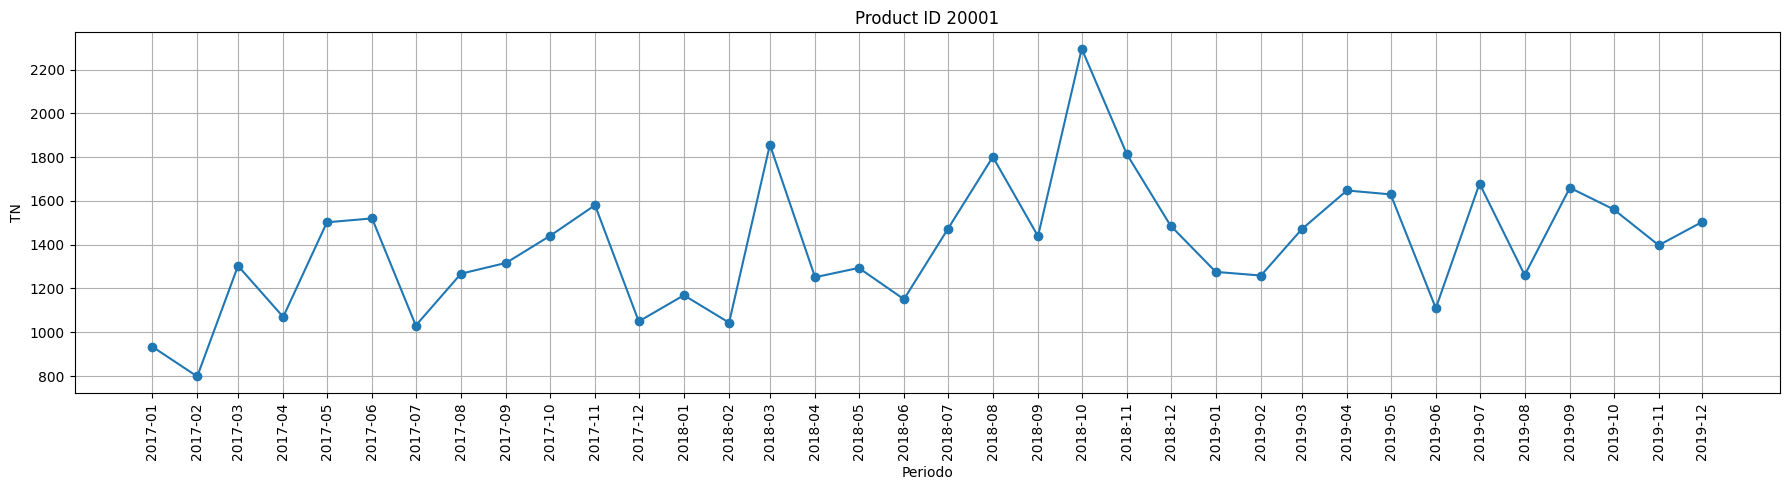

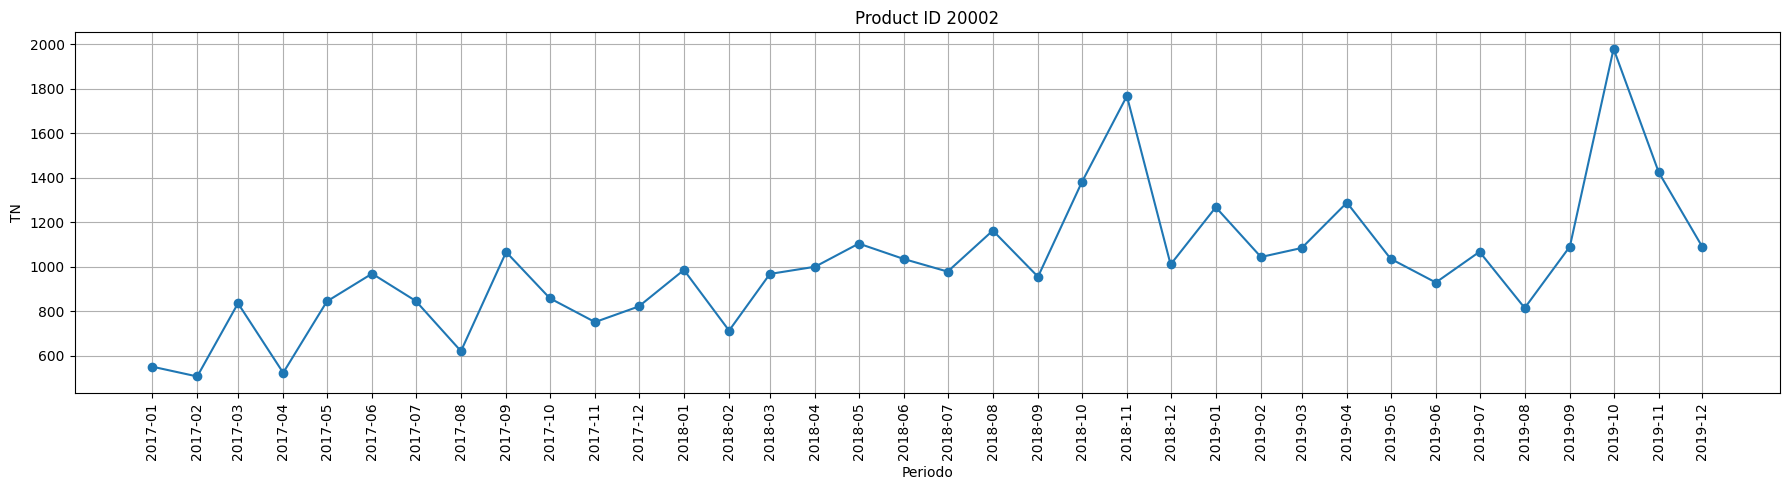

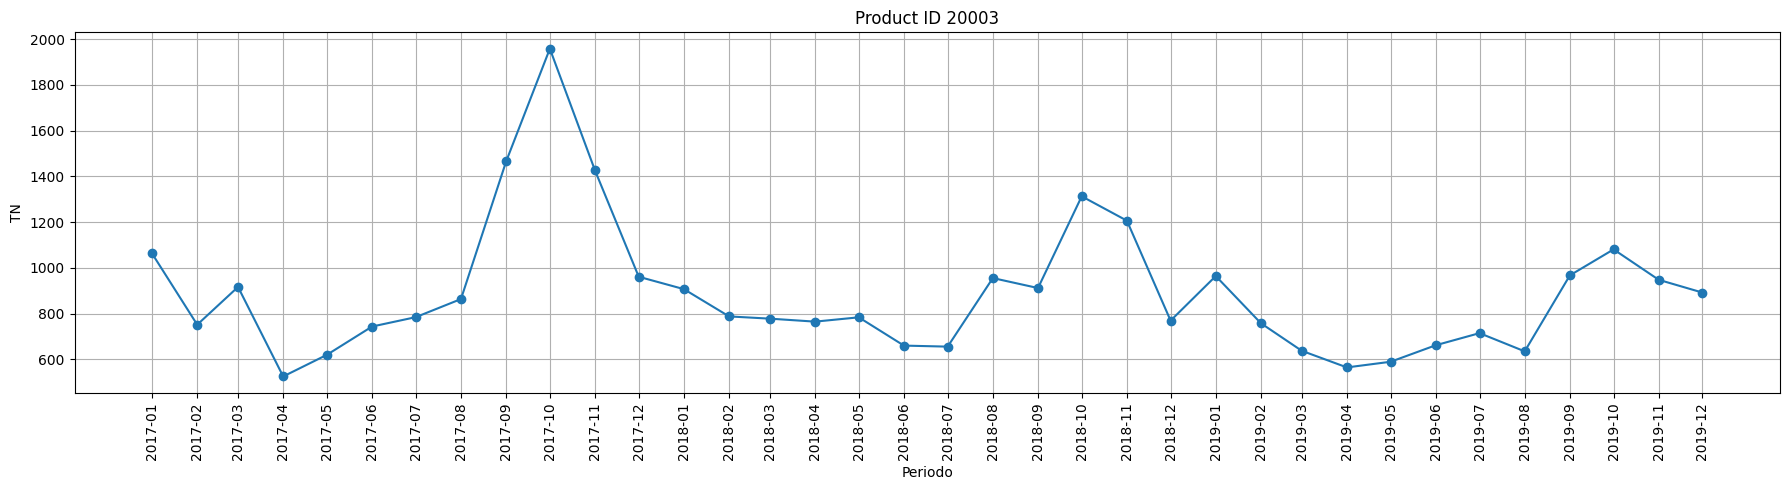

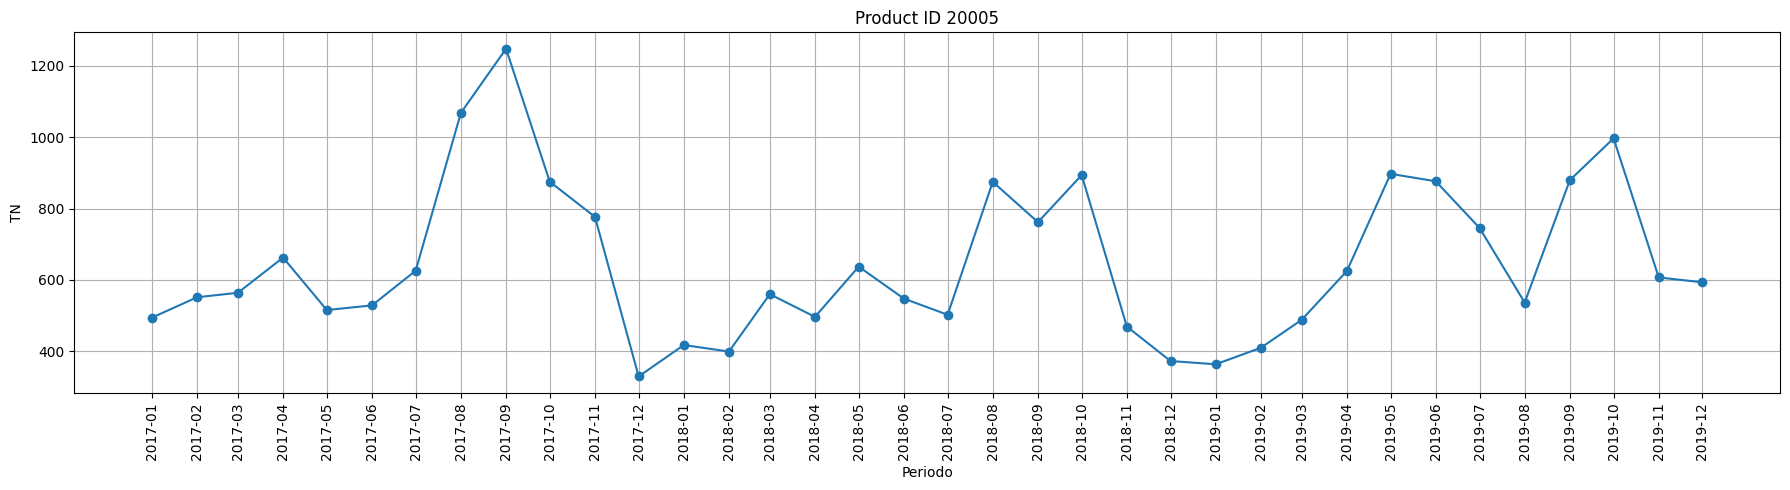

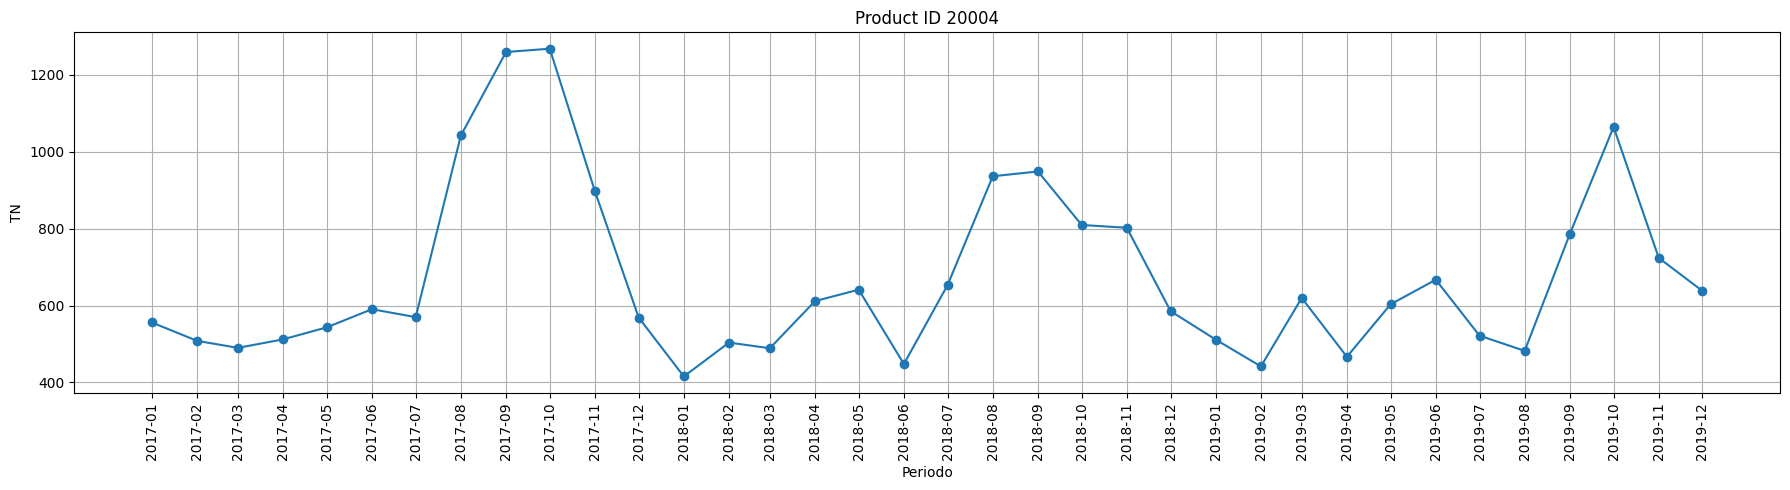

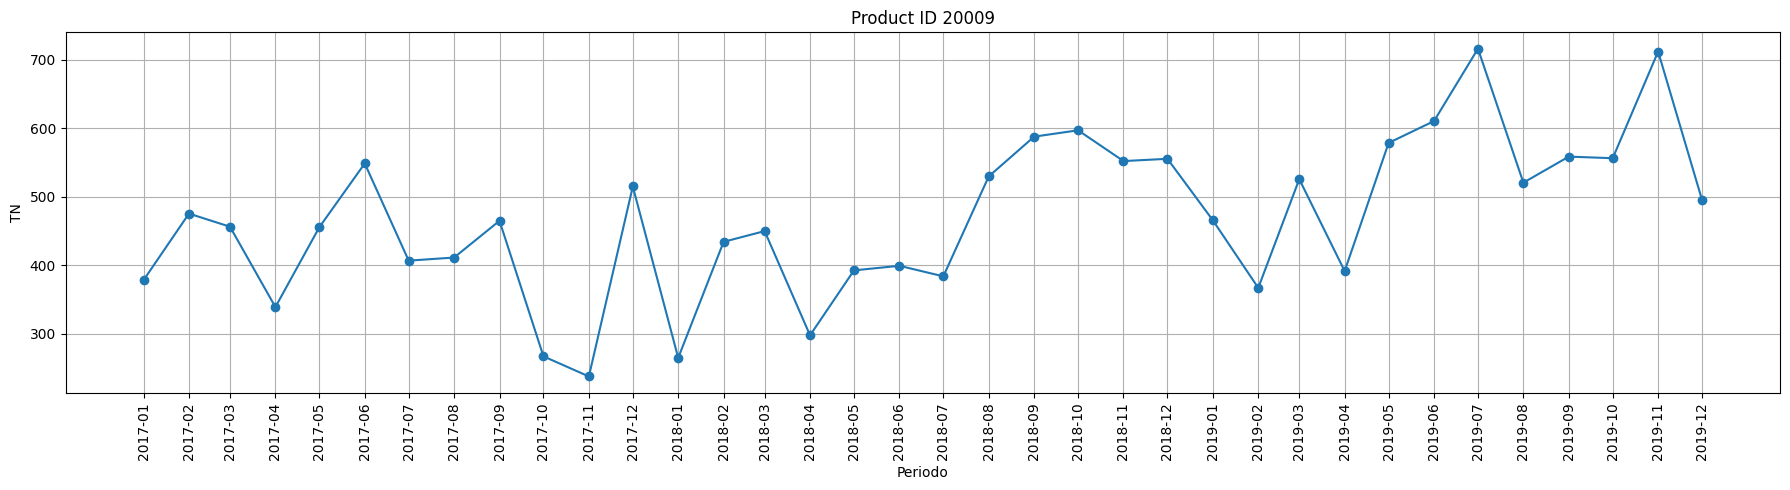

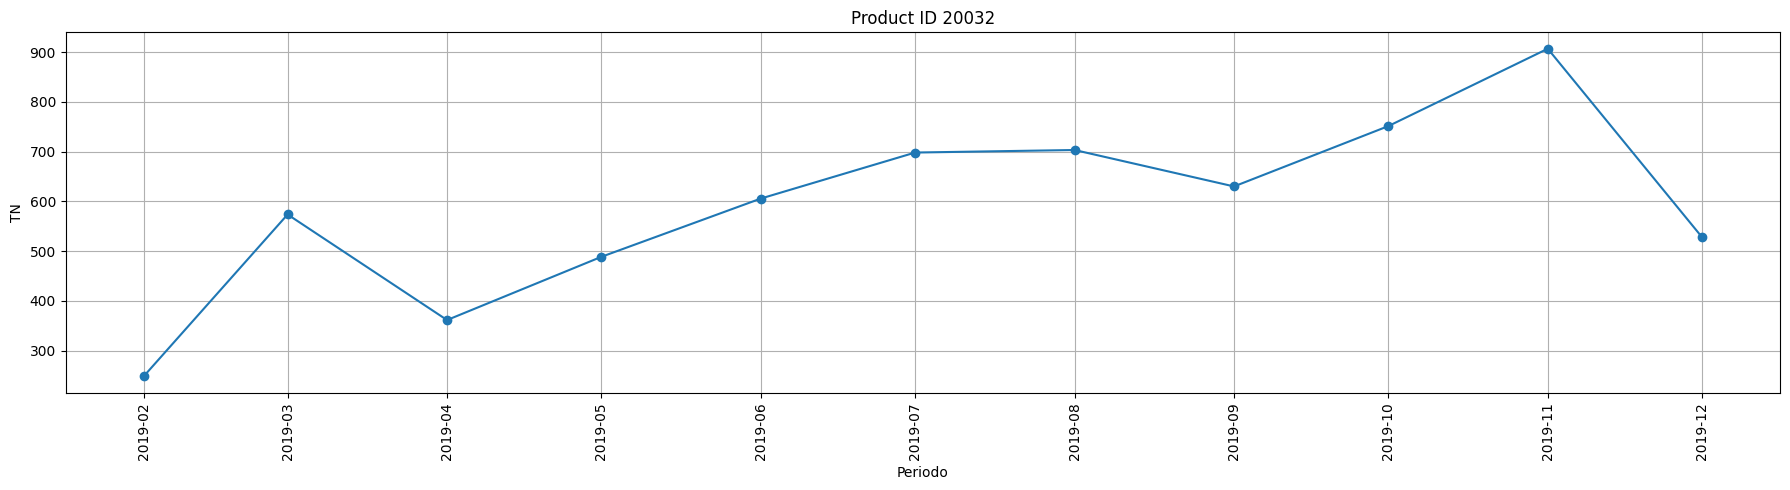

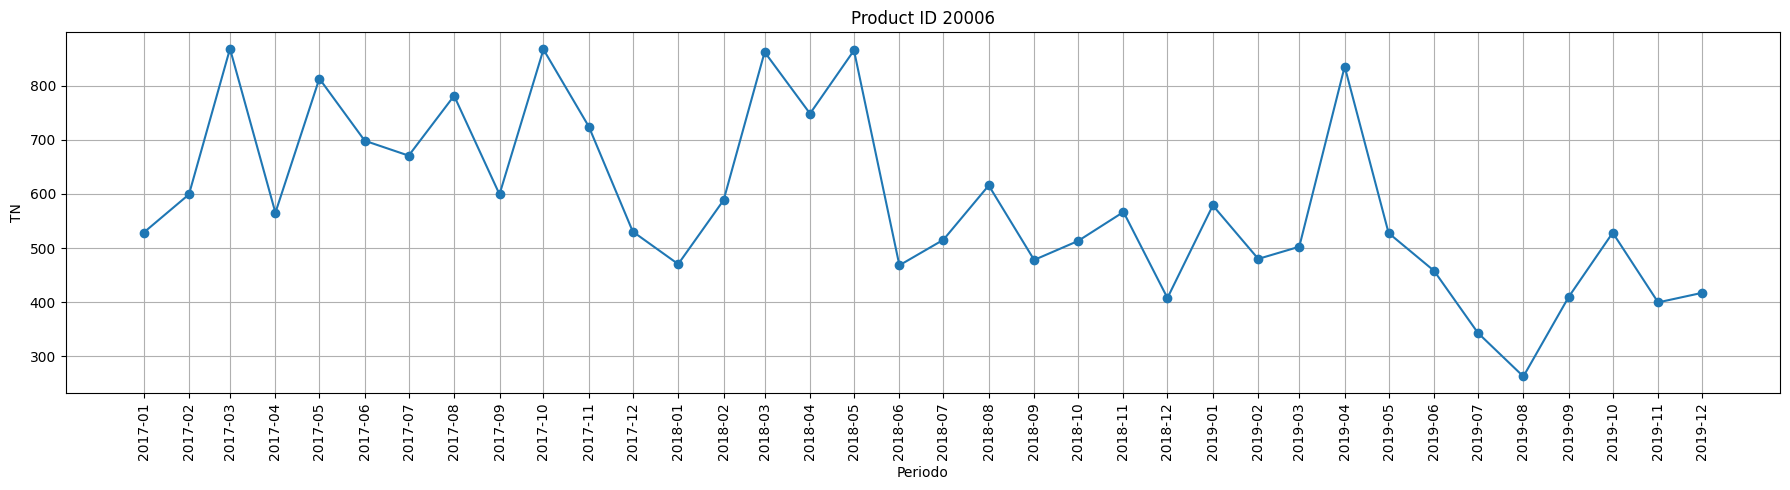

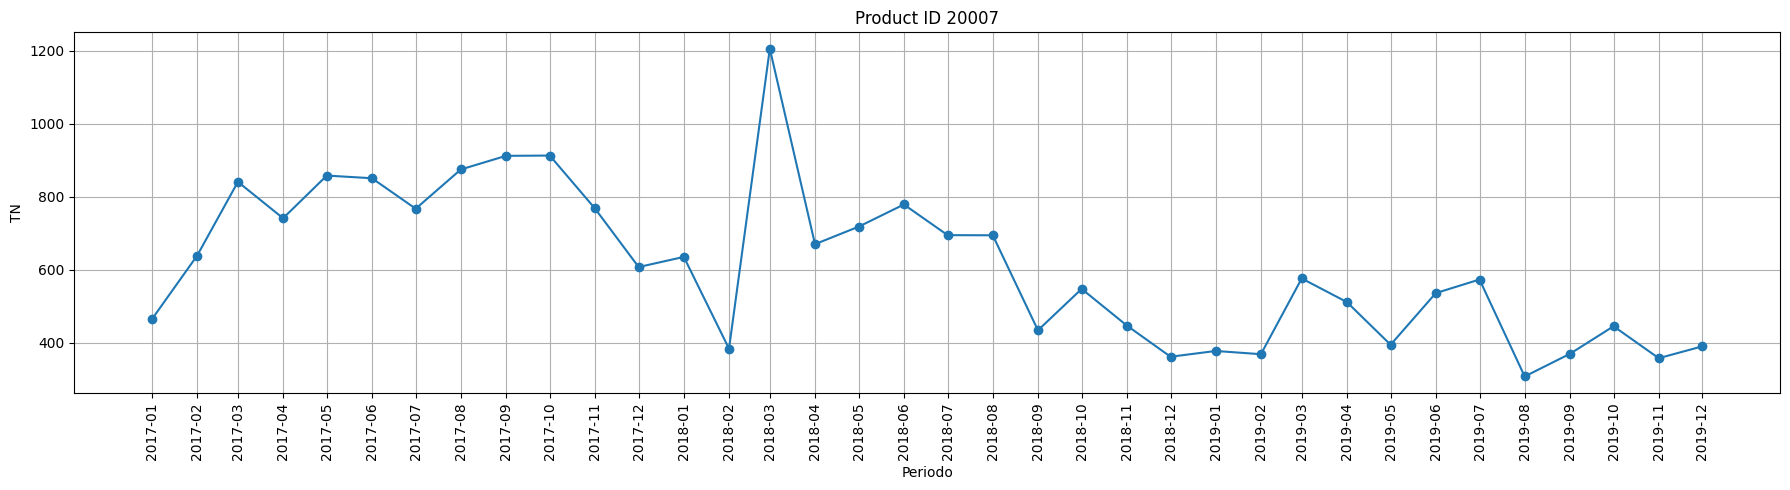

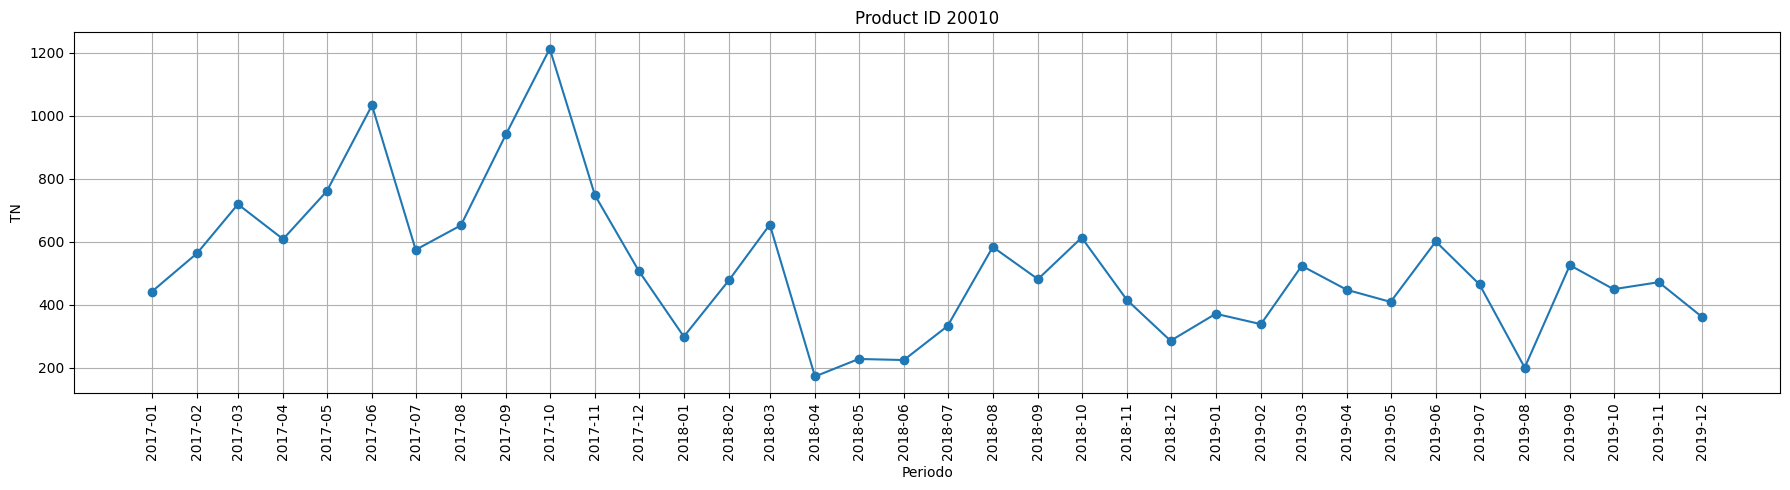

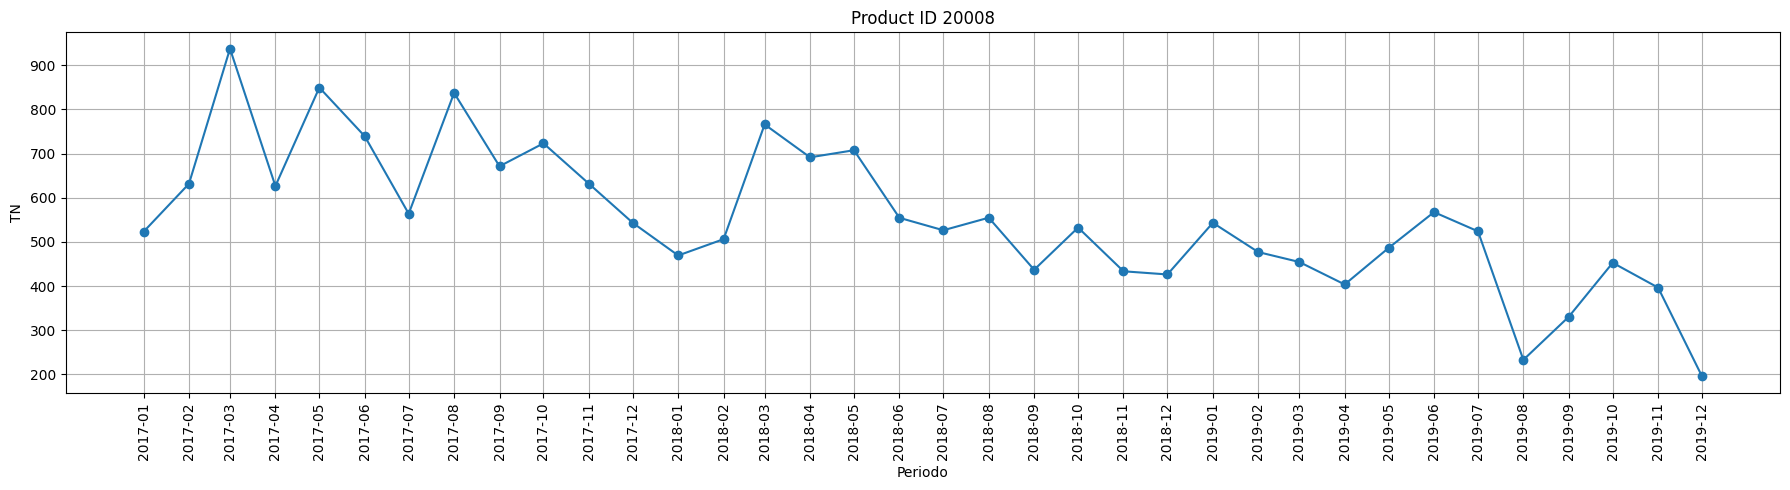

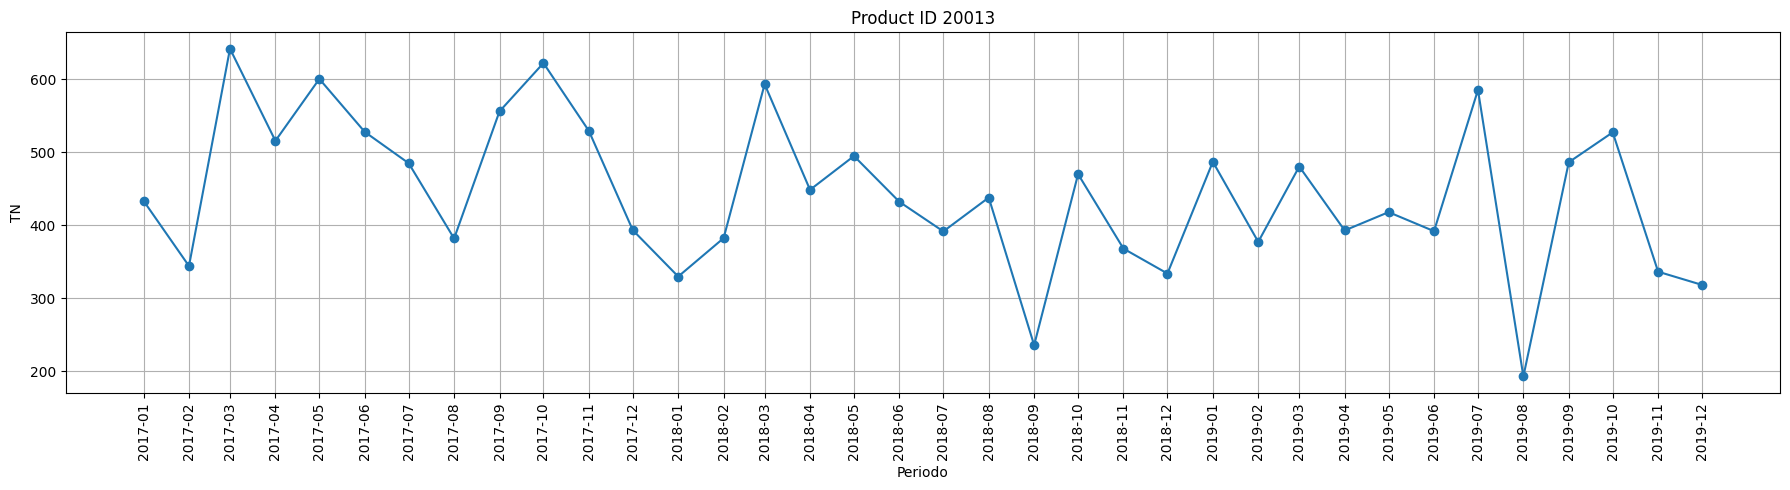

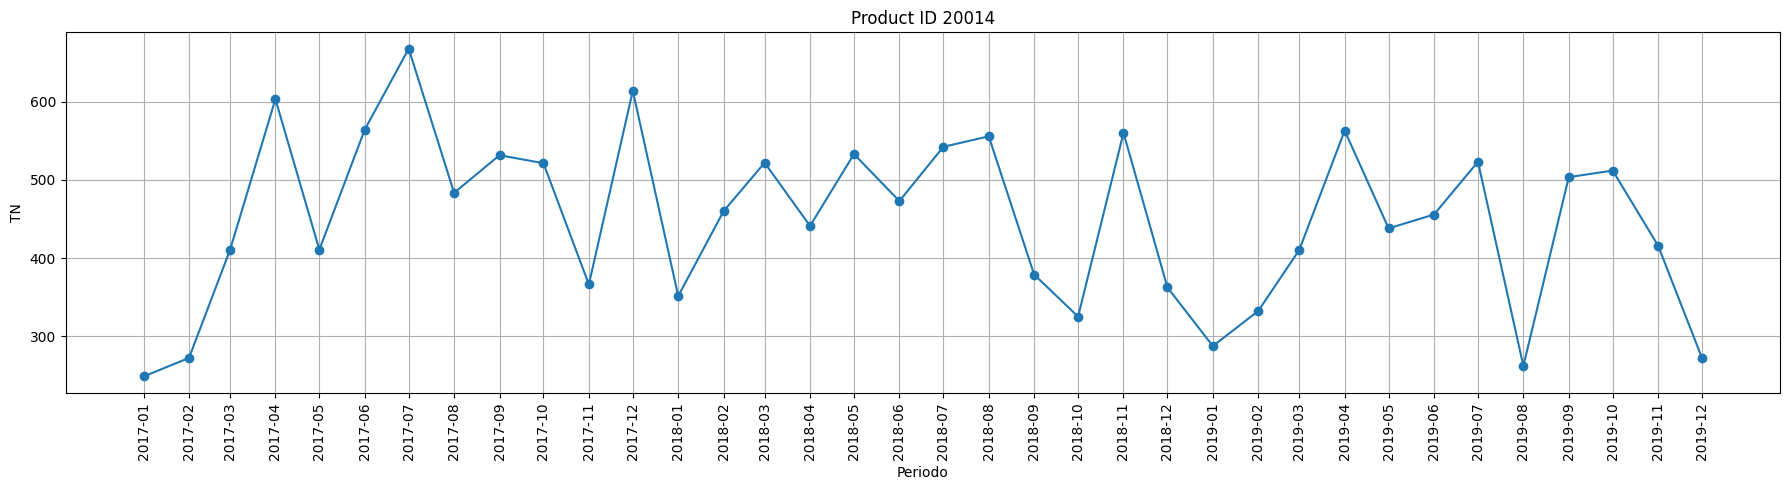

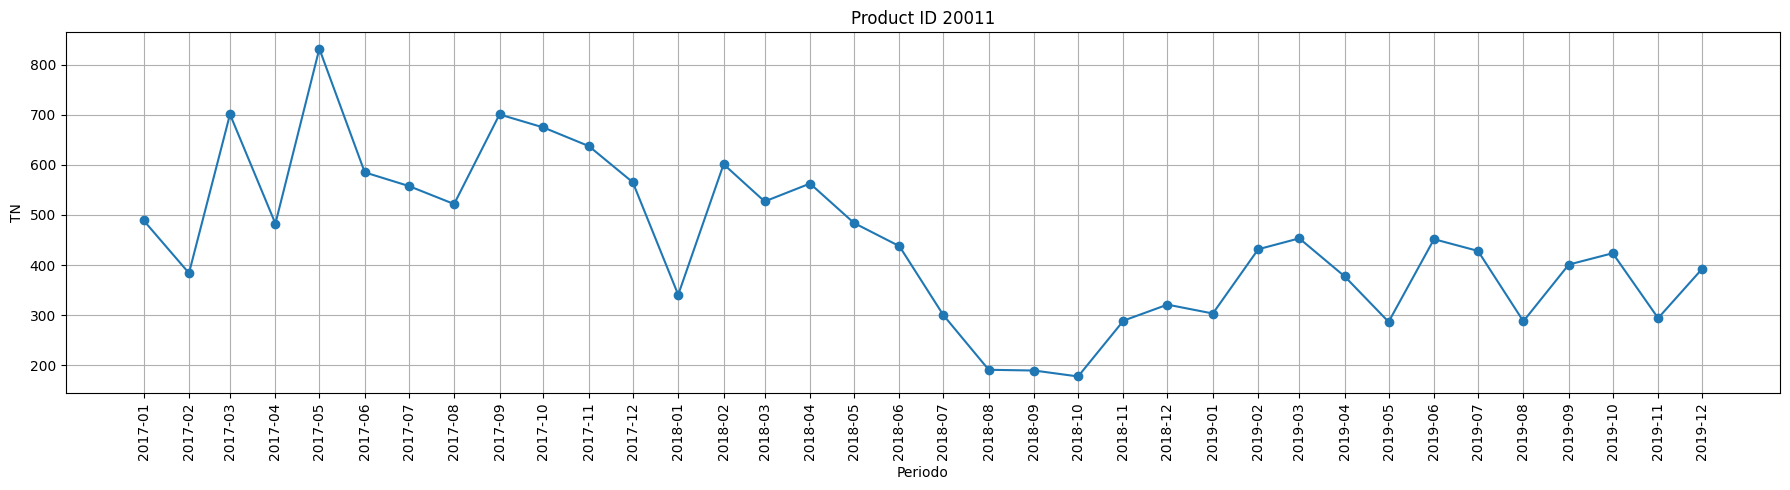

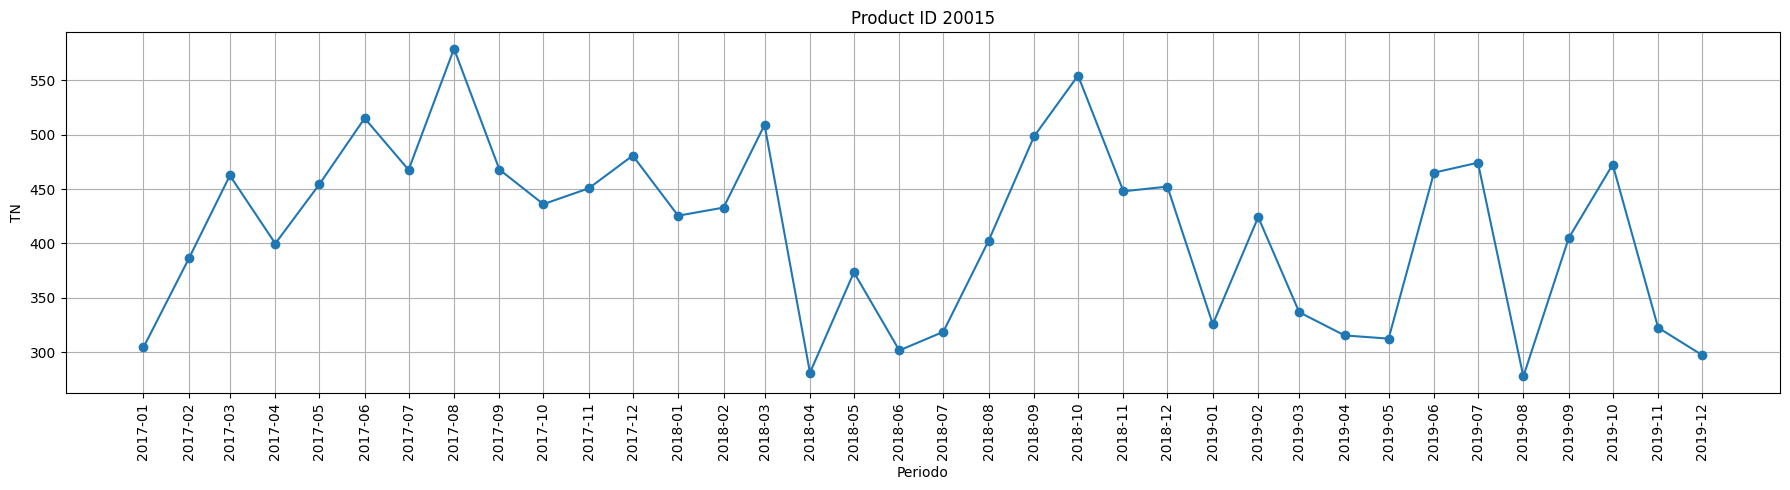

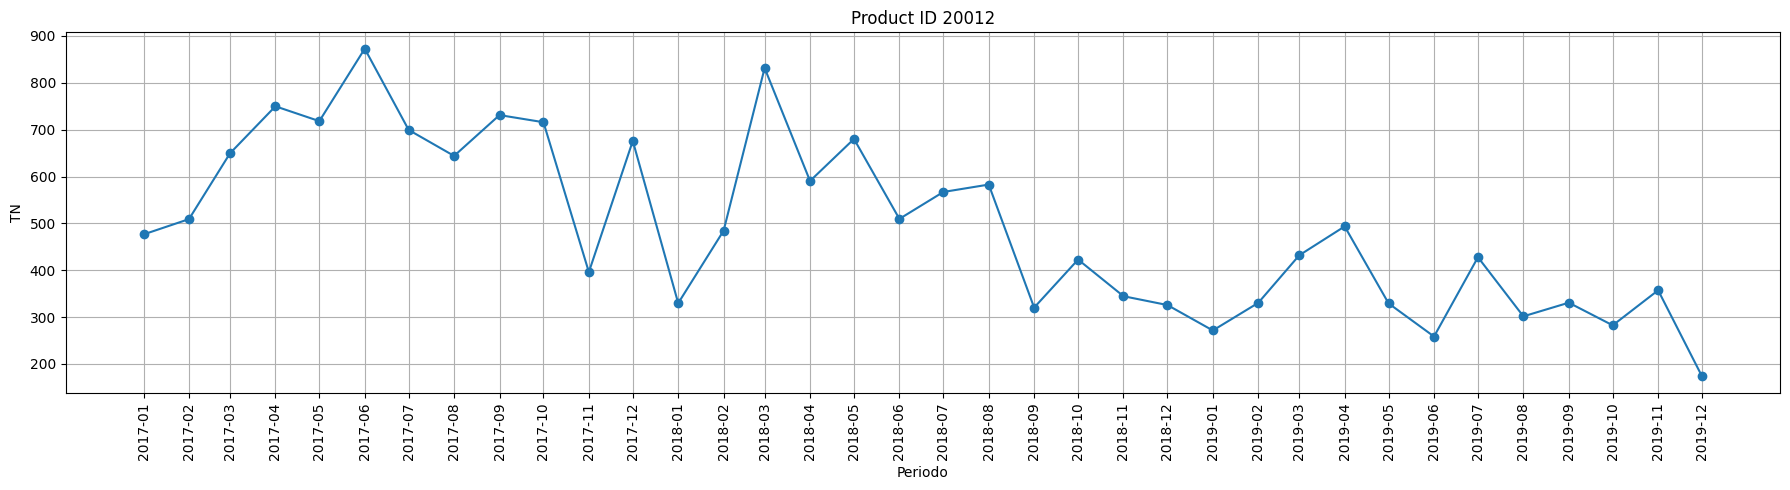

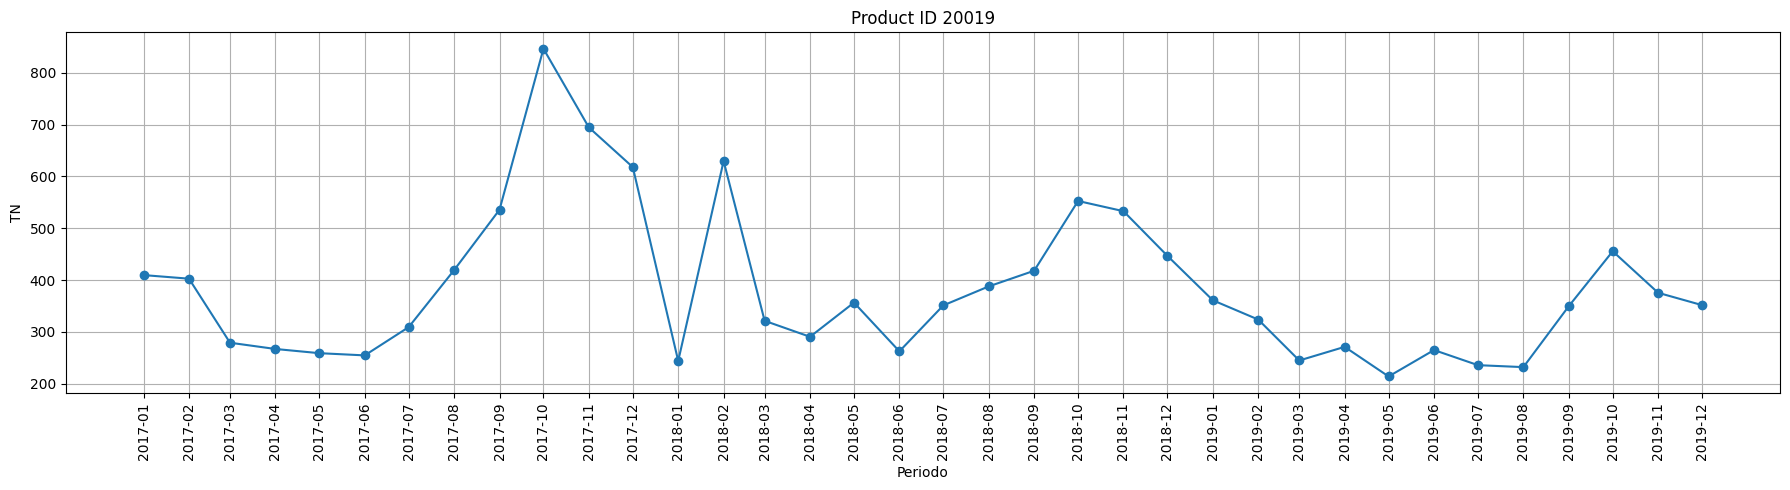

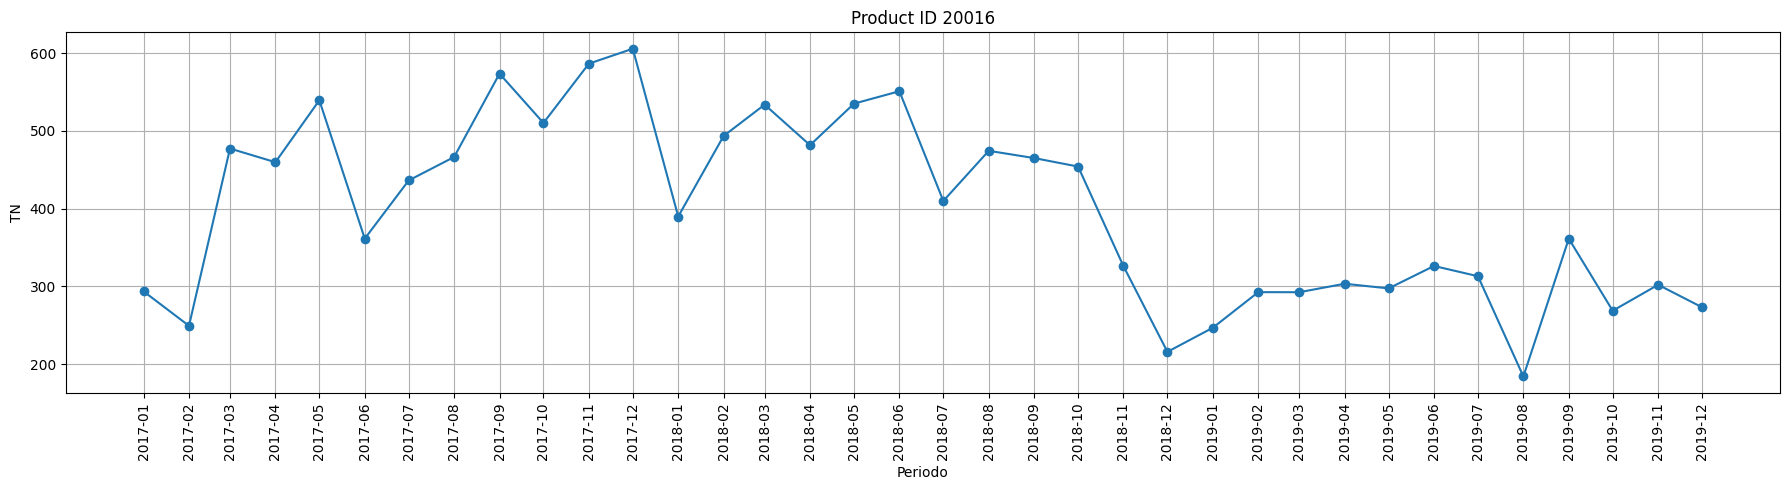

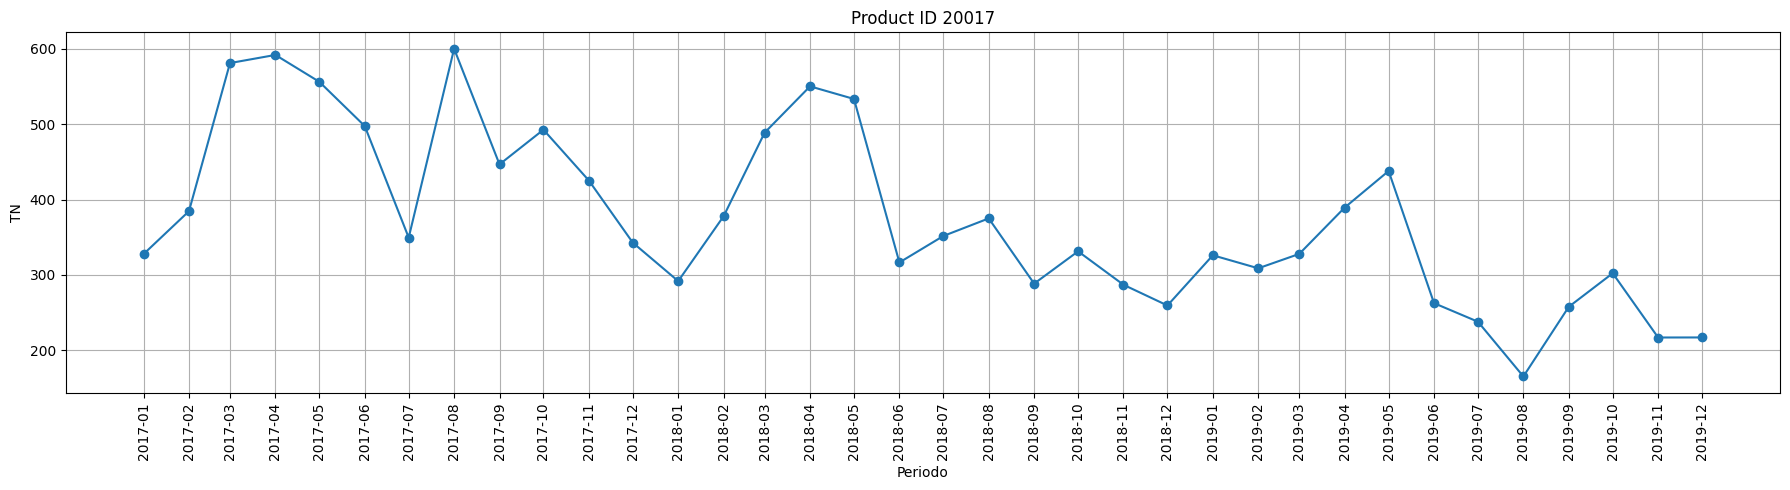

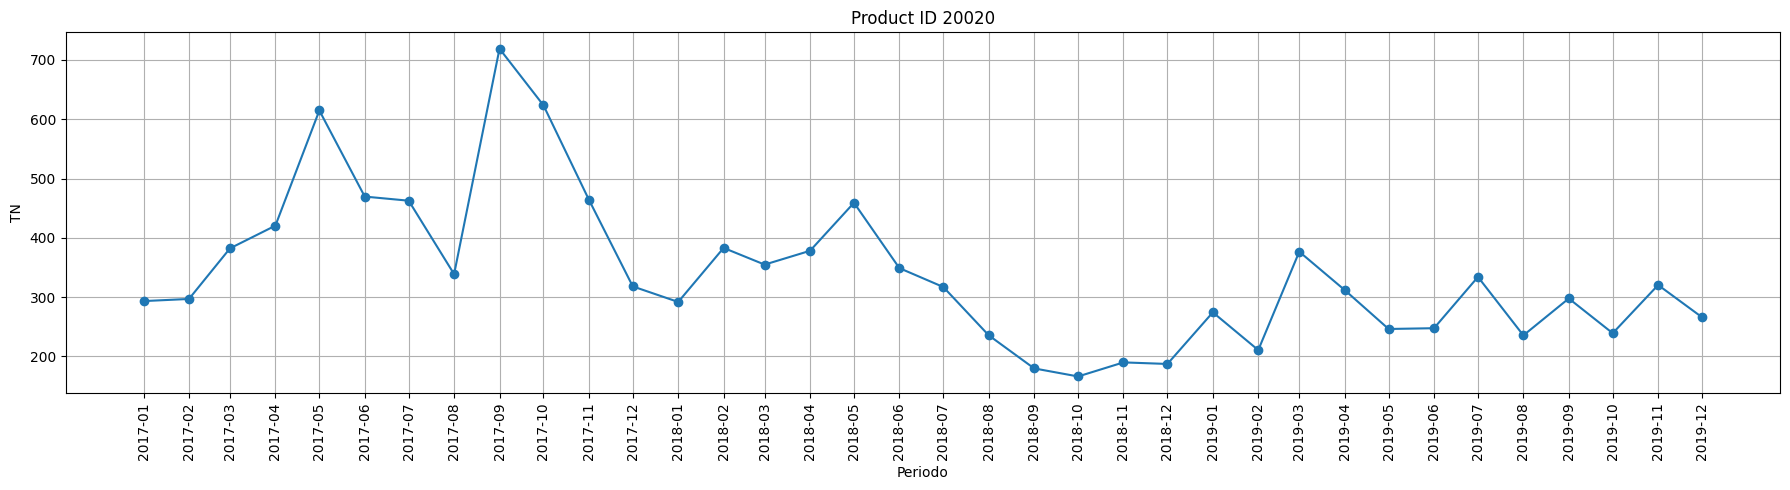

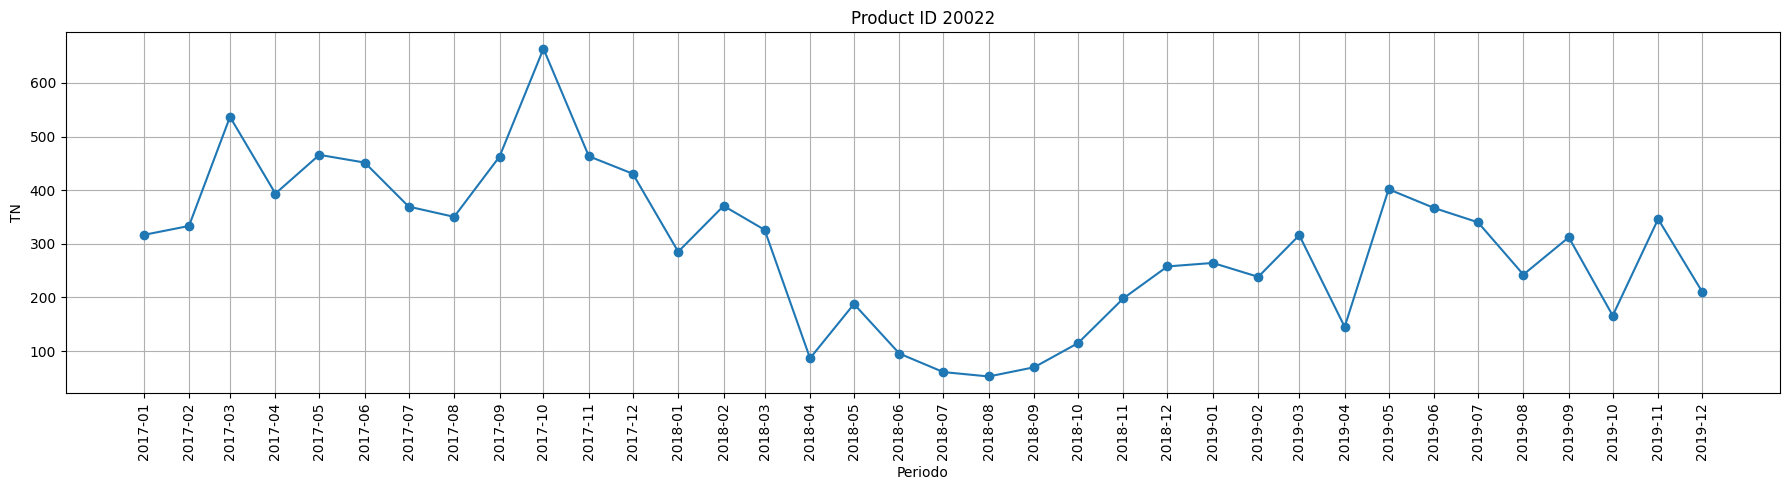

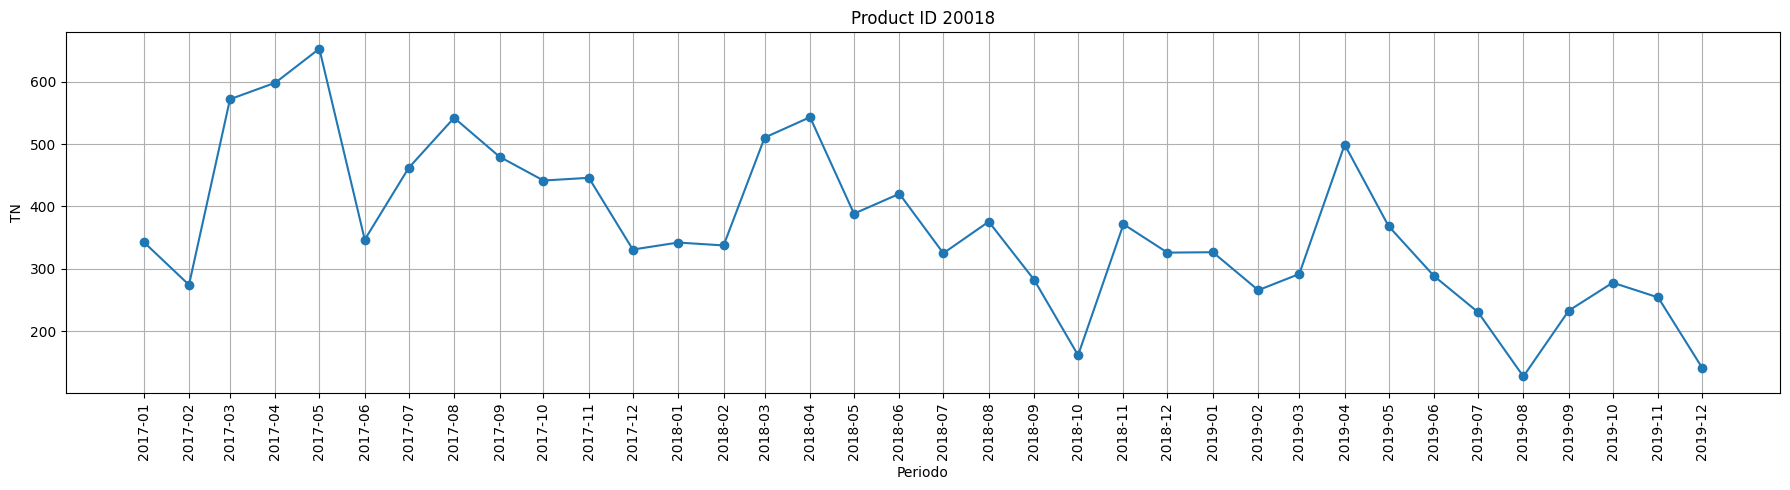

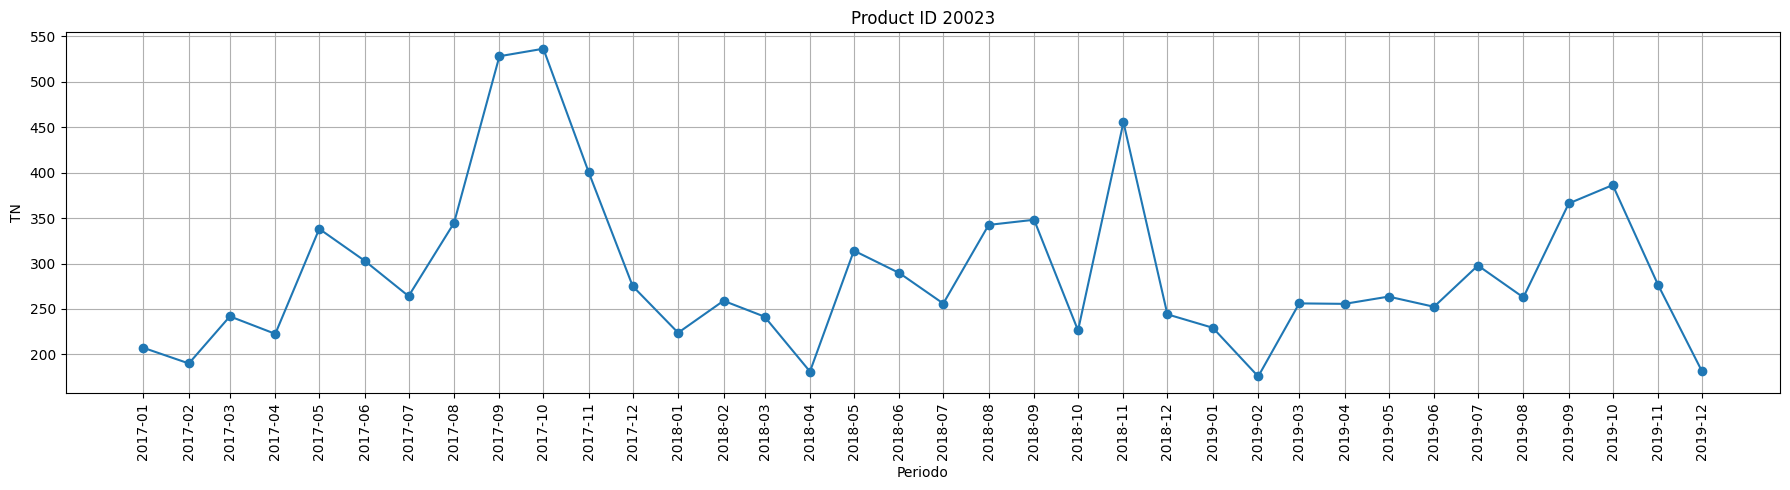

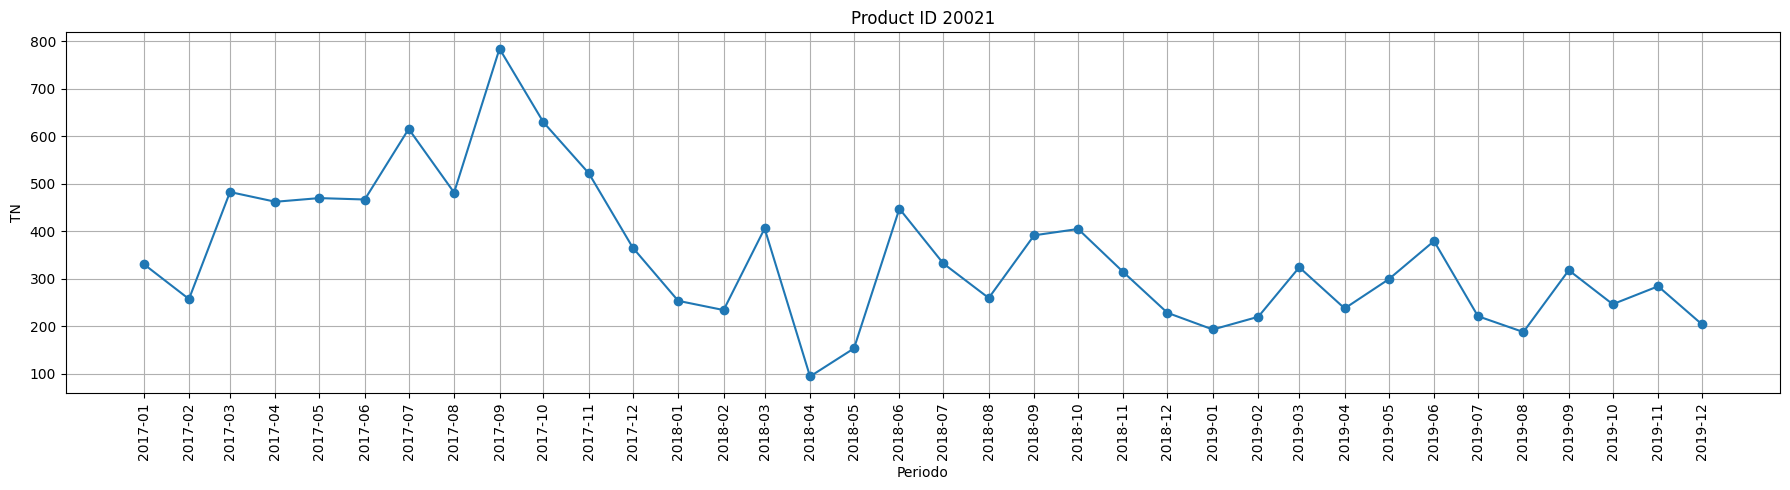

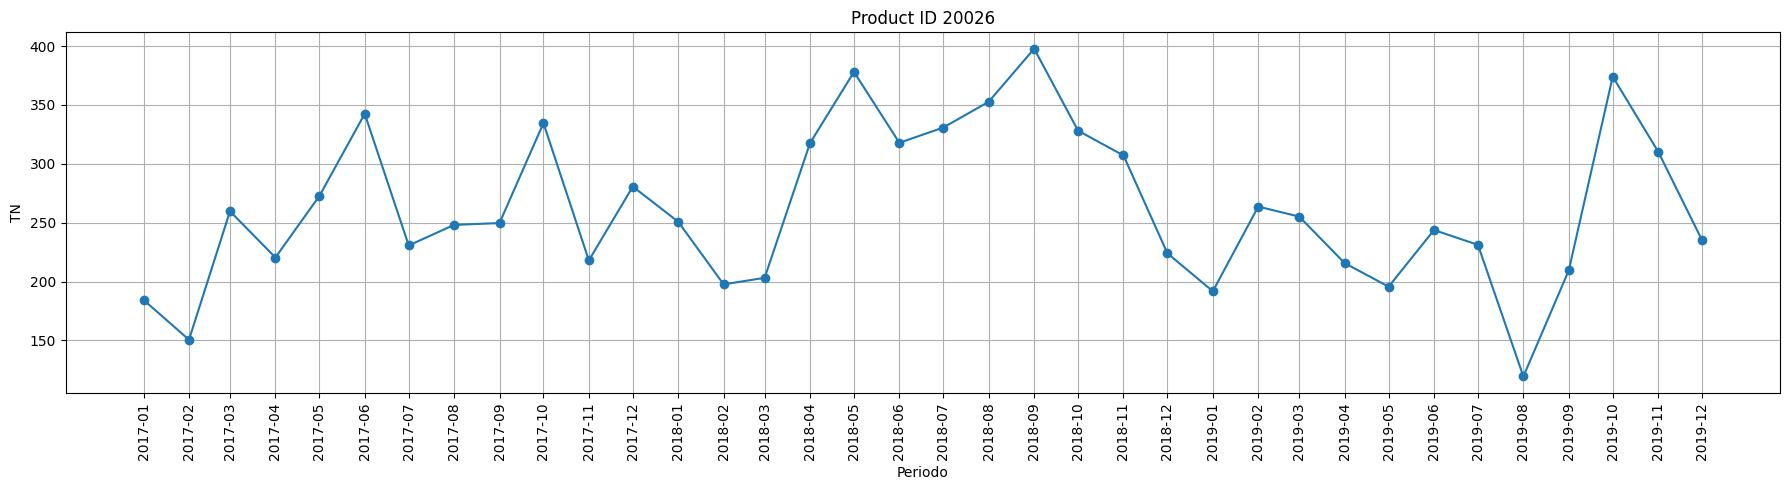

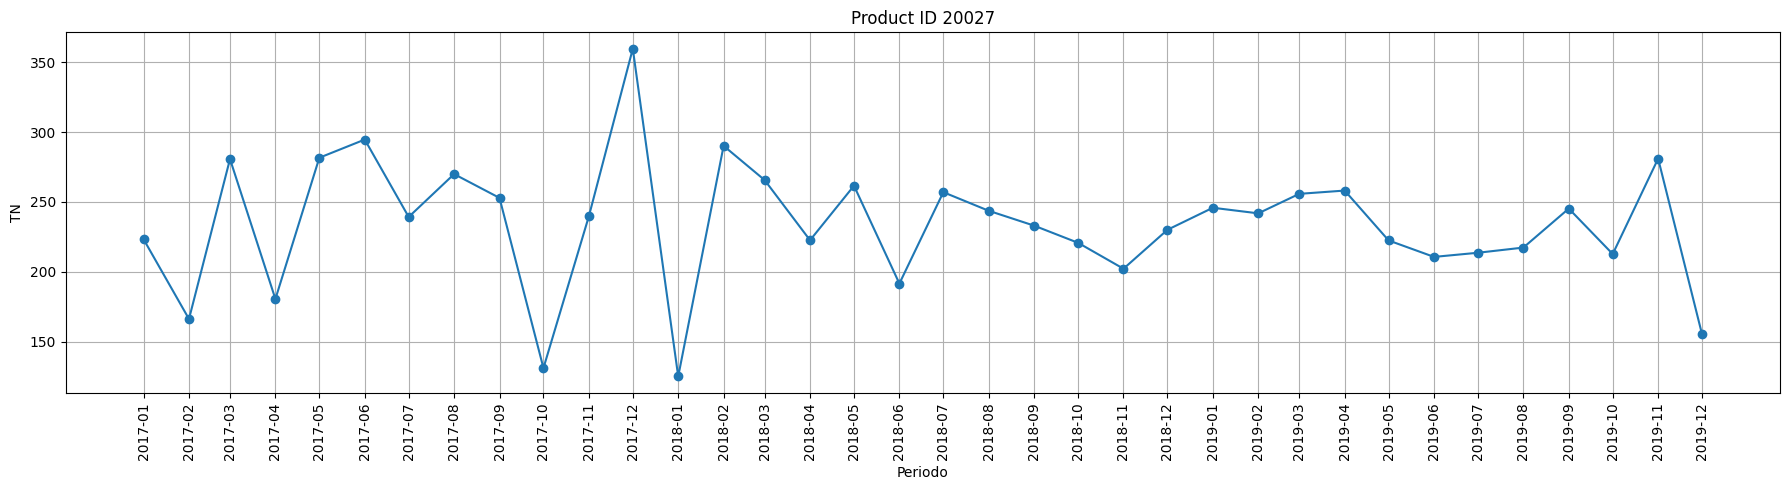

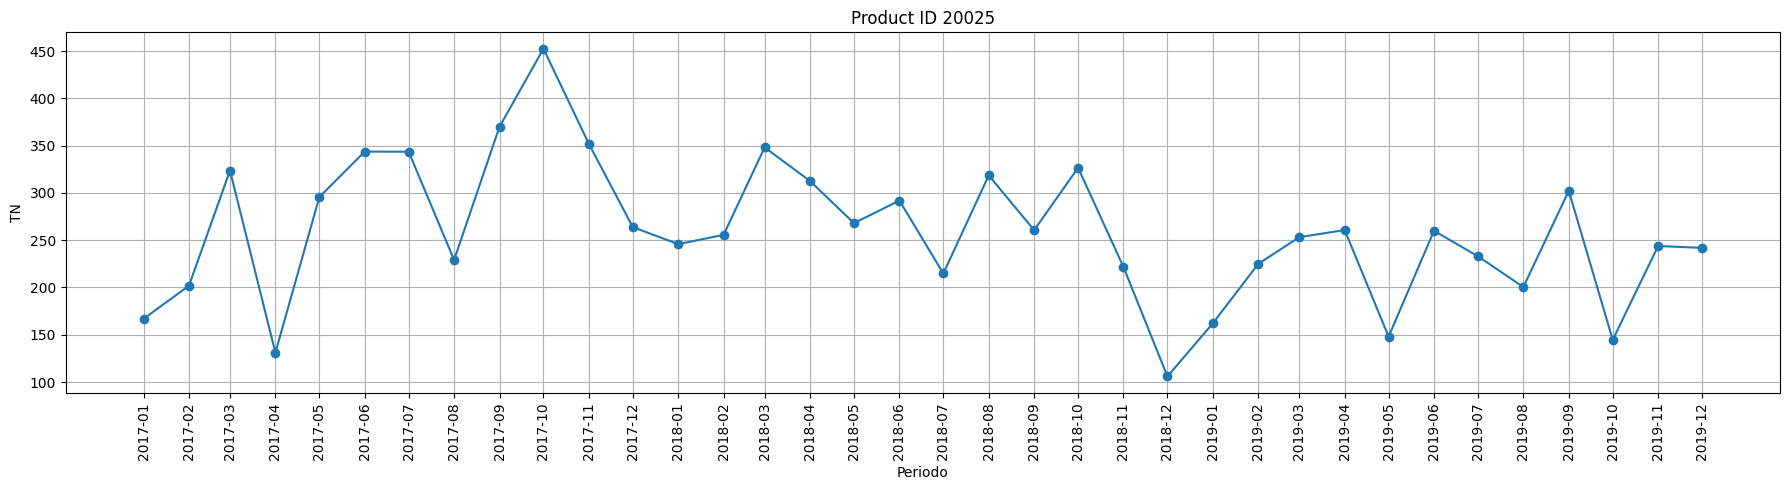

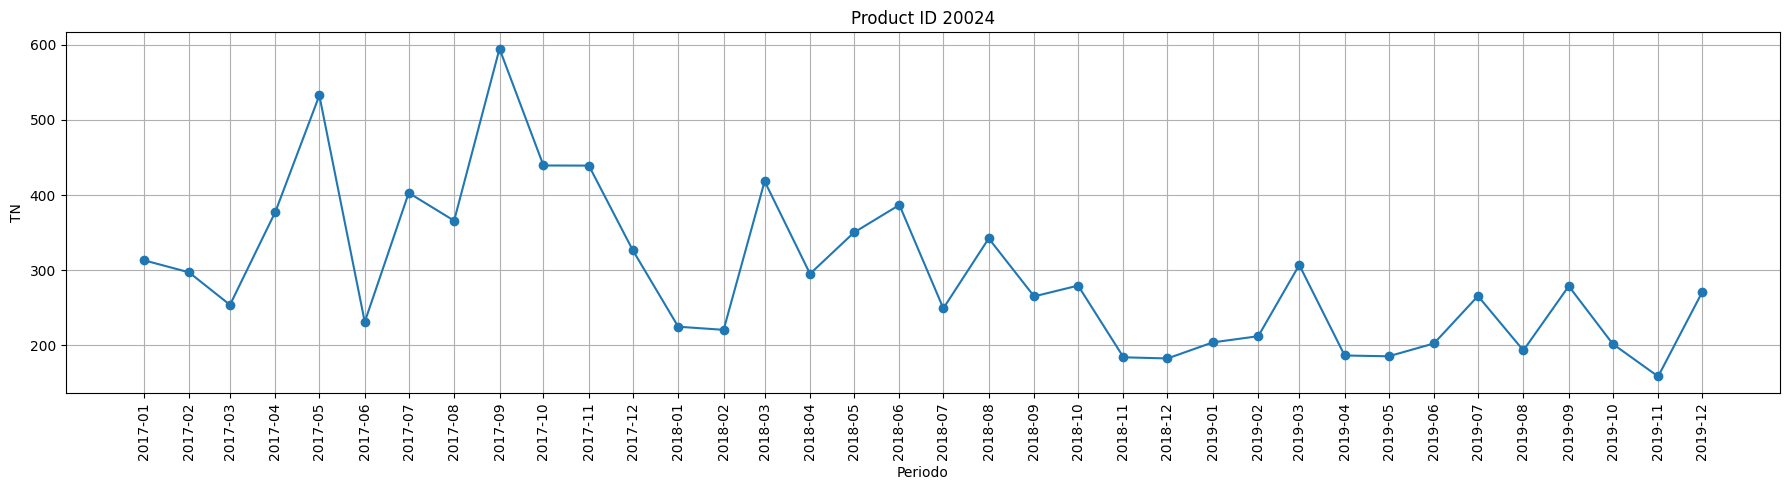

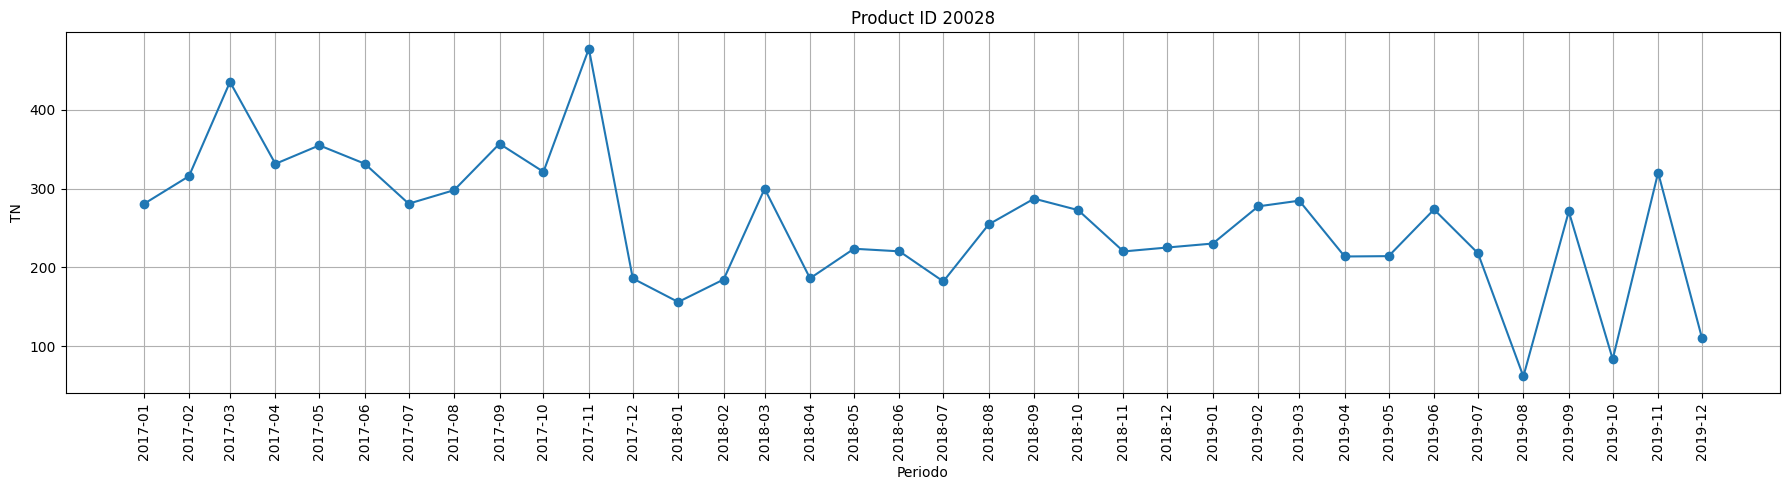

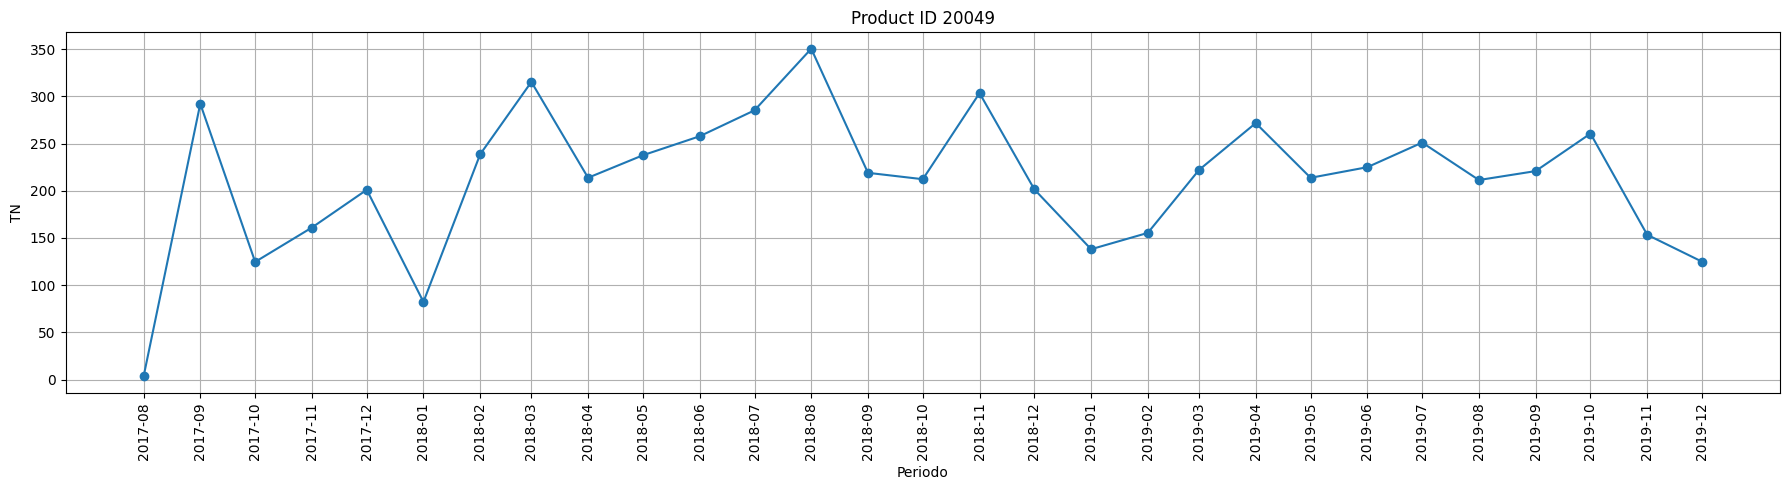

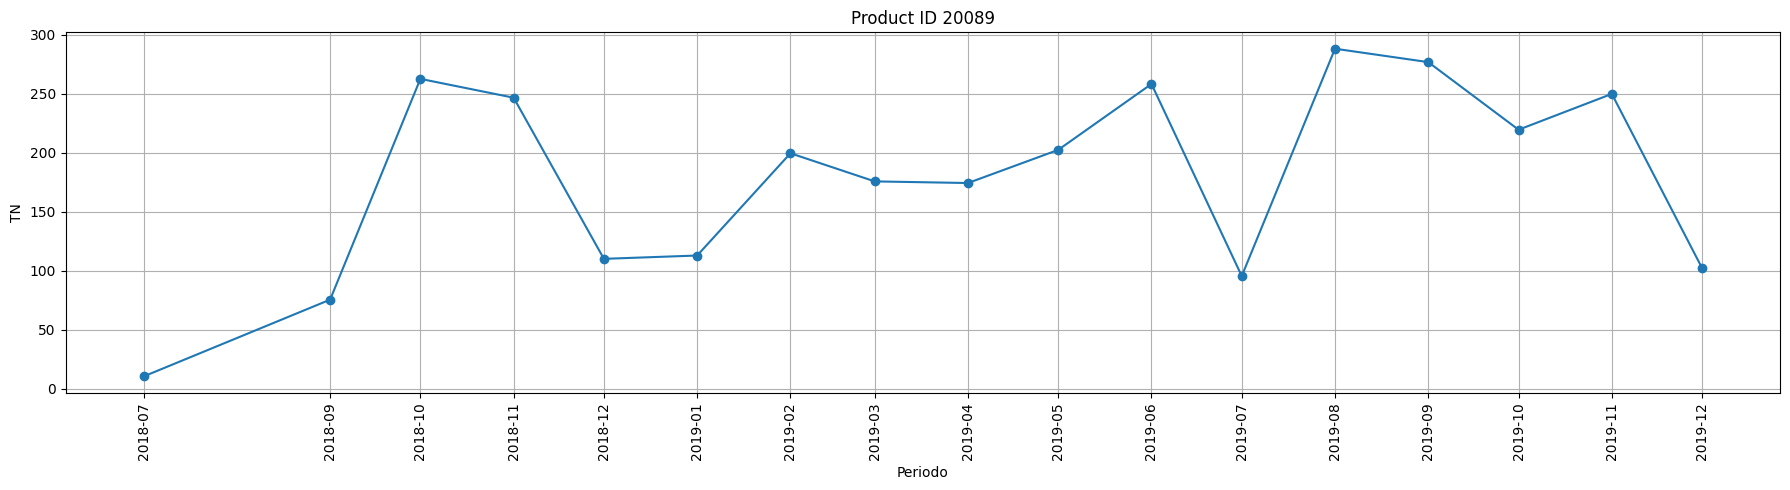

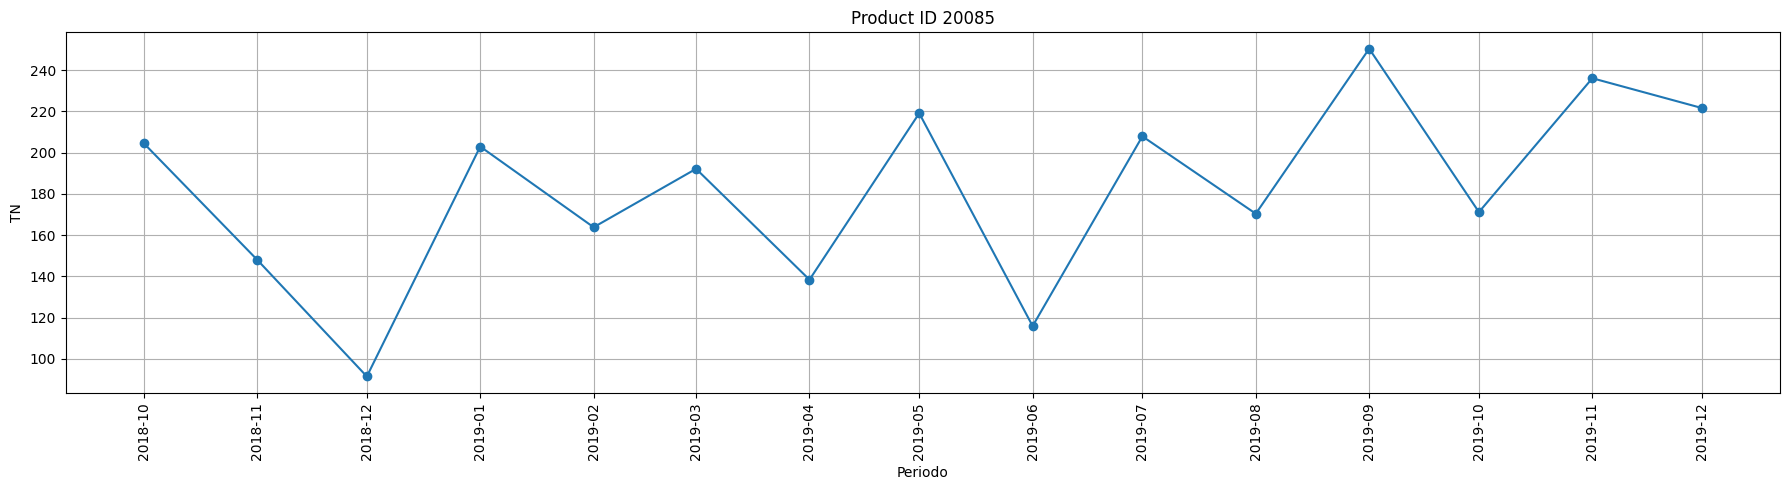

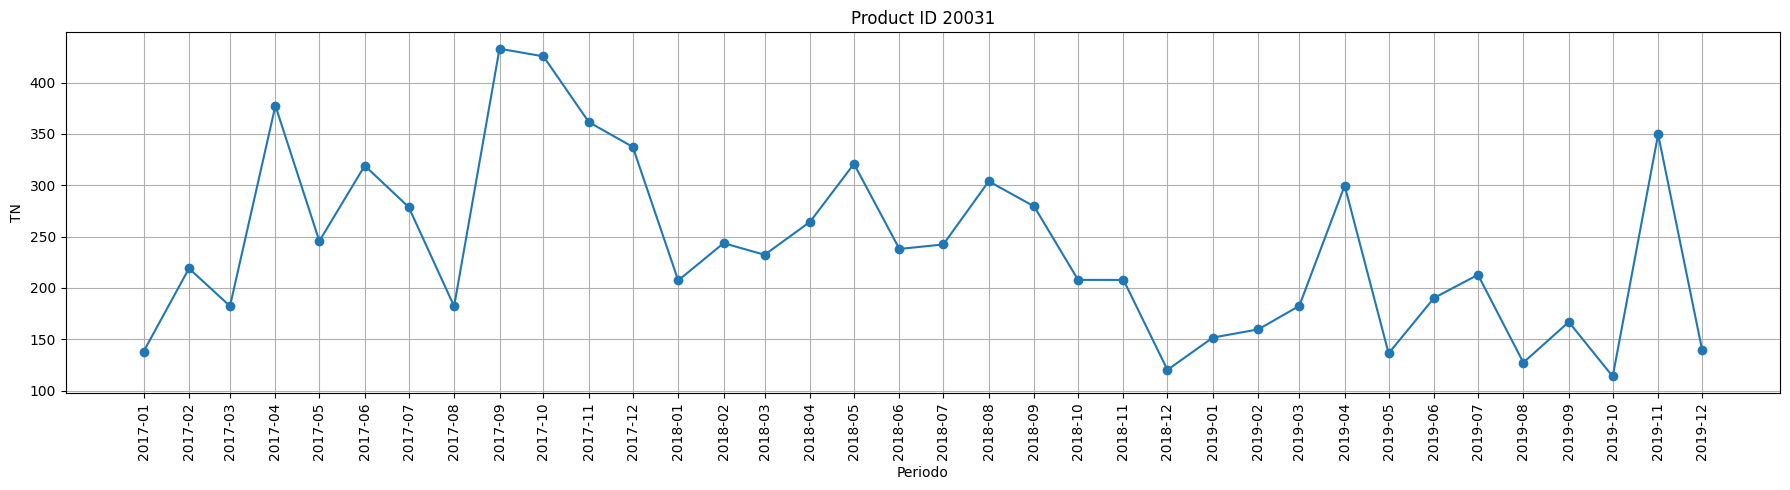

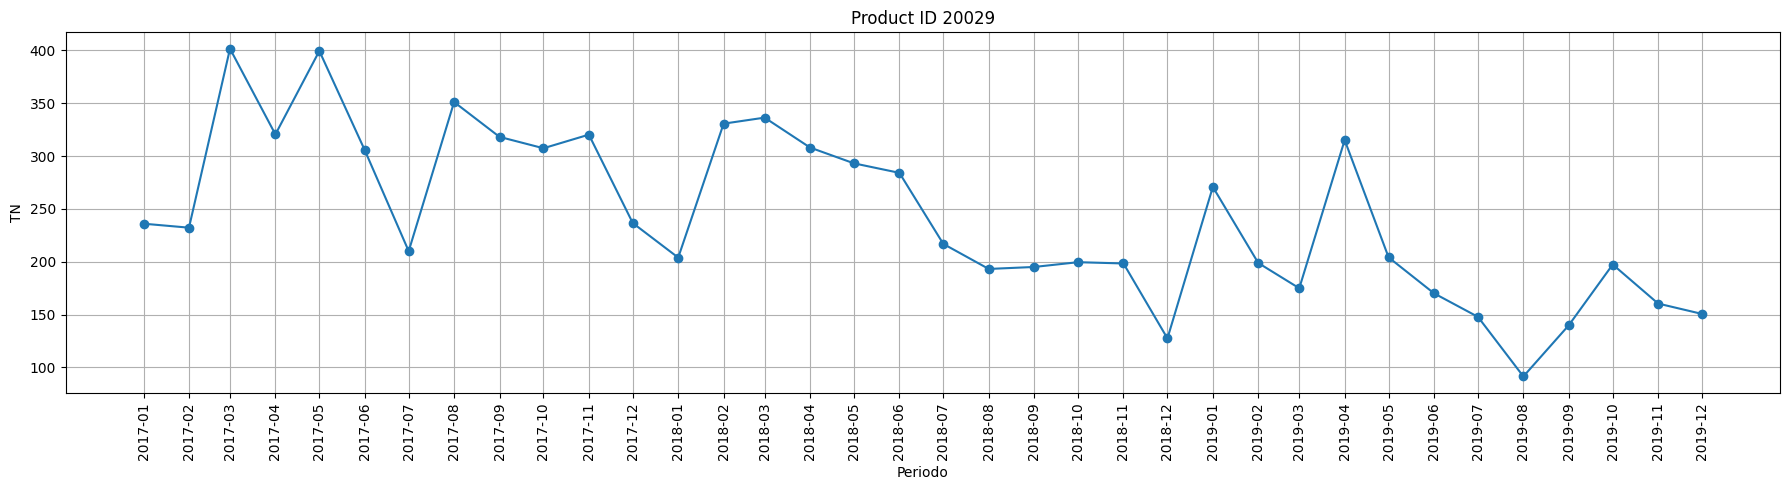

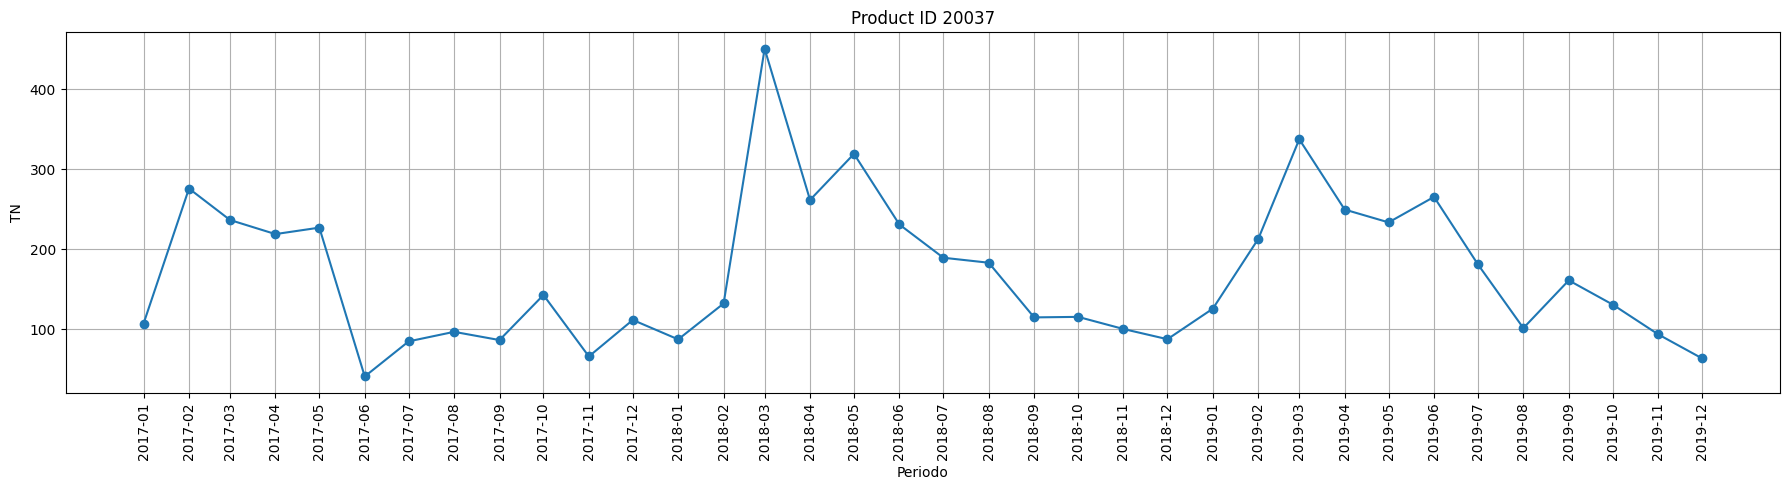

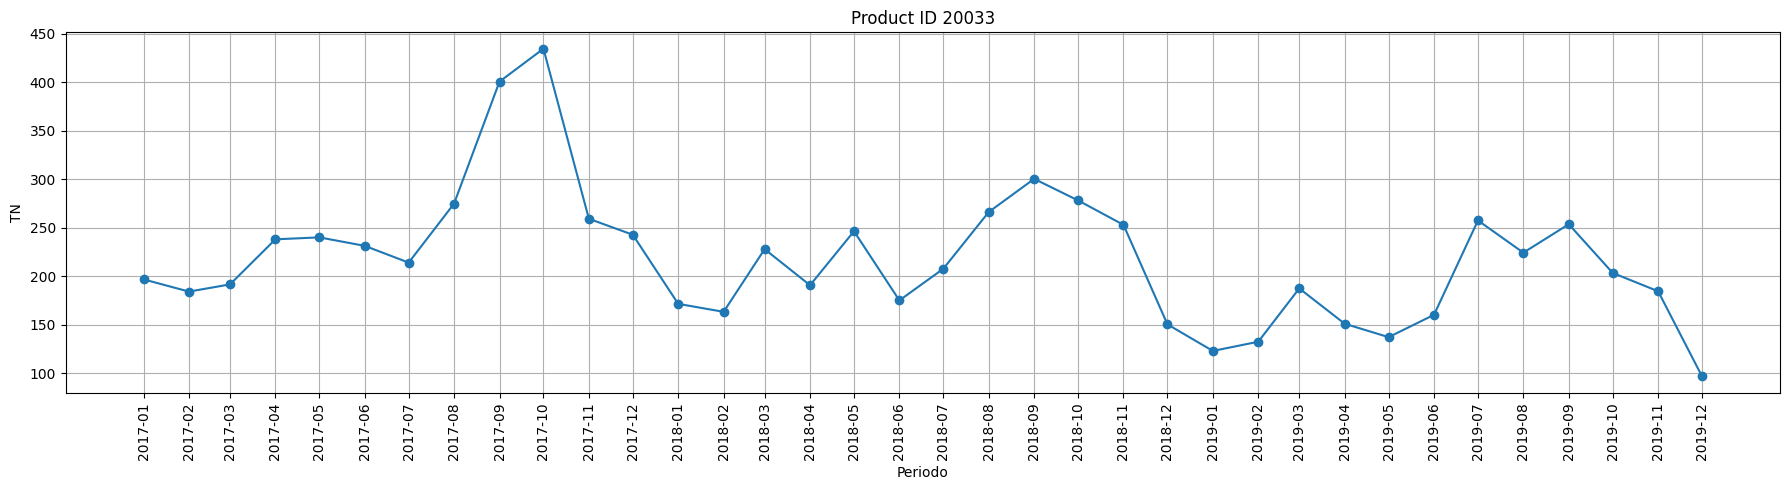

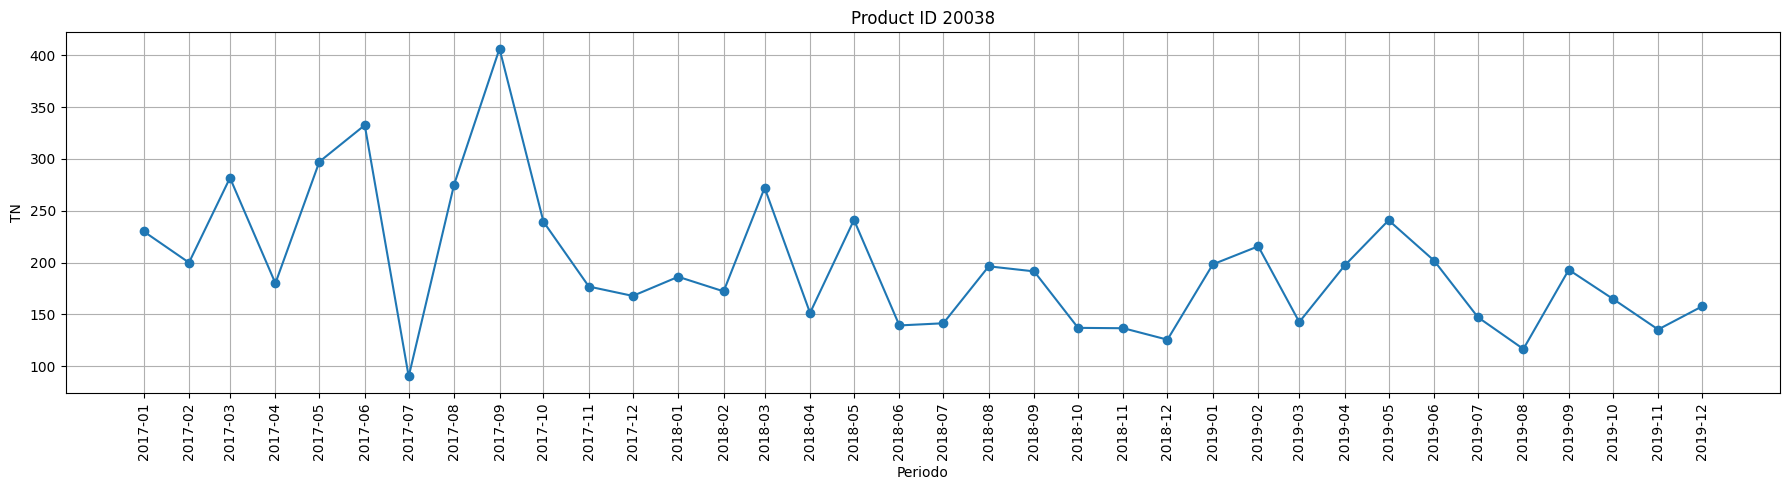

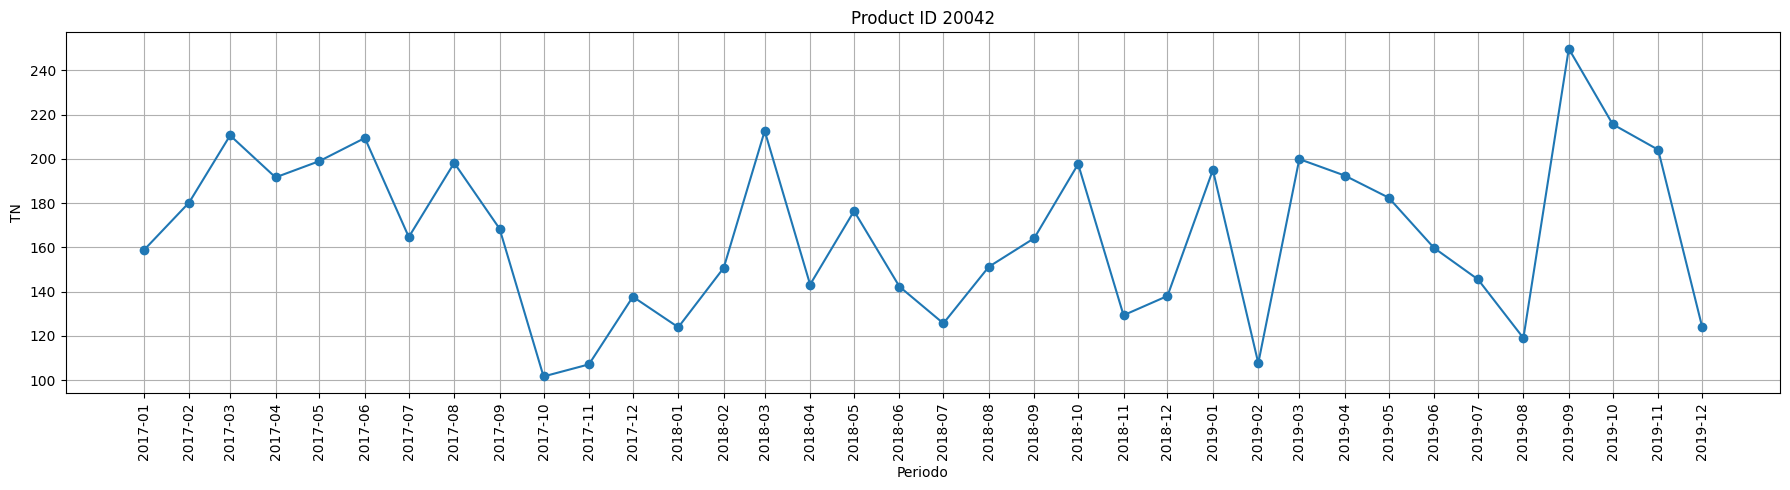

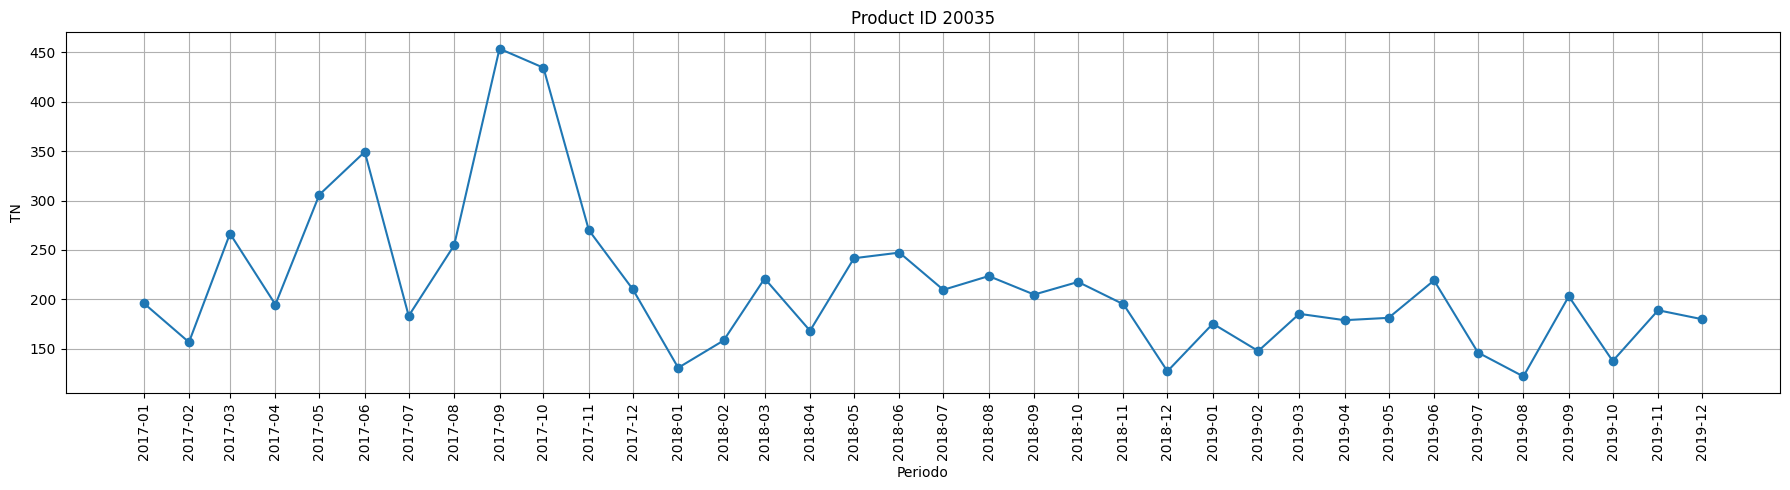

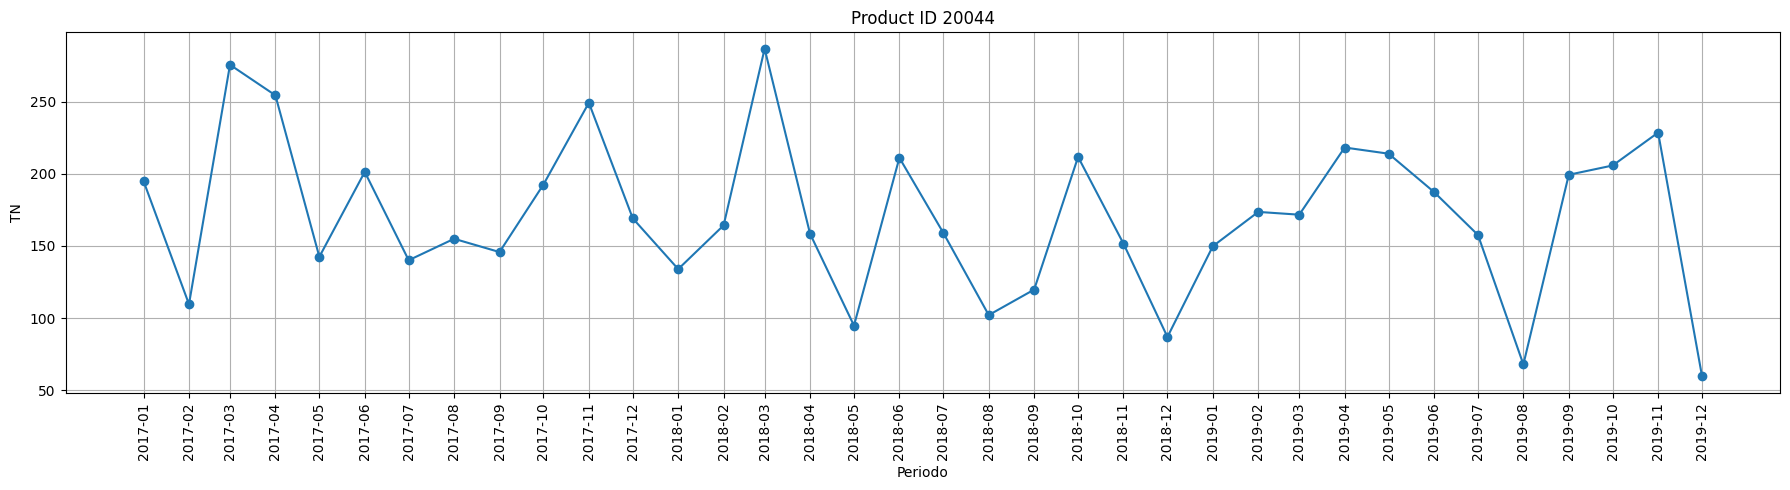

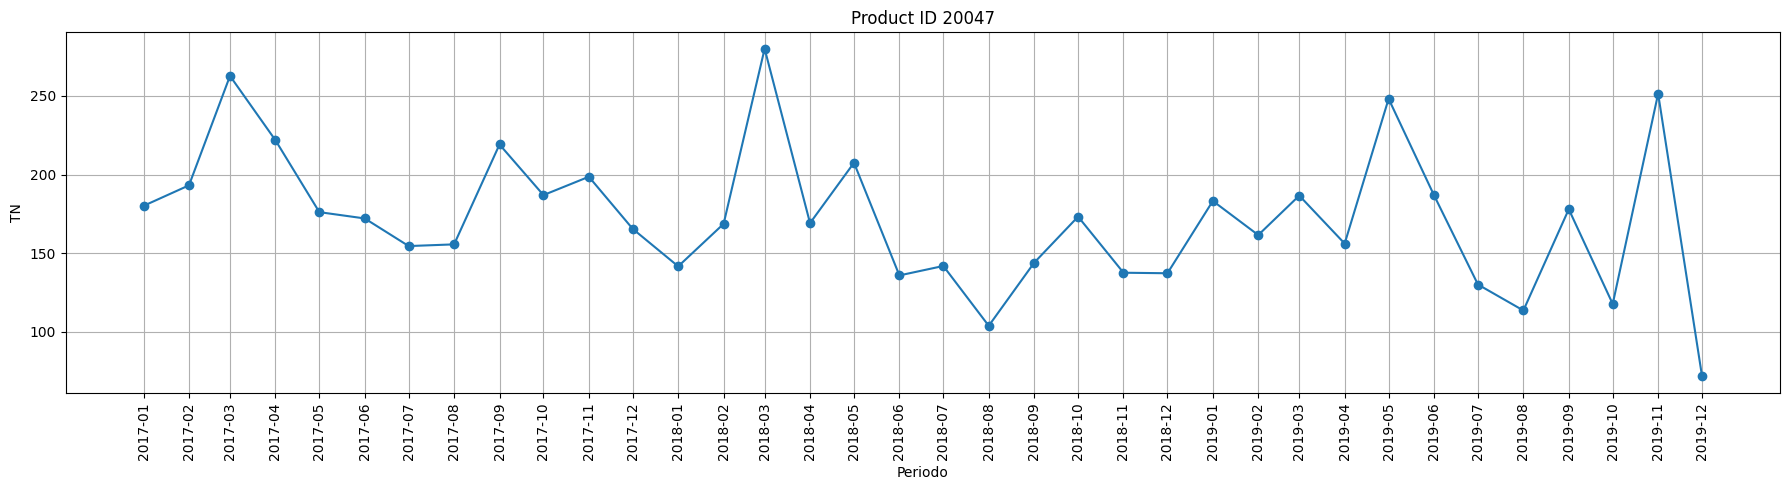

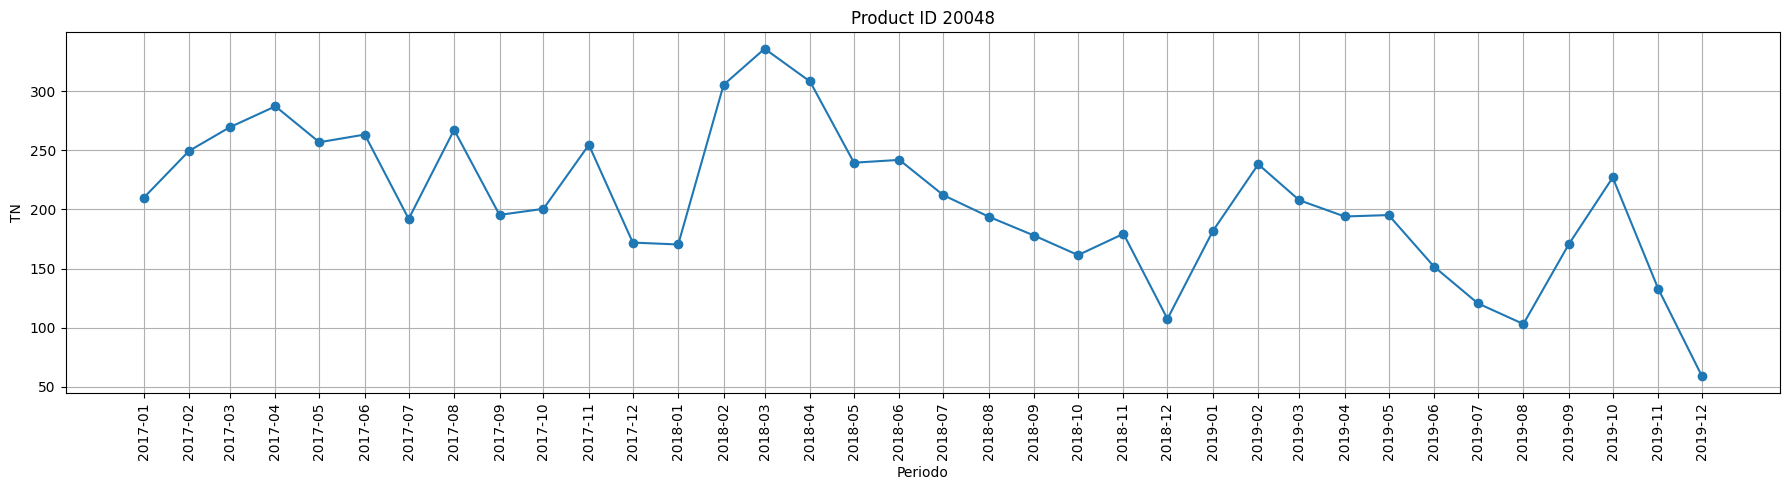

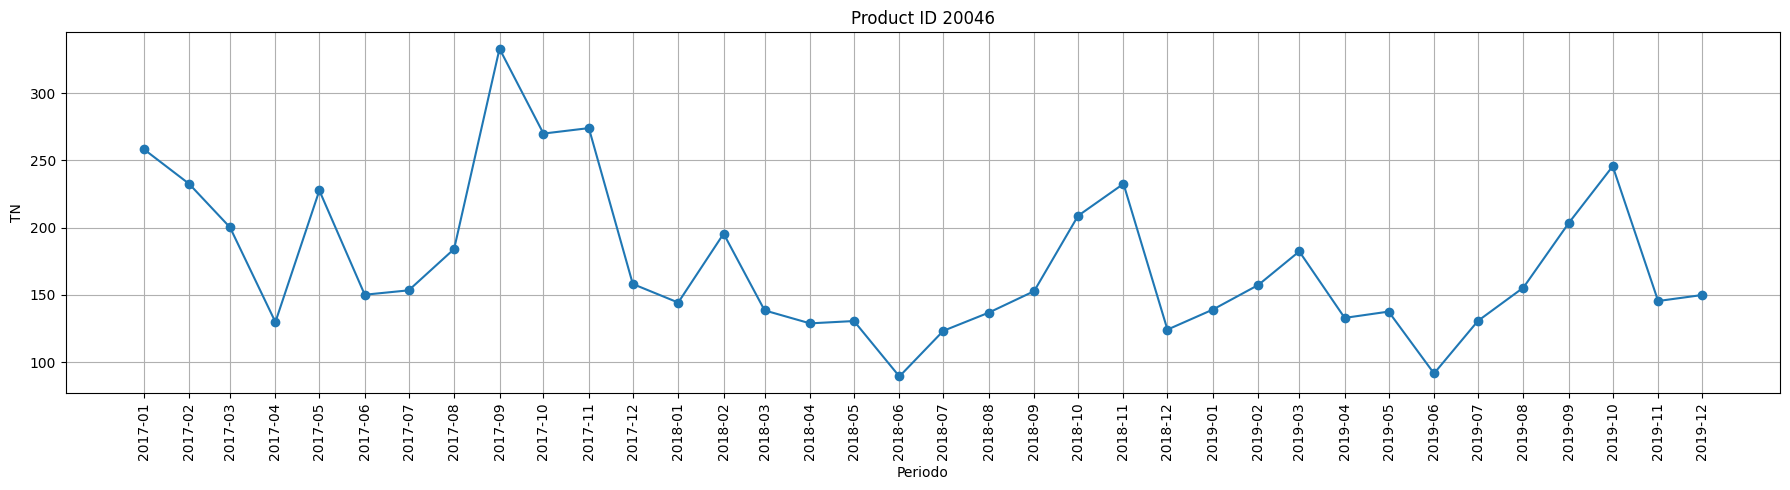

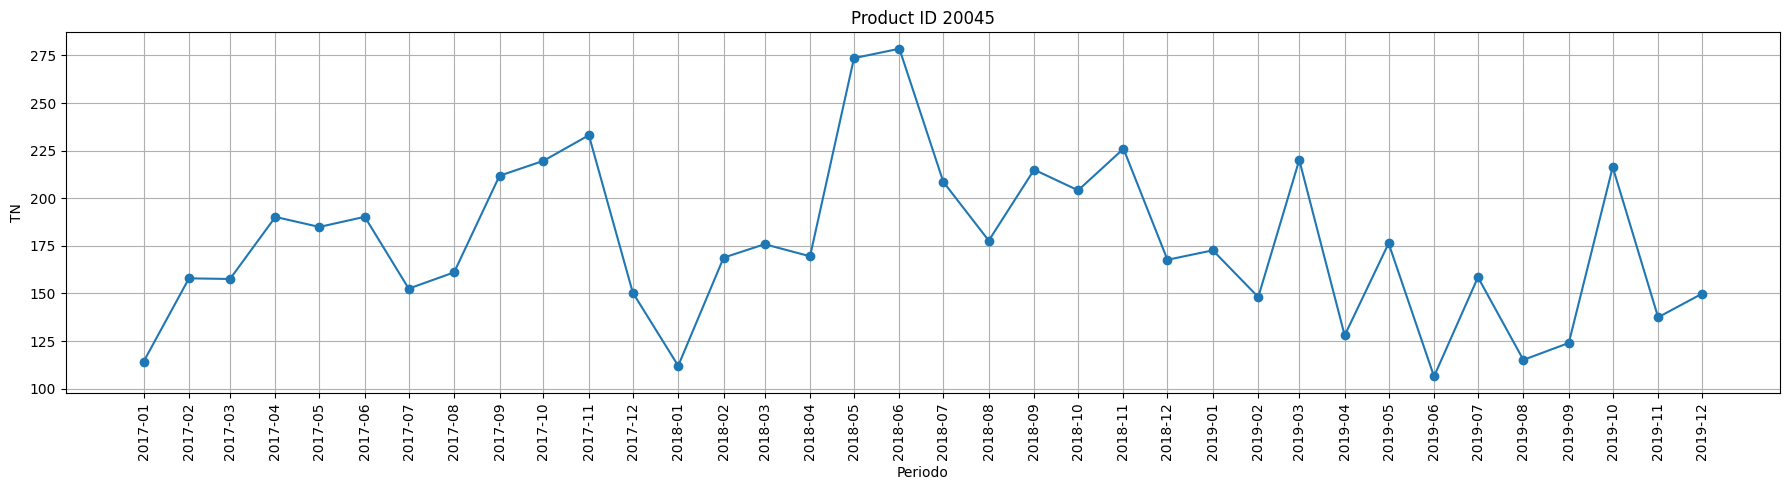

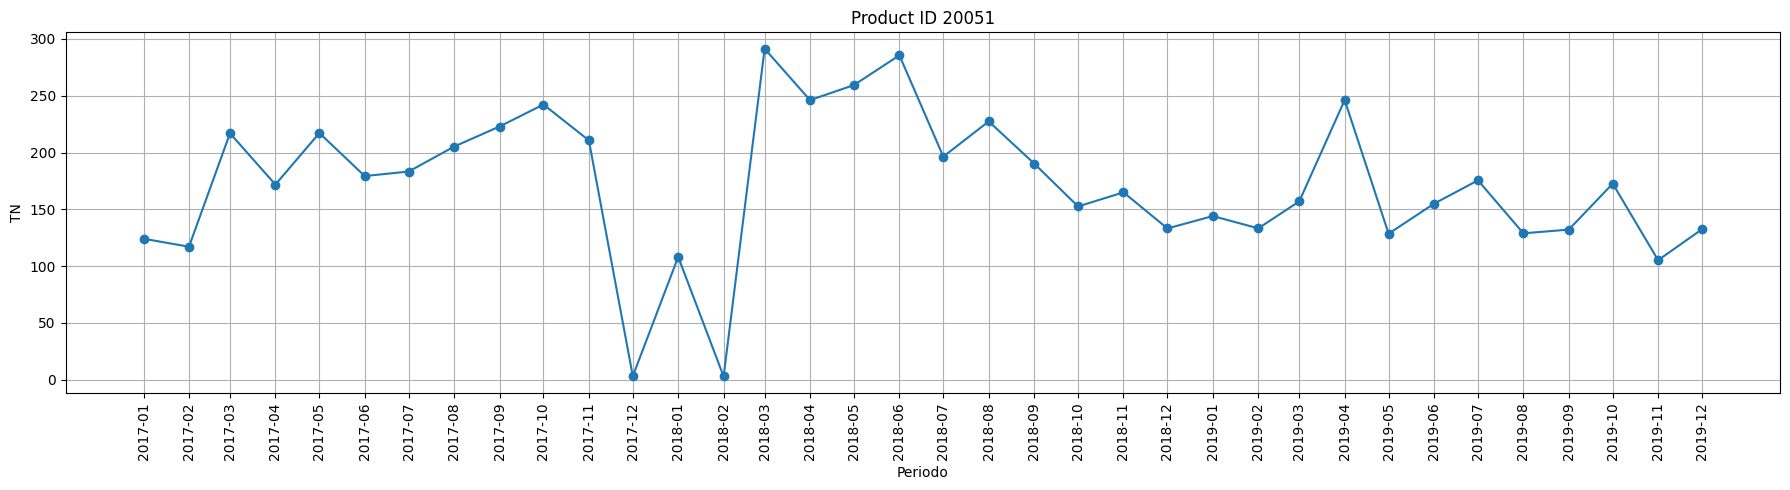

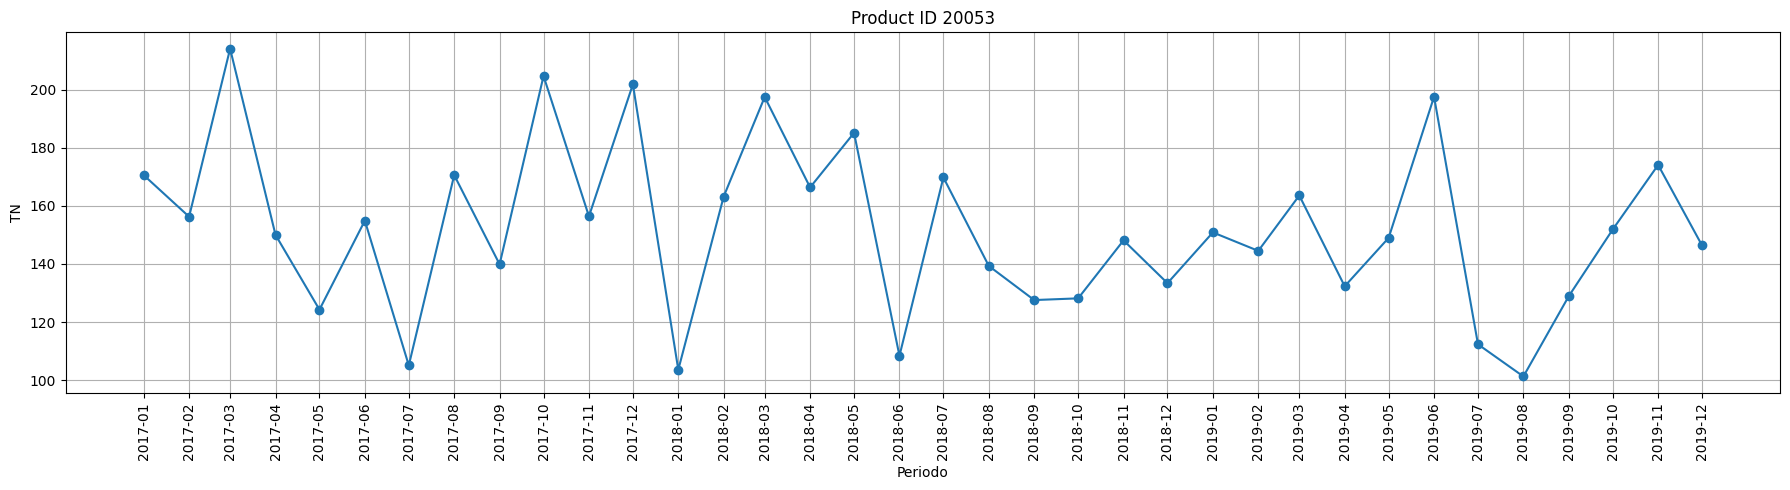

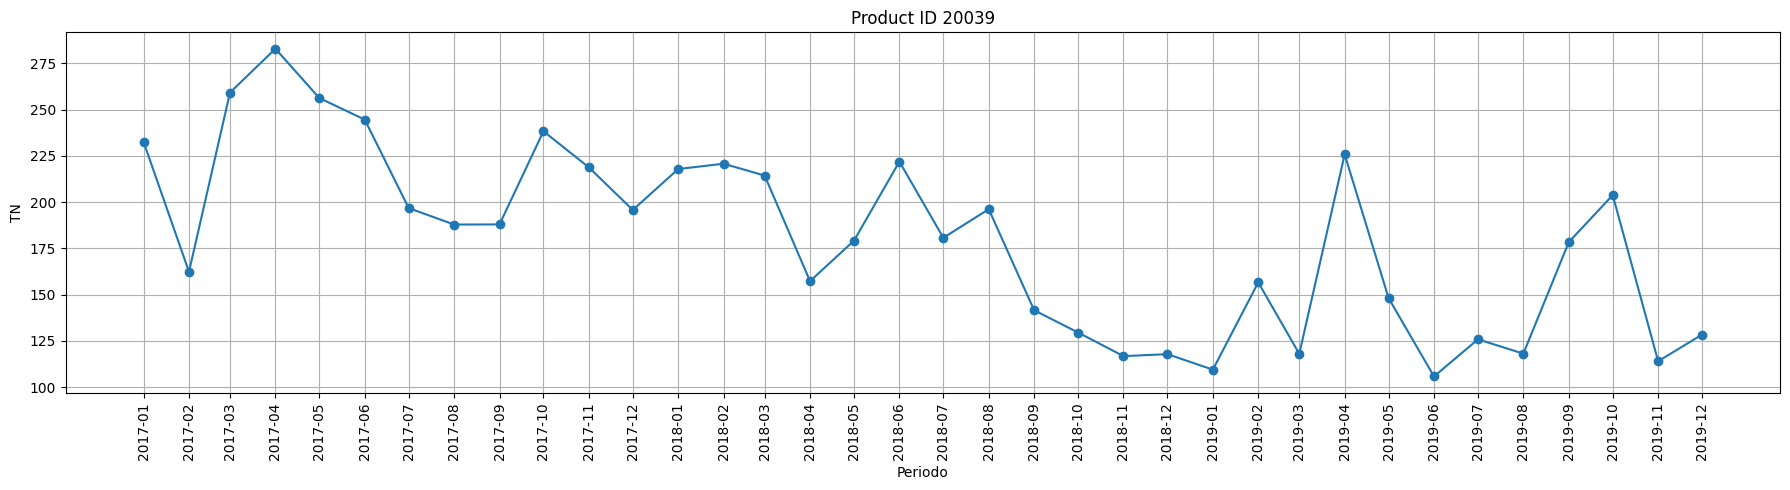

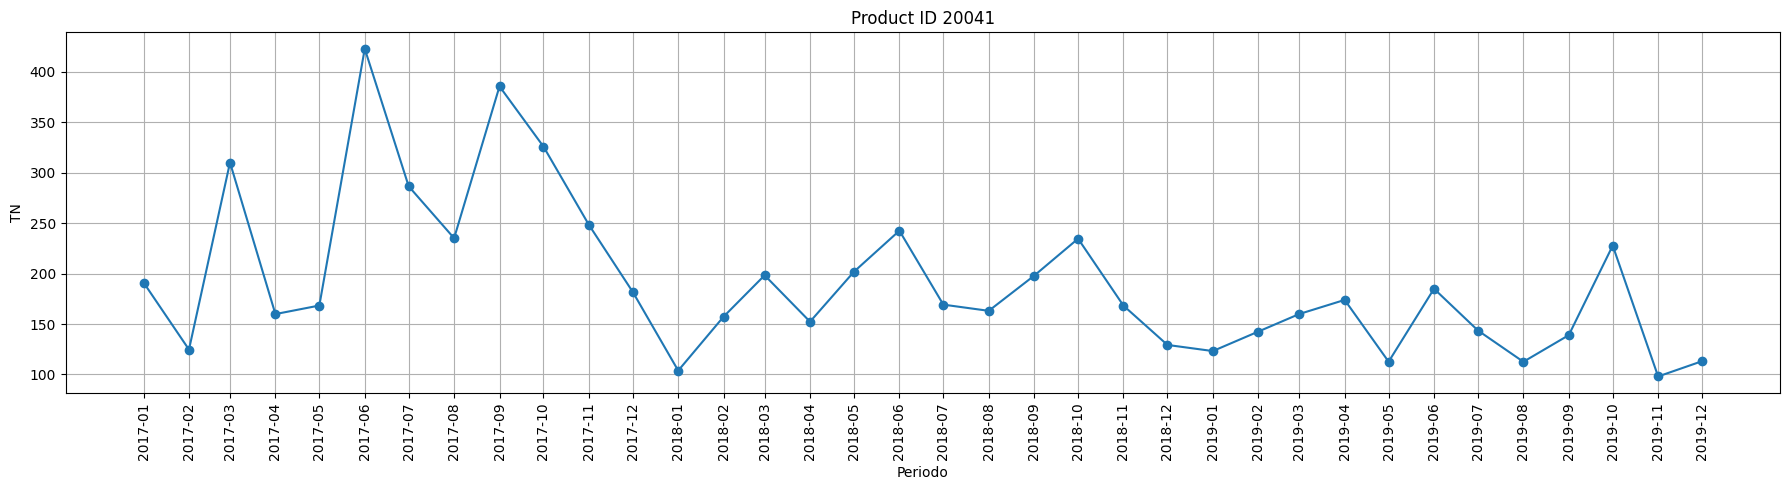

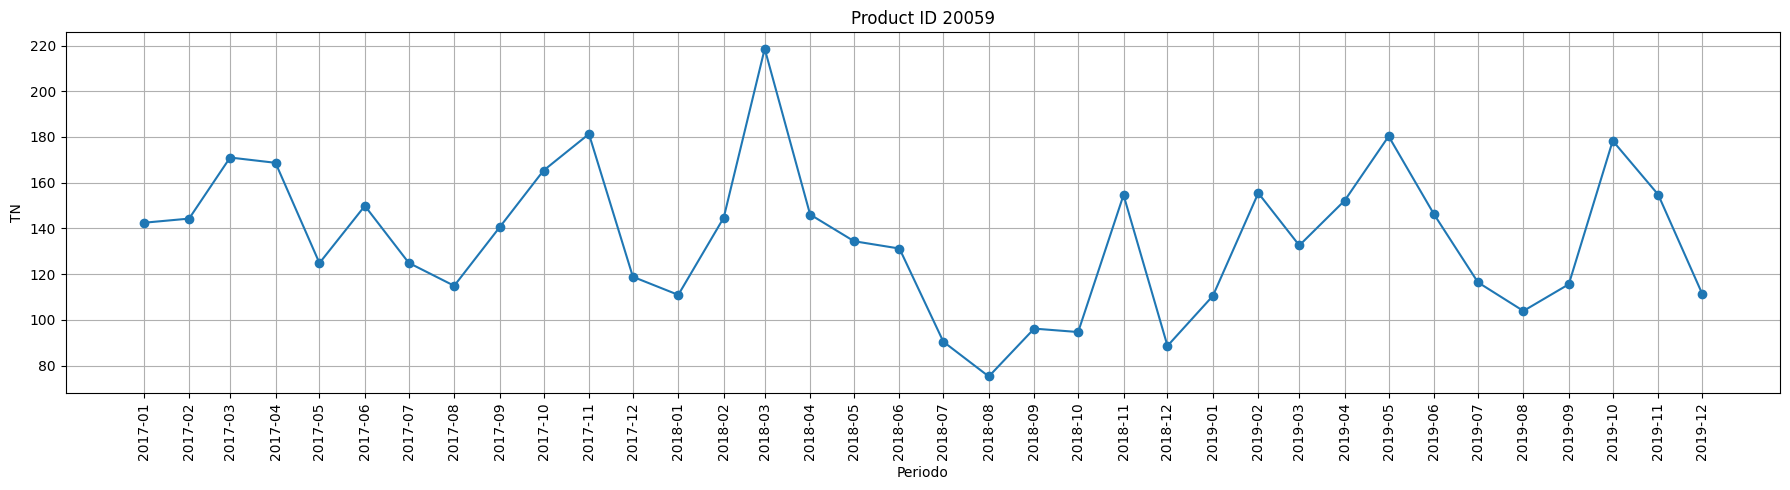

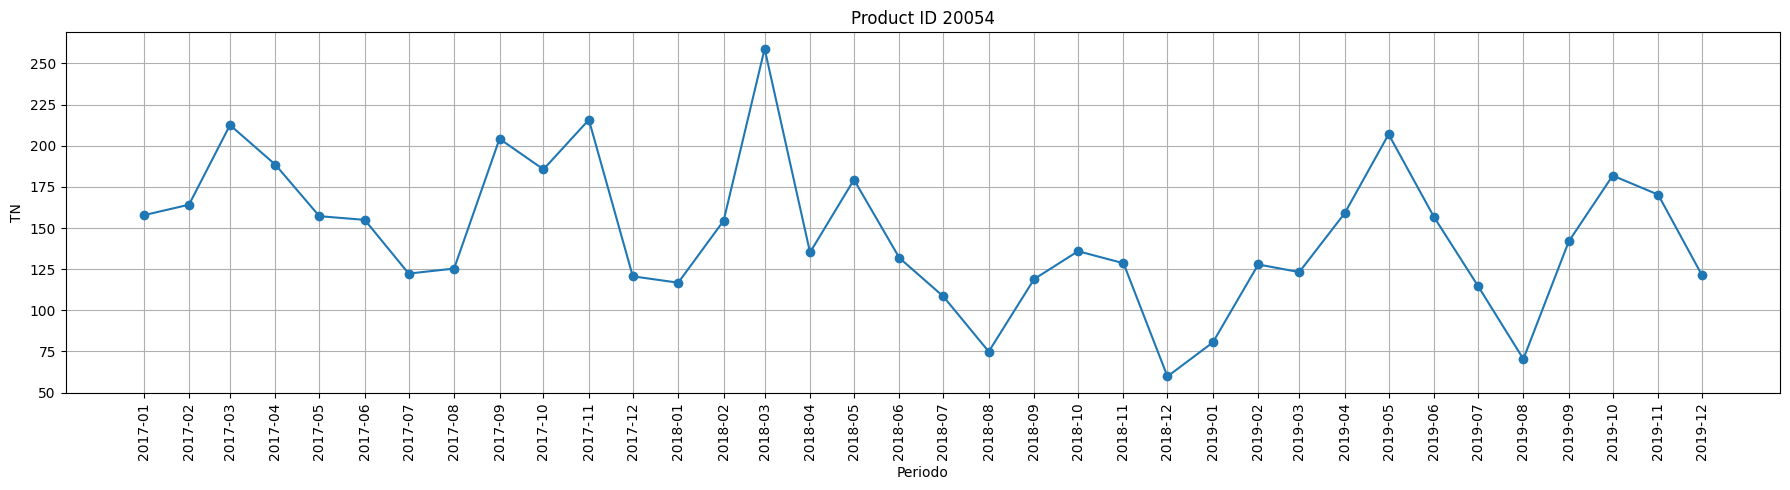

In [37]:
sell_in_group_top50['periodo'] = pd.to_datetime(sell_in_group_top50['periodo'], format='%Y%m')



# Obtener una lista de product_id únicos
unique_product_ids = sell_in_group_top50['product_id'].unique()

# Crear un gráfico por cada product_id único
for product_id in unique_product_ids:
    # Filtrar los datos para el product_id específico
    data = sell_in_group_top50[sell_in_group_top50['product_id'] == product_id]

     

    
    # Crear el gráfico
    plt.figure(figsize=(18, 5))
    plt.plot(data['periodo'], data['tn'], marker='o')  # Convertir periodo a string
    plt.title(f'Product ID {product_id}')
    plt.xlabel('Periodo')
    plt.ylabel('TN')
    plt.grid(True)
   
    # Establecer las etiquetas del eje x como texto
    plt.xticks(data['periodo'], [str(periodo) for periodo in data['periodo']])
    plt.xticks(rotation=90)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    
    plt.tight_layout()
    plt.show()

## **MINIMOS Y MAXIMOS HISTORICOS**

In [38]:
unique_product_ids = sell_in_group['product_id'].unique()
unique_product_ids


array([20003, 20001, 20004, ..., 20854, 20792, 20770], dtype=int64)

**MINIMO HISTORICO**

In [39]:
# Lista de product_ids que quieres filtrar
products_to_filter = [20014, 20016]

# Filtrar unique_product_ids por los productos específicos
unique_product_ids_filtered = sell_in_group[sell_in_group['product_id'].isin(products_to_filter)]['product_id'].unique()


In [40]:
sell_in_group_min = sell_in_group.set_index('product_id').loc[products_to_filter].reset_index()


In [41]:
sell_in_group['periodo'] = pd.to_datetime(sell_in_group['periodo'], format='%Y%m')


In [42]:
data = sell_in_group[sell_in_group['product_id'] == 20014]
data['tn'].min()


248.65917

In [43]:
data = sell_in_group[sell_in_group['product_id'] == 20016]
data['tn'].min()

184.25862

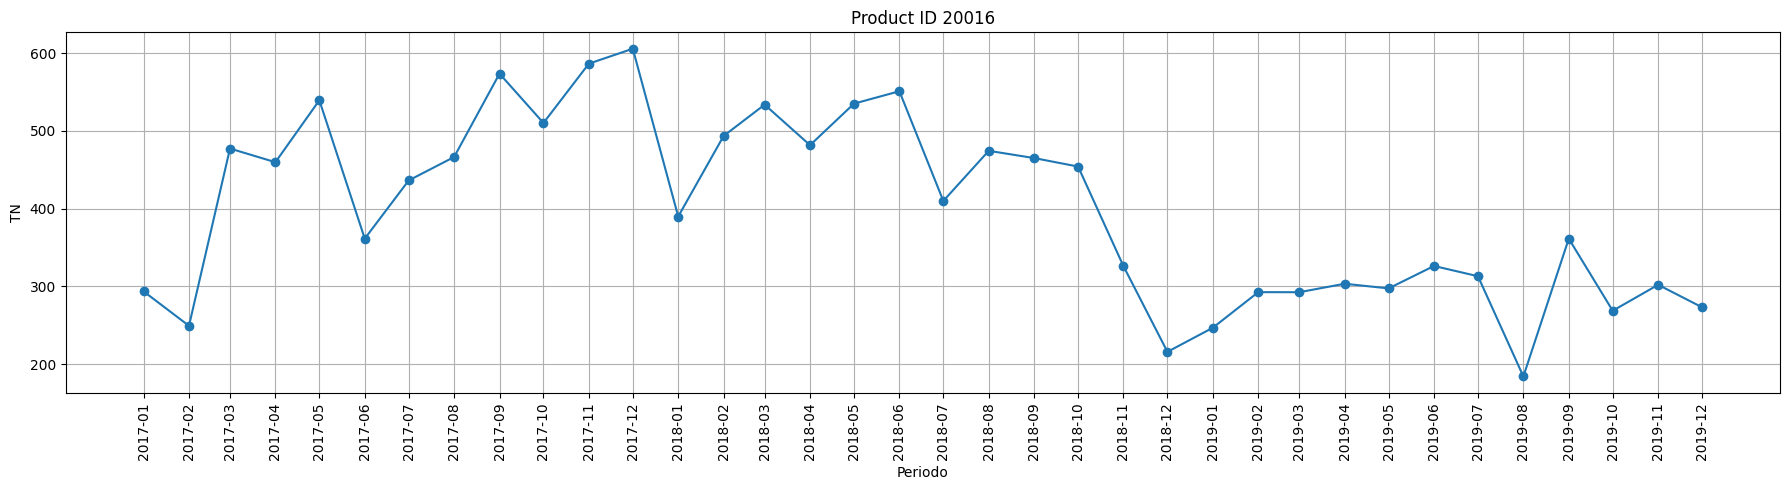

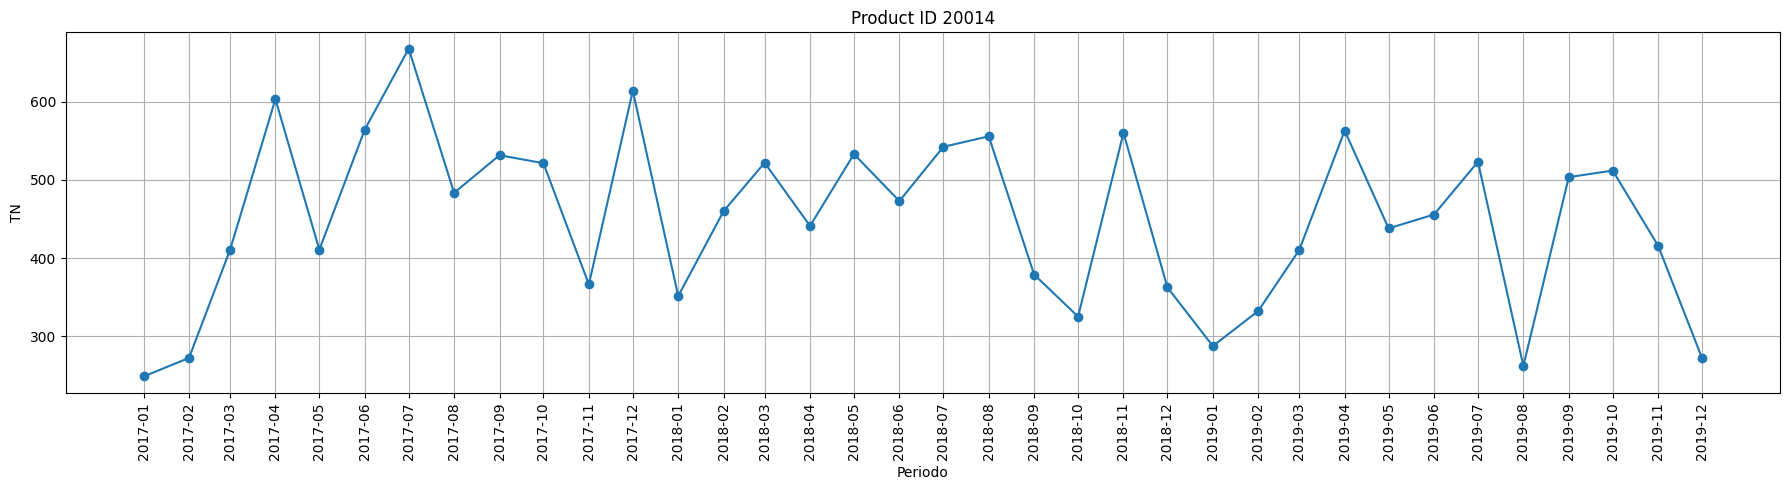

In [44]:
for product_id in unique_product_ids_filtered:
    # Filtrar los datos para el product_id específico
    data = sell_in_group[sell_in_group['product_id'] == product_id]

     

    
    # Crear el gráfico
    plt.figure(figsize=(18, 5))
    plt.plot(data['periodo'], data['tn'], marker='o')  # Convertir periodo a string
    plt.title(f'Product ID {product_id}')
    plt.xlabel('Periodo')
    plt.ylabel('TN')
    plt.grid(True)
   
    # Establecer las etiquetas del eje x como texto
    plt.xticks(data['periodo'], [str(periodo) for periodo in data['periodo']])
    plt.xticks(rotation=90)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    
    plt.tight_layout()
    plt.show()

**MAXIMO HISTORICO**

In [45]:
# Lista de product_ids que quieres filtrar
products_to_filter = [20070, 20073]

# Filtrar unique_product_ids por los productos específicos
unique_product_ids_filtered = sell_in_group[sell_in_group['product_id'].isin(products_to_filter)]['product_id'].unique()


In [46]:
sell_in_group_min = sell_in_group.set_index('product_id').loc[products_to_filter].reset_index()


In [47]:
sell_in_group['periodo'] = pd.to_datetime(sell_in_group['periodo'], format='%Y%m')


In [48]:
data = sell_in_group[sell_in_group['product_id'] == 20070]
data['tn'].max()

162.40374

In [49]:
data = sell_in_group[sell_in_group['product_id'] == 20073]
data['tn'].max()

139.15957

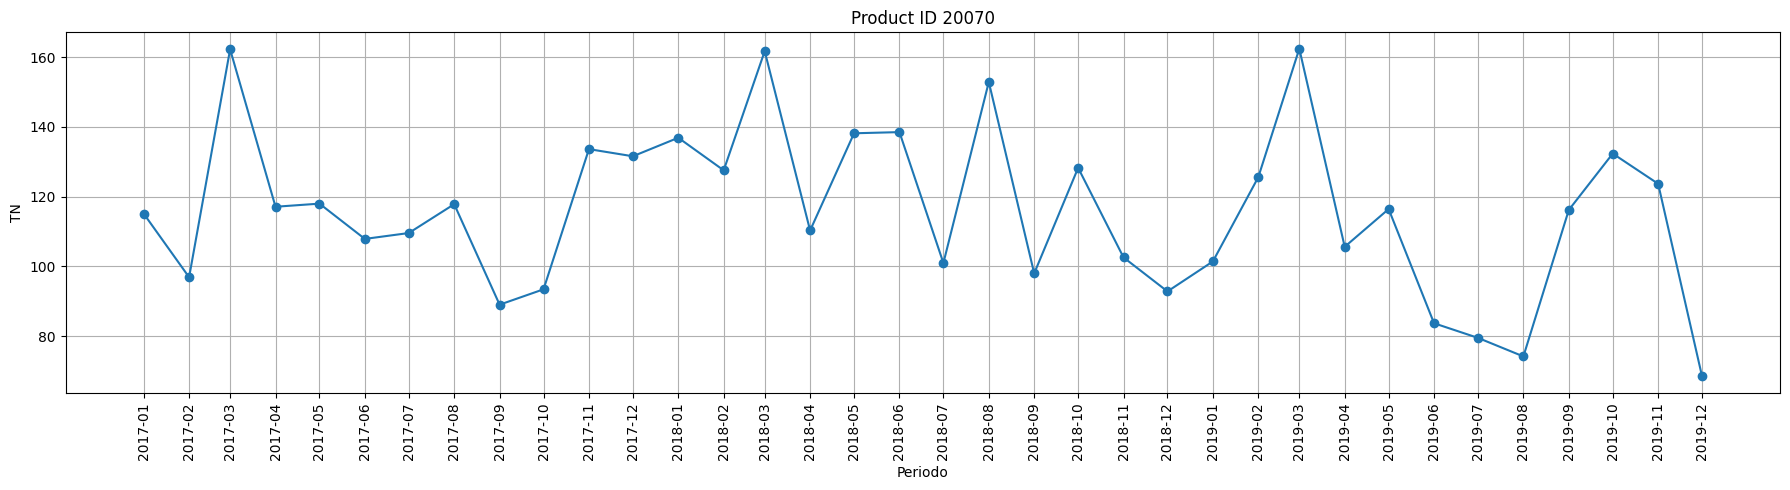

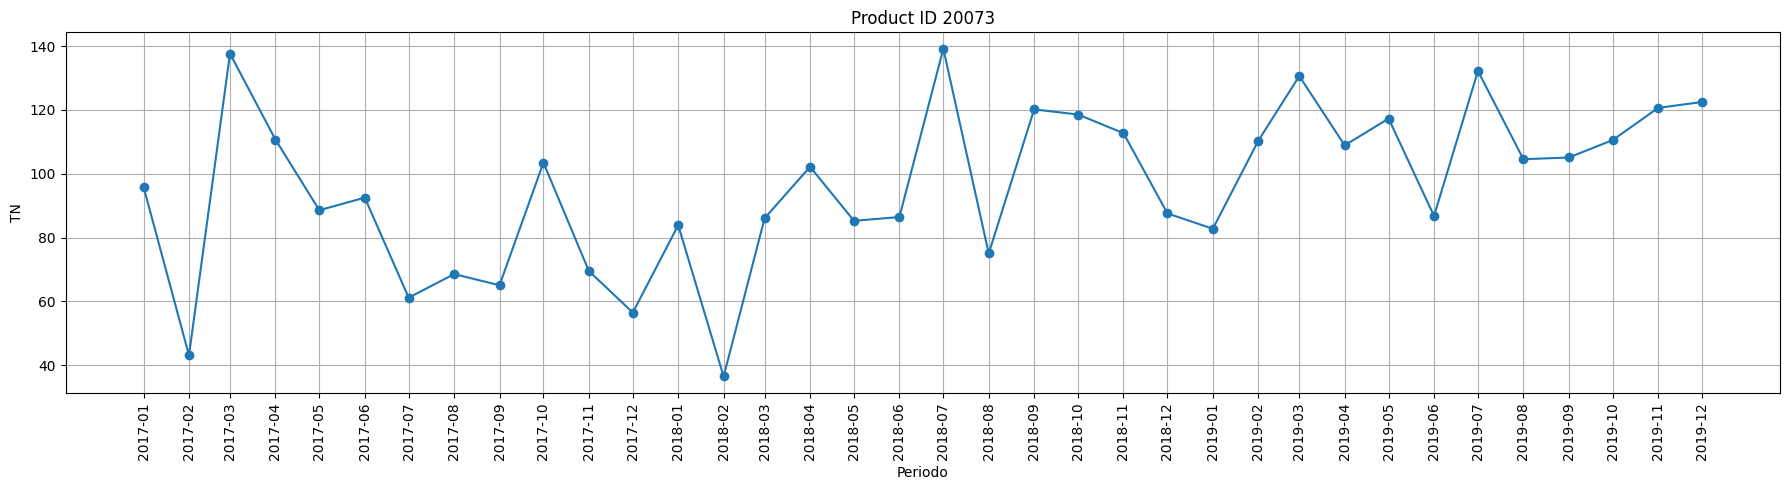

In [50]:
for product_id in unique_product_ids_filtered:
    # Filtrar los datos para el product_id específico
    data = sell_in_group[sell_in_group['product_id'] == product_id]

     

    
    # Crear el gráfico
    plt.figure(figsize=(18, 5))
    plt.plot(data['periodo'], data['tn'], marker='o')  # Convertir periodo a string
    plt.title(f'Product ID {product_id}')
    plt.xlabel('Periodo')
    plt.ylabel('TN')
    plt.grid(True)
   
    # Establecer las etiquetas del eje x como texto
    plt.xticks(data['periodo'], [str(periodo) for periodo in data['periodo']])
    plt.xticks(rotation=90)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    
    plt.tight_layout()
    plt.show()

----
----

## **GRAFICOS TOP 50 CON PROMEDIO**

In [64]:

# Definir la ruta base
ruta_base = r'C:/Users/jnnov/OneDrive/Documentos/AUSTRAL/MATERIAS/2_CUAT_2DO/LABO 3\Datasets Competencia/1ERA COMPETENCIA'

# Leer los archivos
graficos_promedio = os.path.join(ruta_base, 'graficos_promedio.csv')


graficos_promedio = pd.read_csv(graficos_promedio)

In [66]:
graficos_promedio

product_id     periodo           tn
0        20001  2020-01-01  1504.000000
1        20002  2020-01-01  1275.000000
2        20003  2020-01-01   720.000000
3        20005  2020-01-01   750.000000
4        20004  2020-01-01   650.000000
..         ...         ...          ...
95       20053  2020-02-01   146.065586
96       20039  2020-02-01   144.373517
97       20041  2020-02-01   144.237991
98       20059  2020-02-01   138.134098
99       20054  2020-02-01   137.871843

[100 rows x 3 columns]

In [65]:
sell_in_group_top50

product_id    periodo          tn  porcentaje_tn  acum_porcentaje_tn
0          20001 2017-01-01   934.77222       0.070549            0.150811
1          20001 2017-02-01   798.01620       0.060228            2.630614
2          20001 2017-03-01  1303.35771       0.098367            5.277731
3          20001 2017-04-01  1069.96130       0.080752            8.734908
4          20001 2017-05-01  1502.20132       0.113375           11.758161
...          ...        ...         ...            ...                 ...
1723       20054 2019-08-01    70.37038       0.005311           89.322586
1724       20054 2019-09-01   141.86806       0.010707           91.466450
1725       20054 2019-10-01   181.84173       0.013724           94.020874
1726       20054 2019-11-01   170.27657       0.012851           96.717965
1727       20054 2019-12-01   121.20910       0.009148           99.062832

[1728 rows x 5 columns]

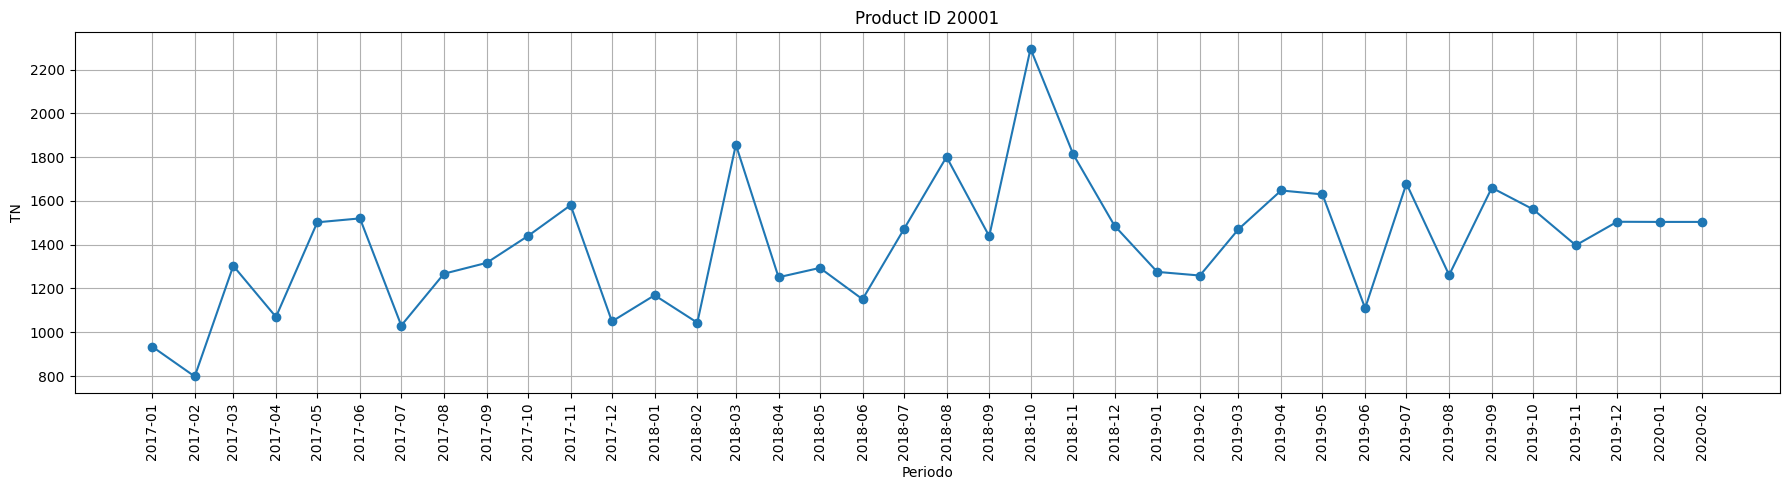

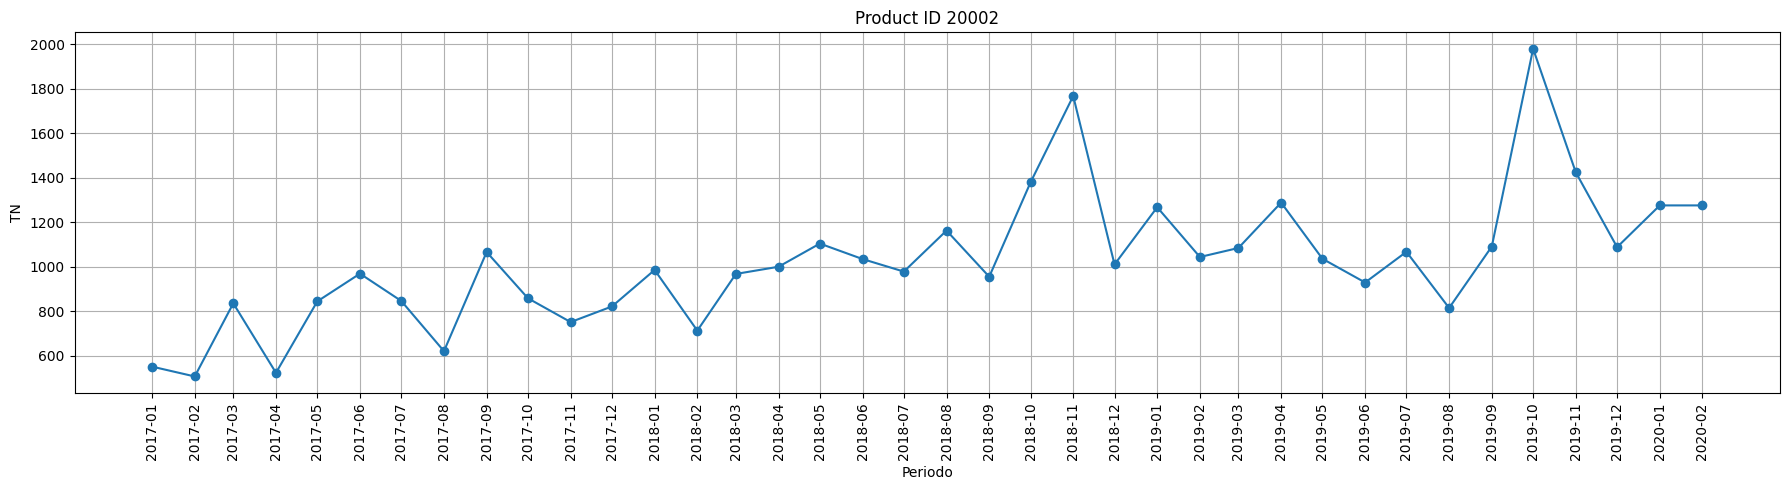

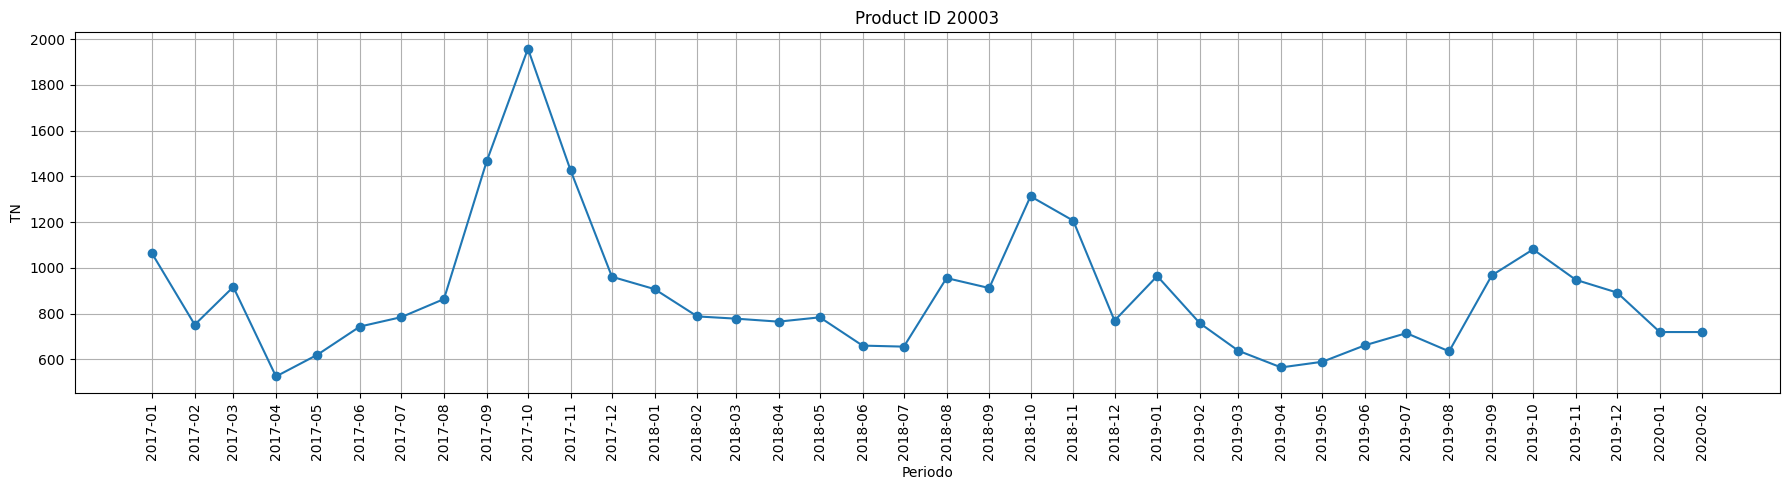

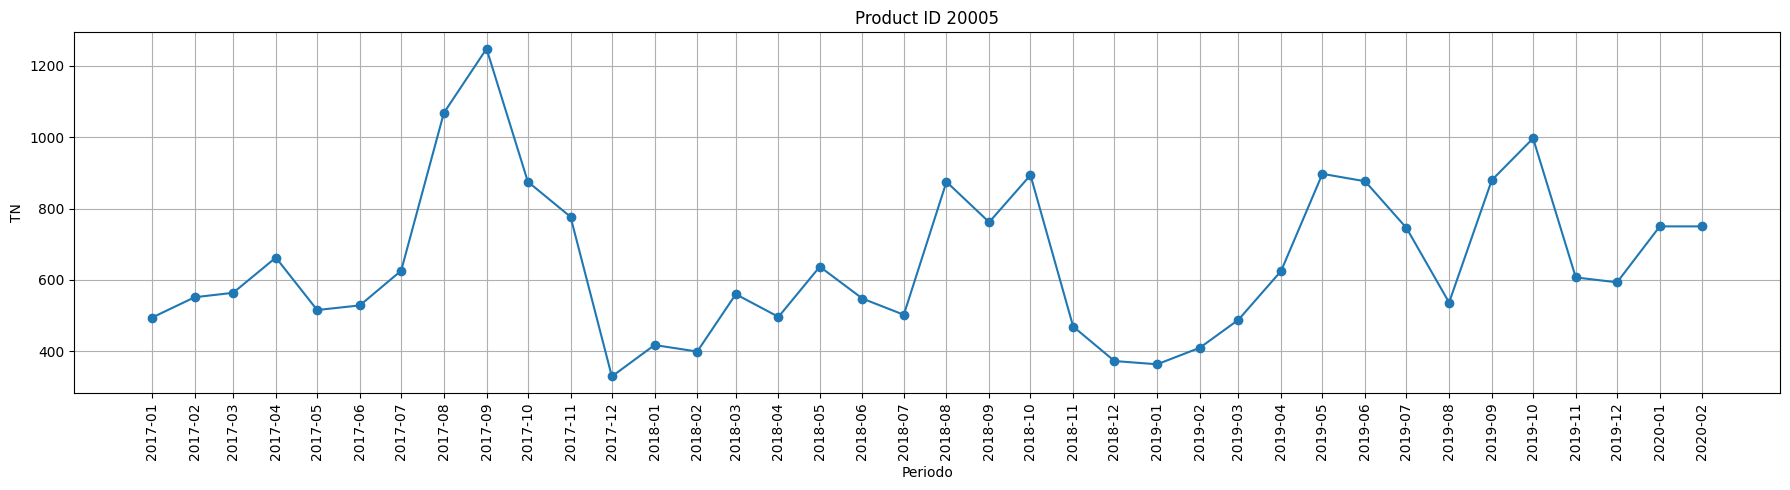

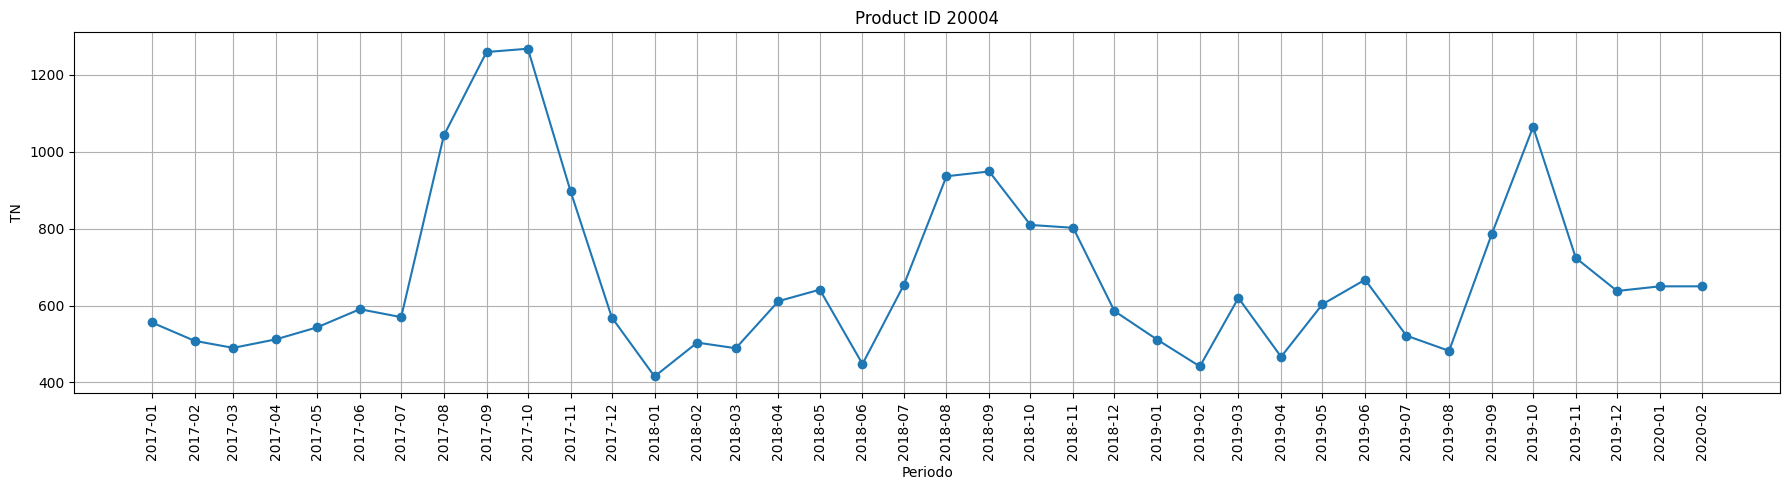

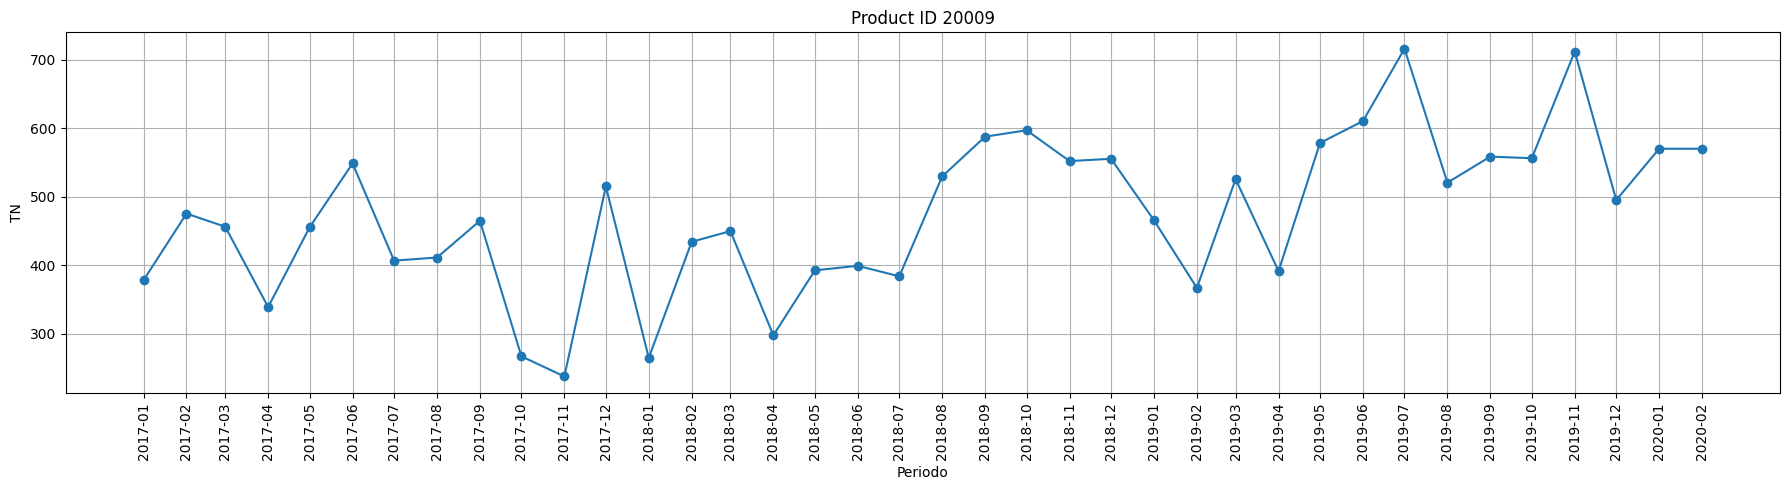

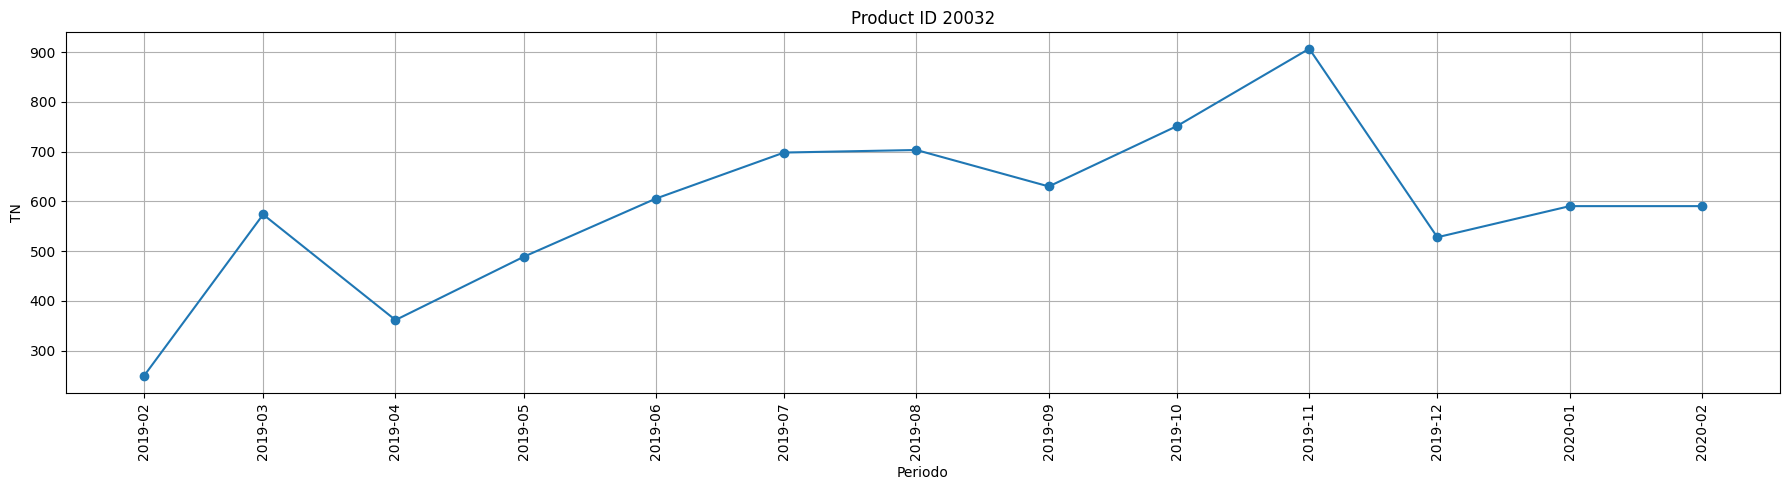

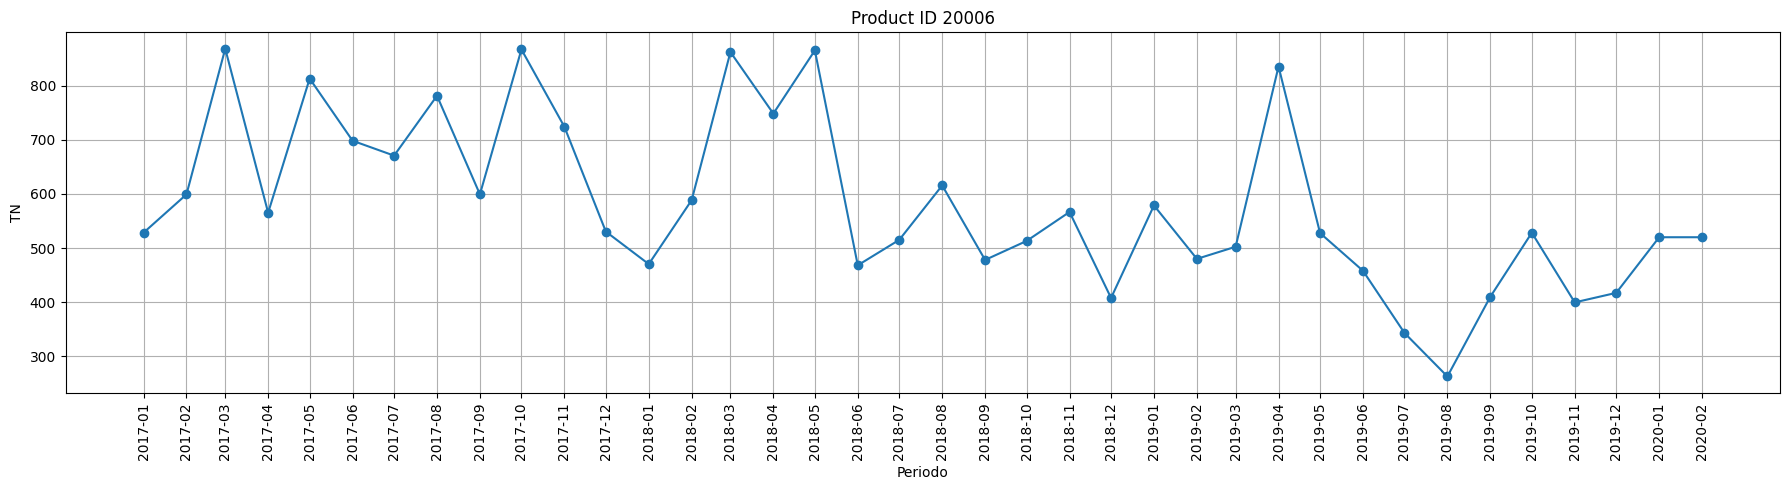

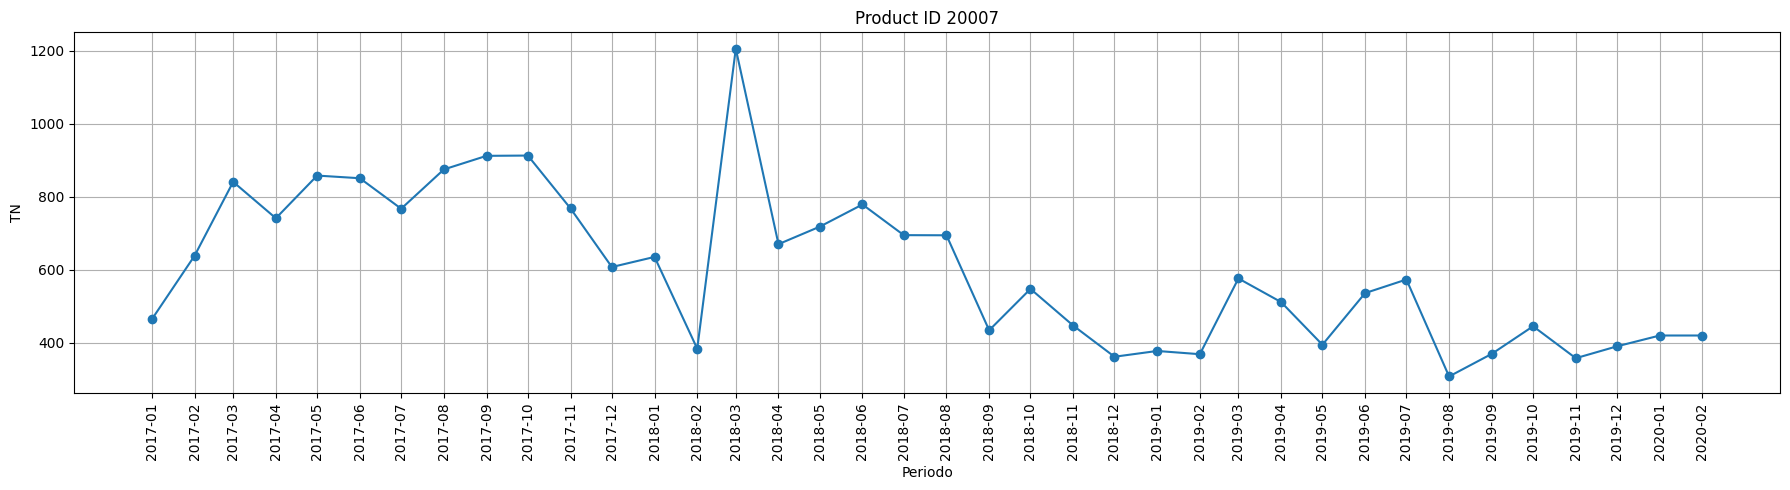

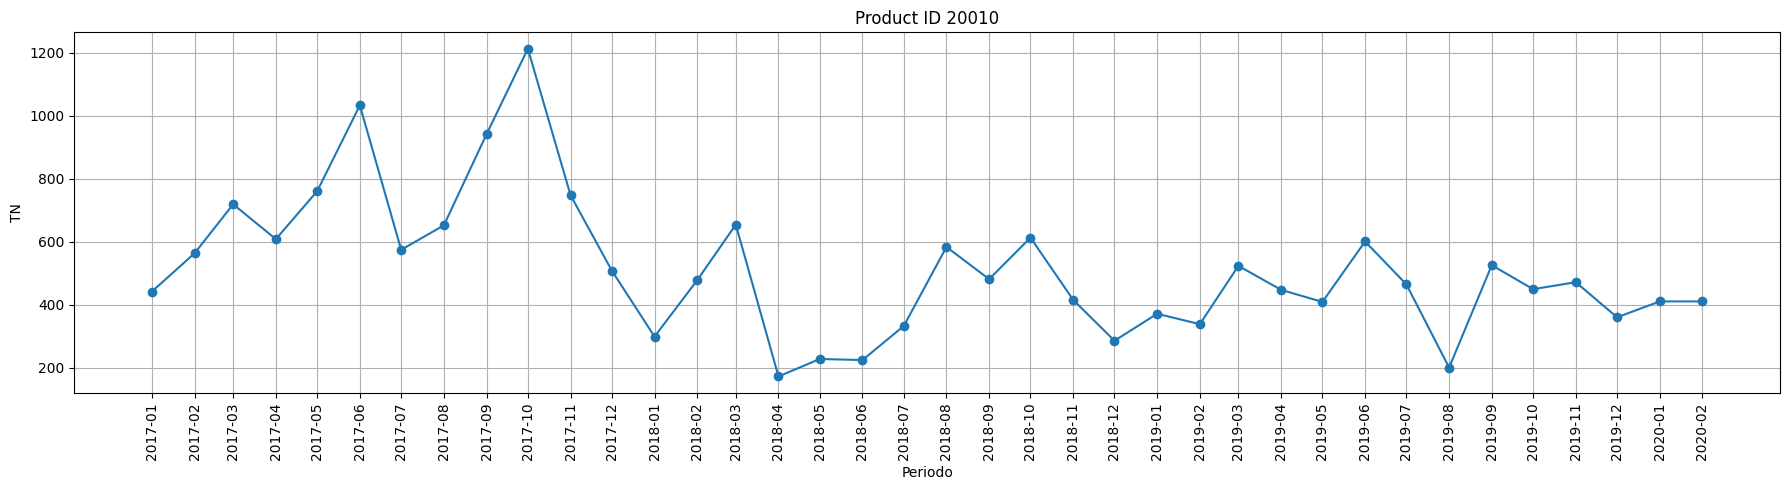

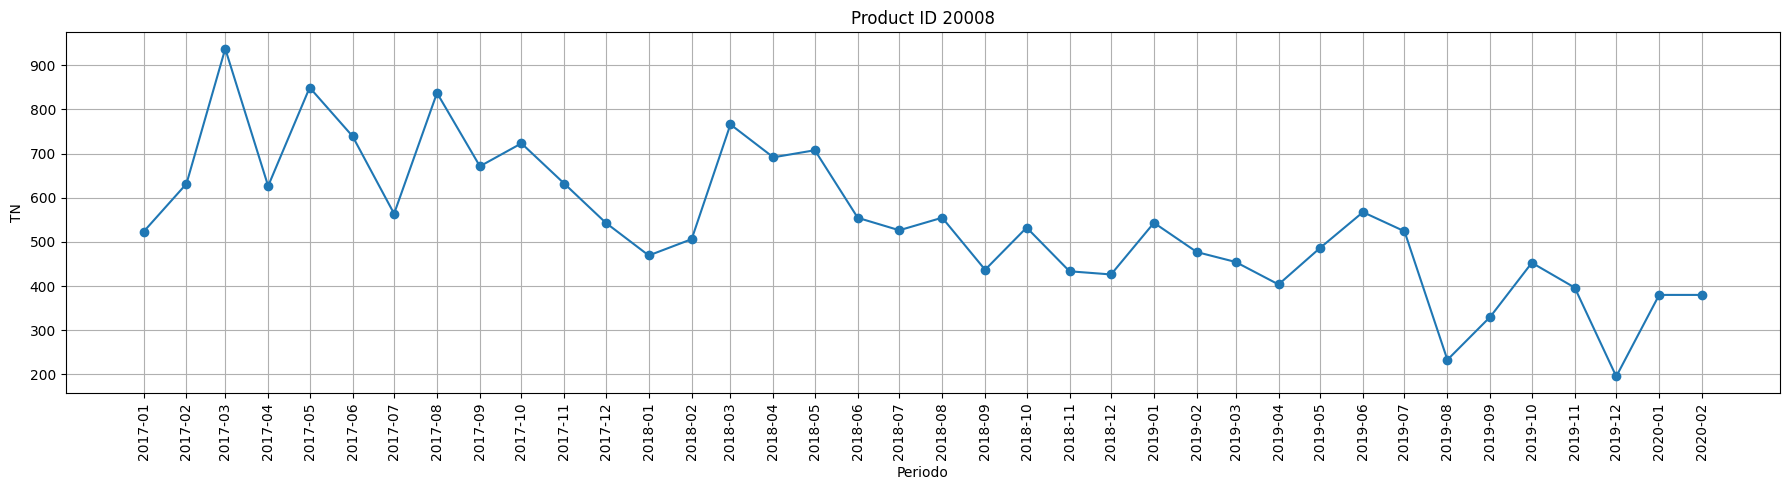

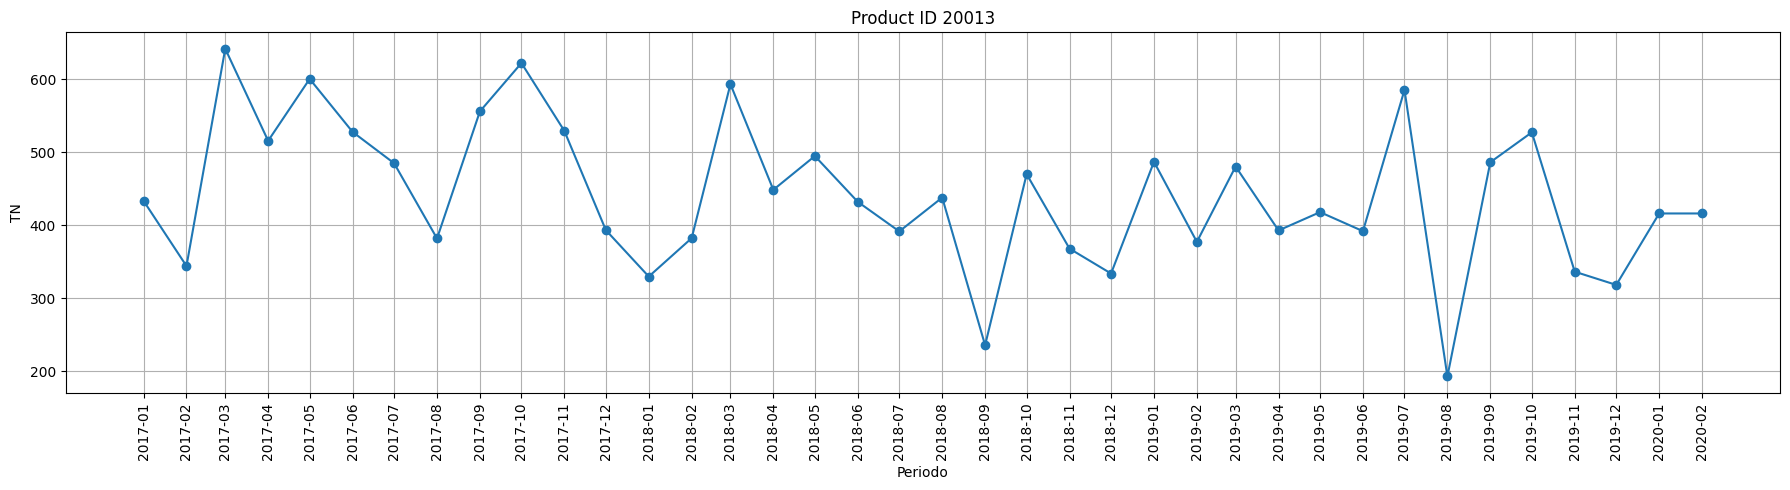

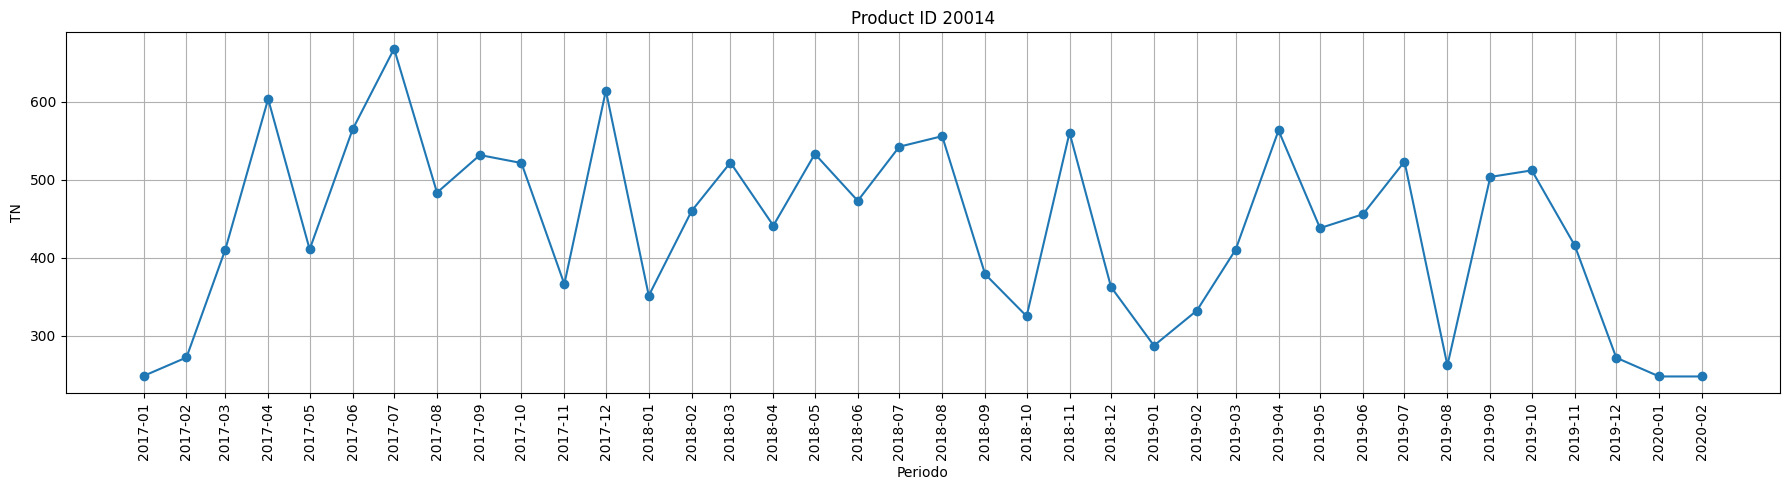

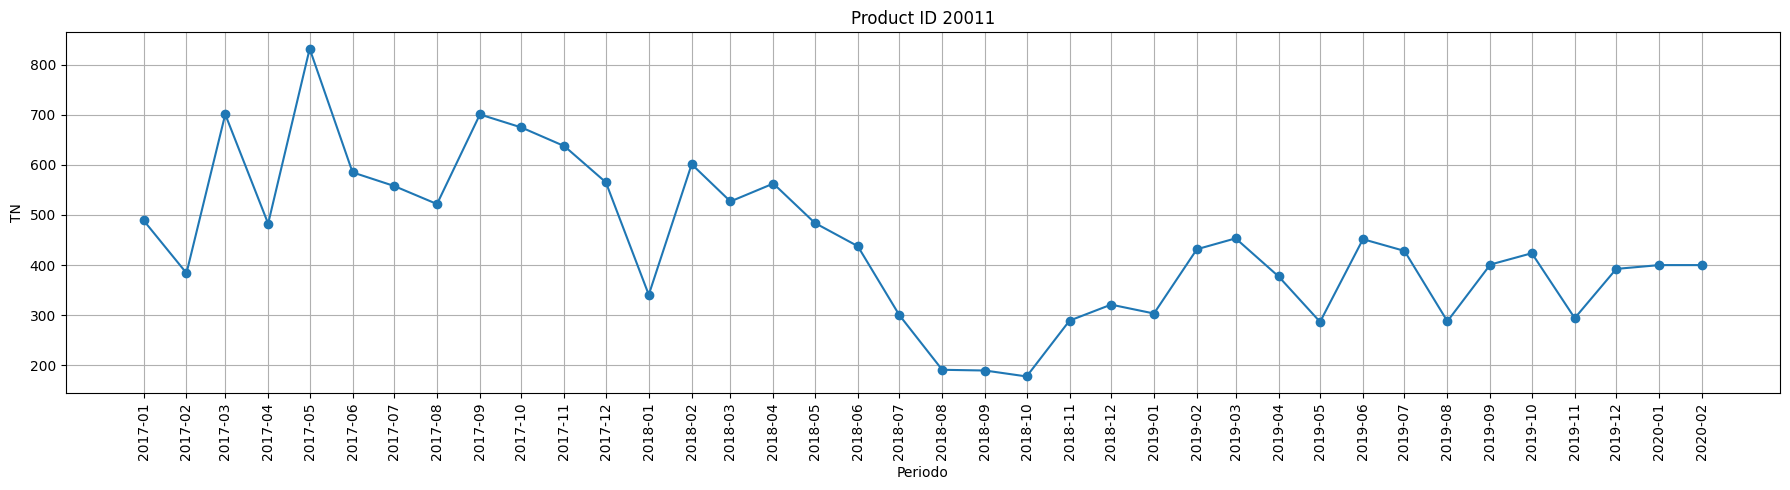

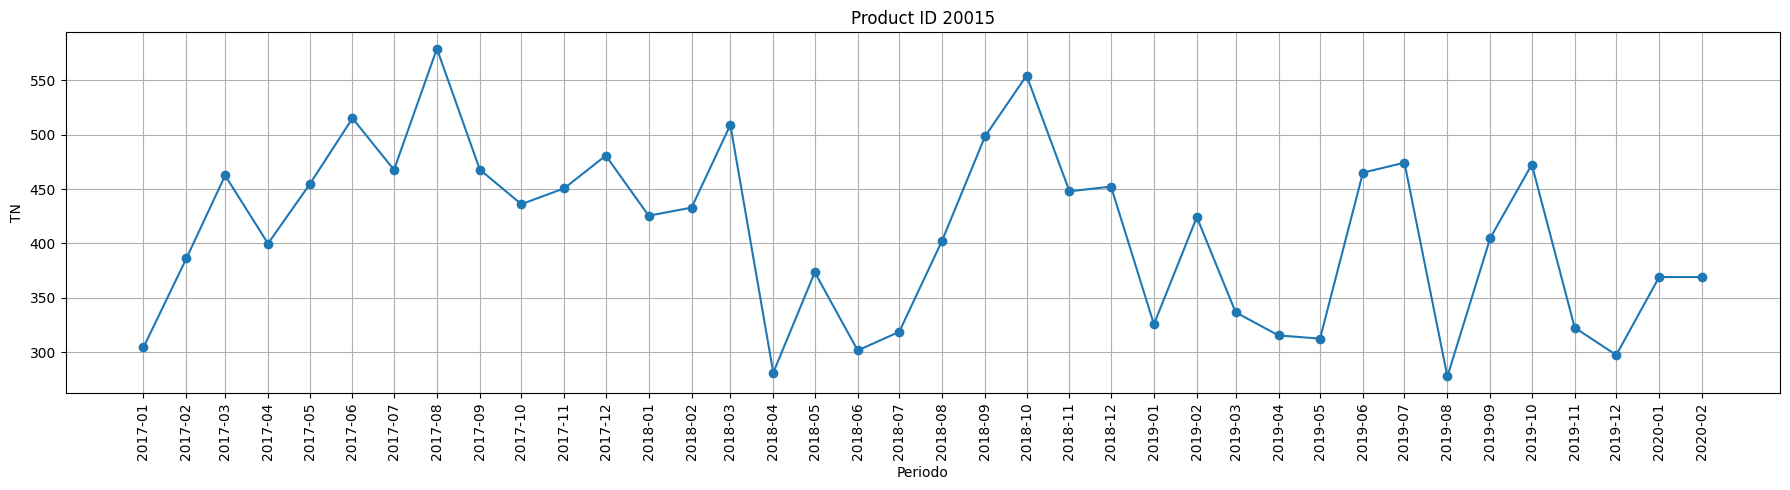

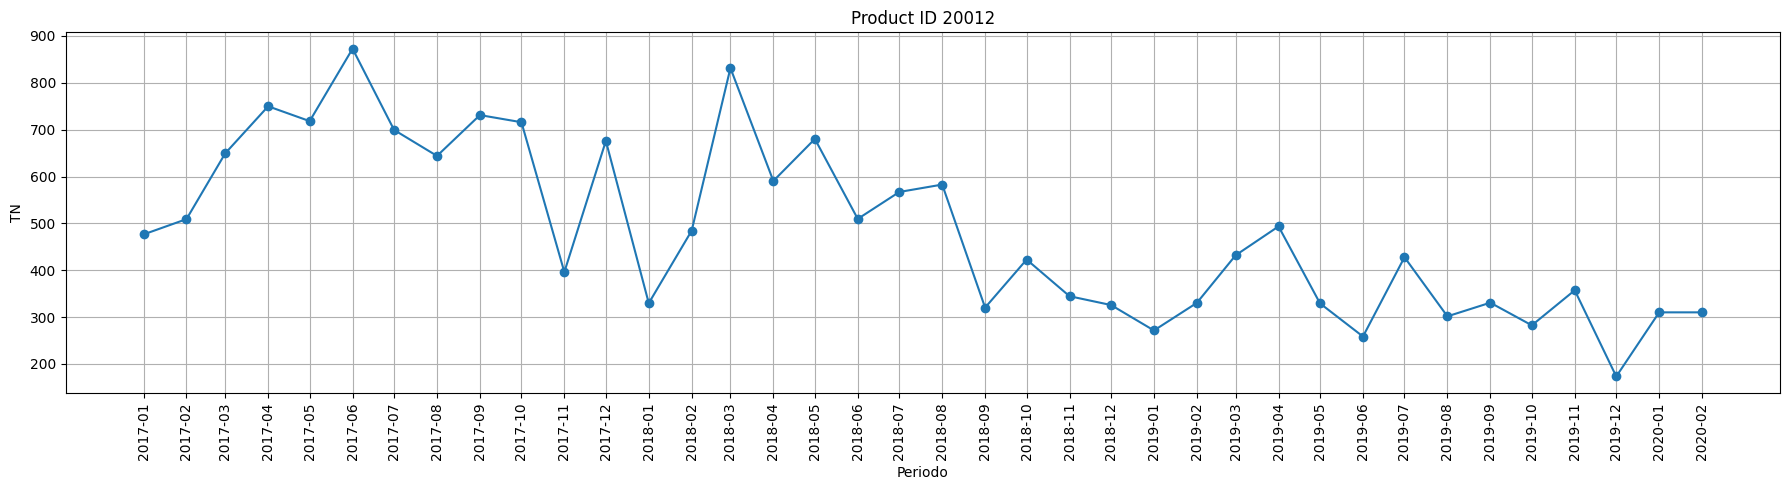

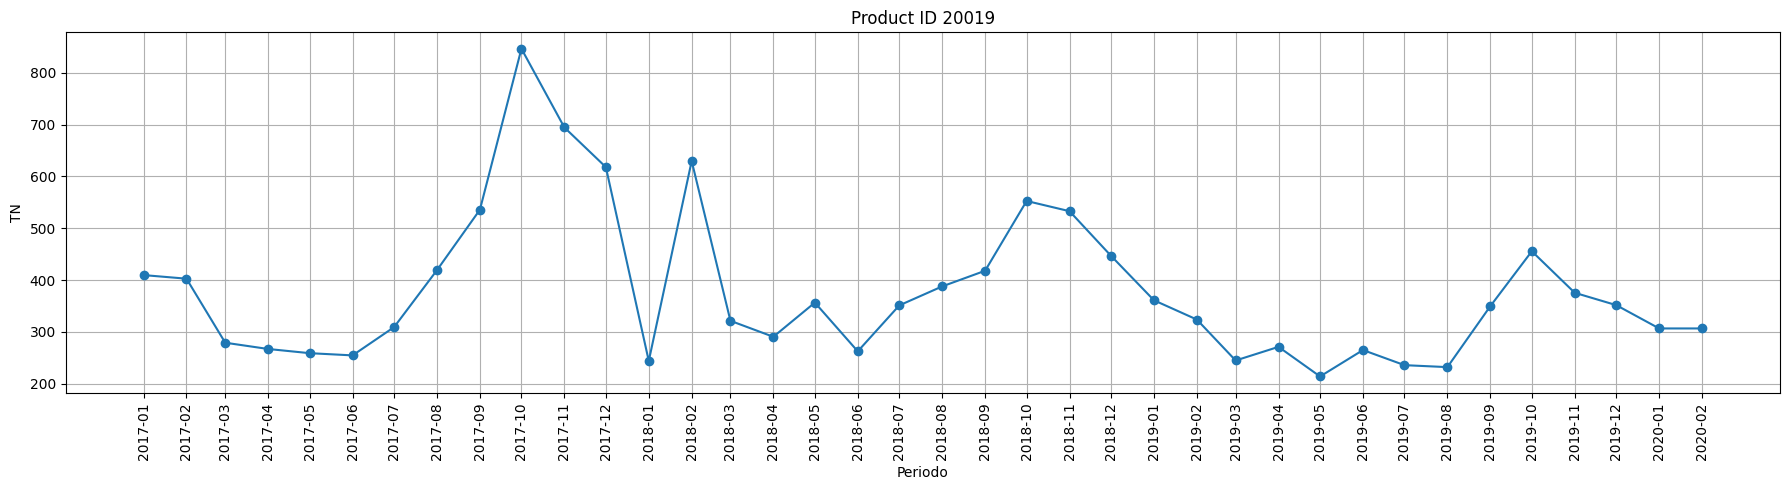

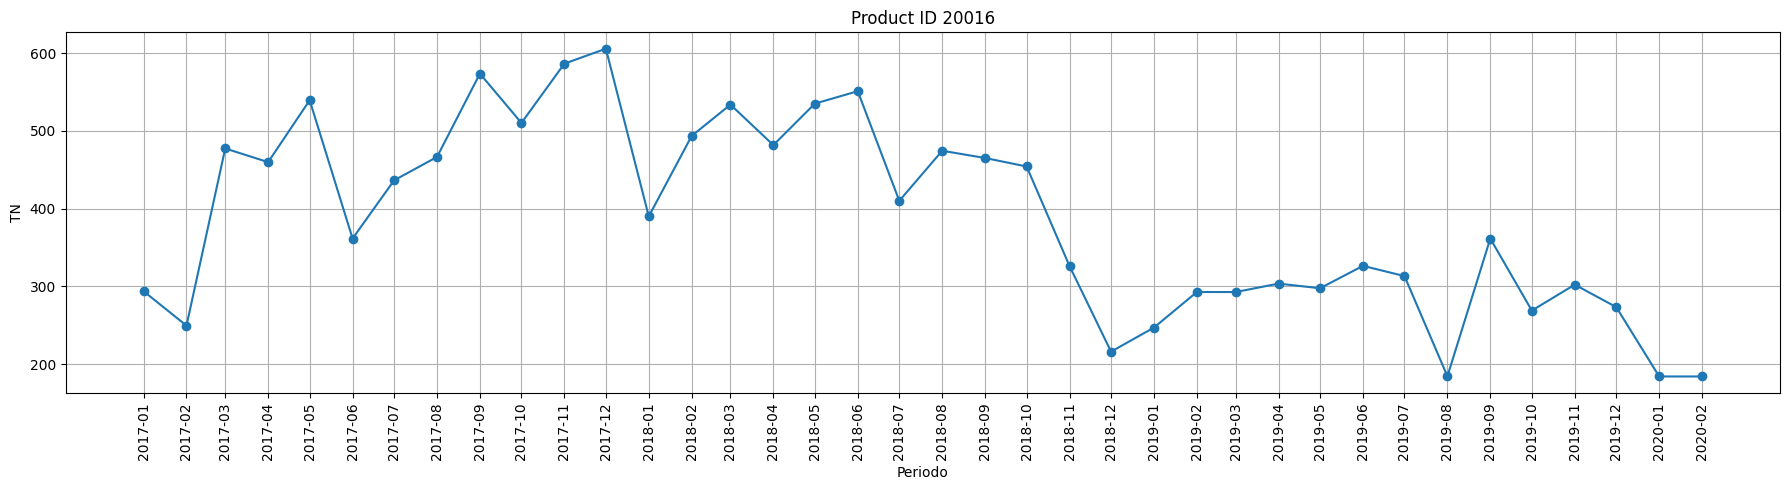

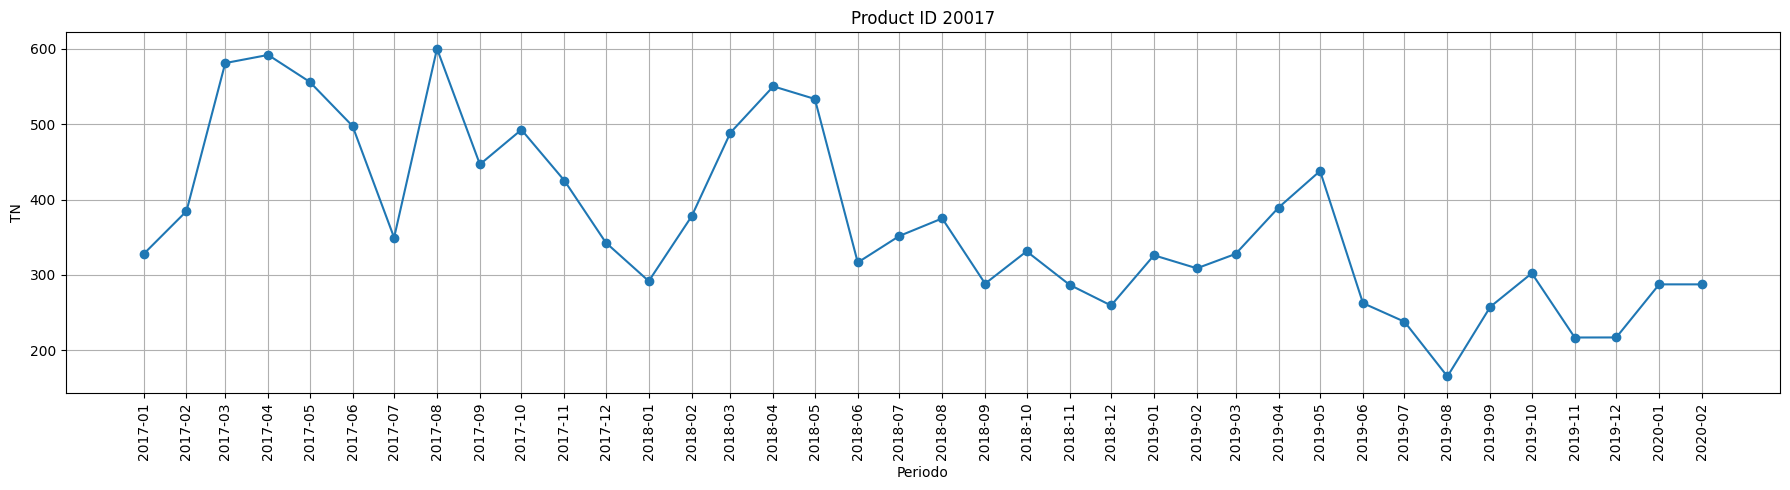

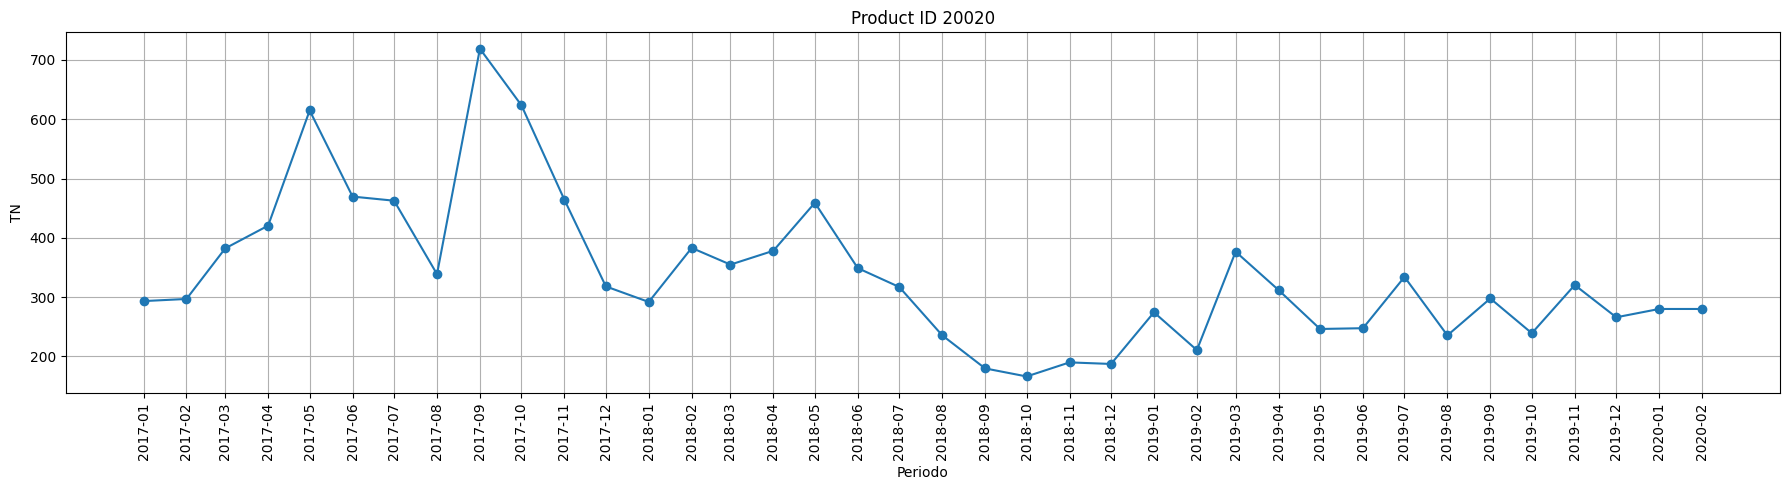

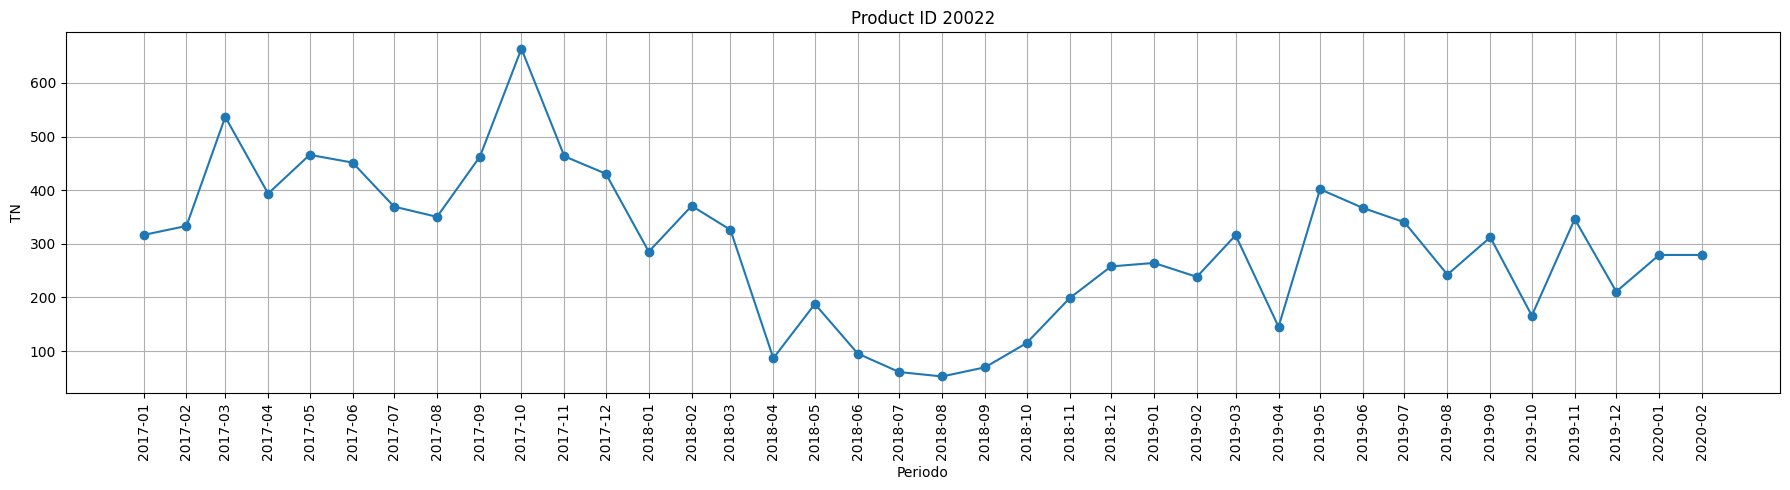

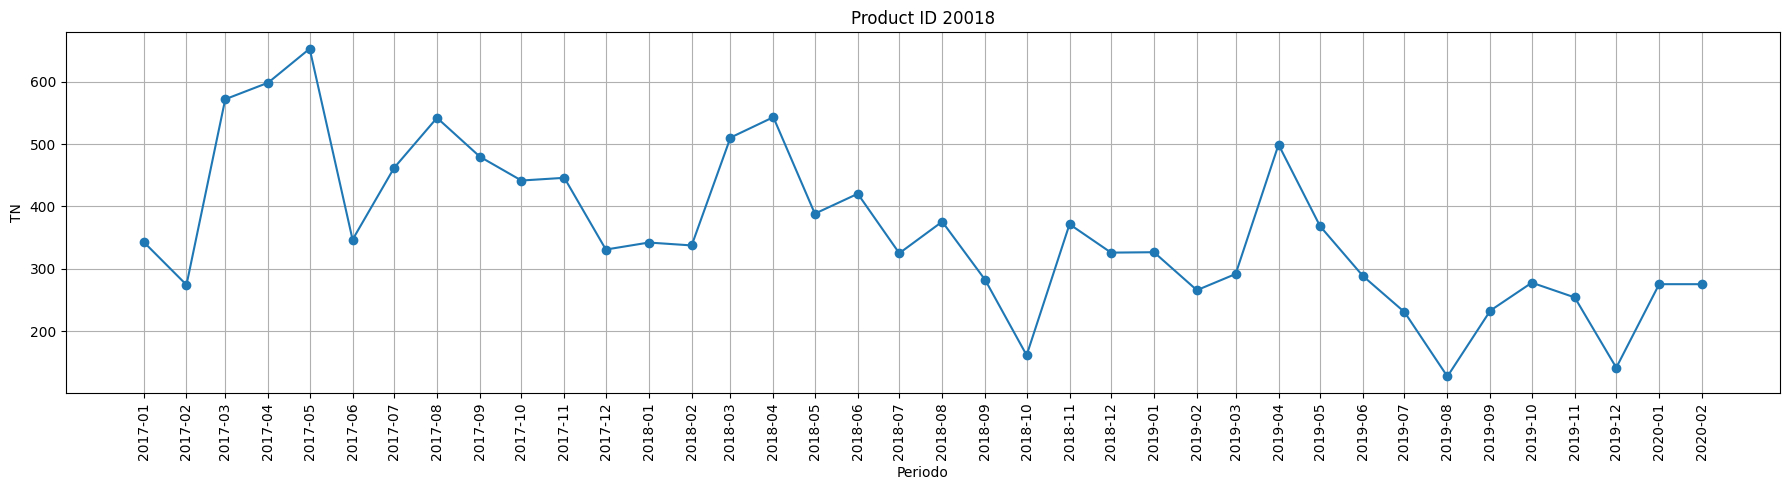

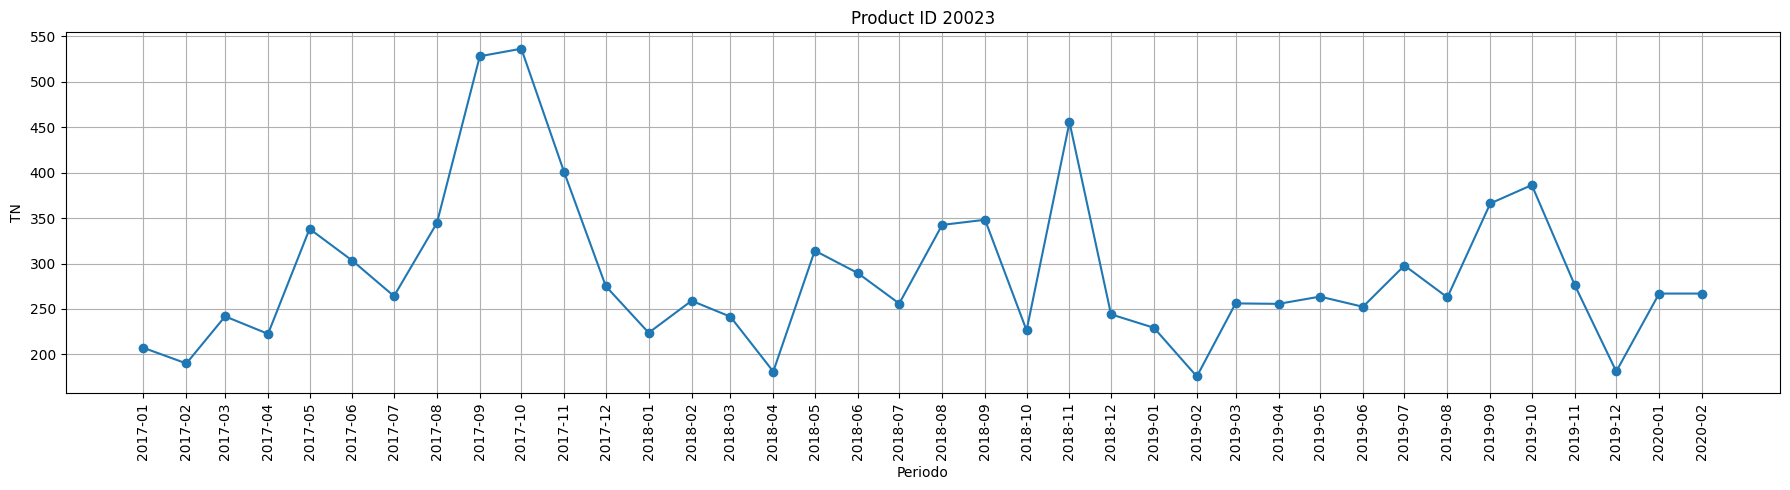

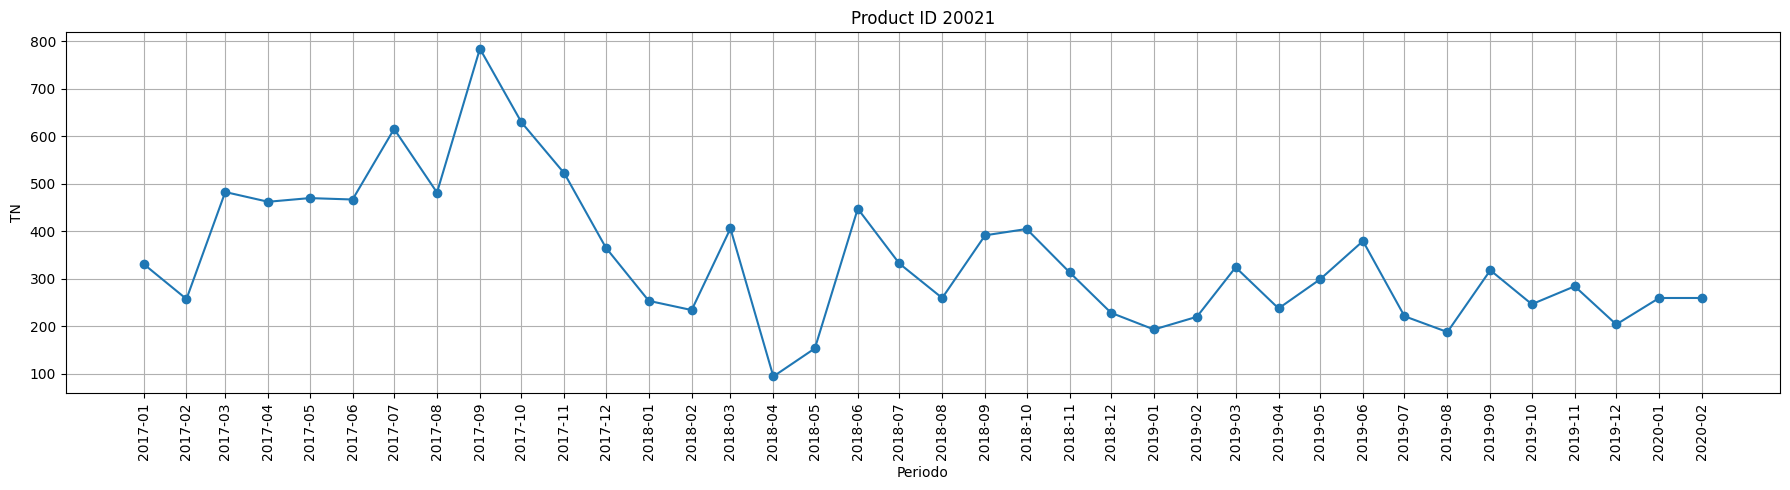

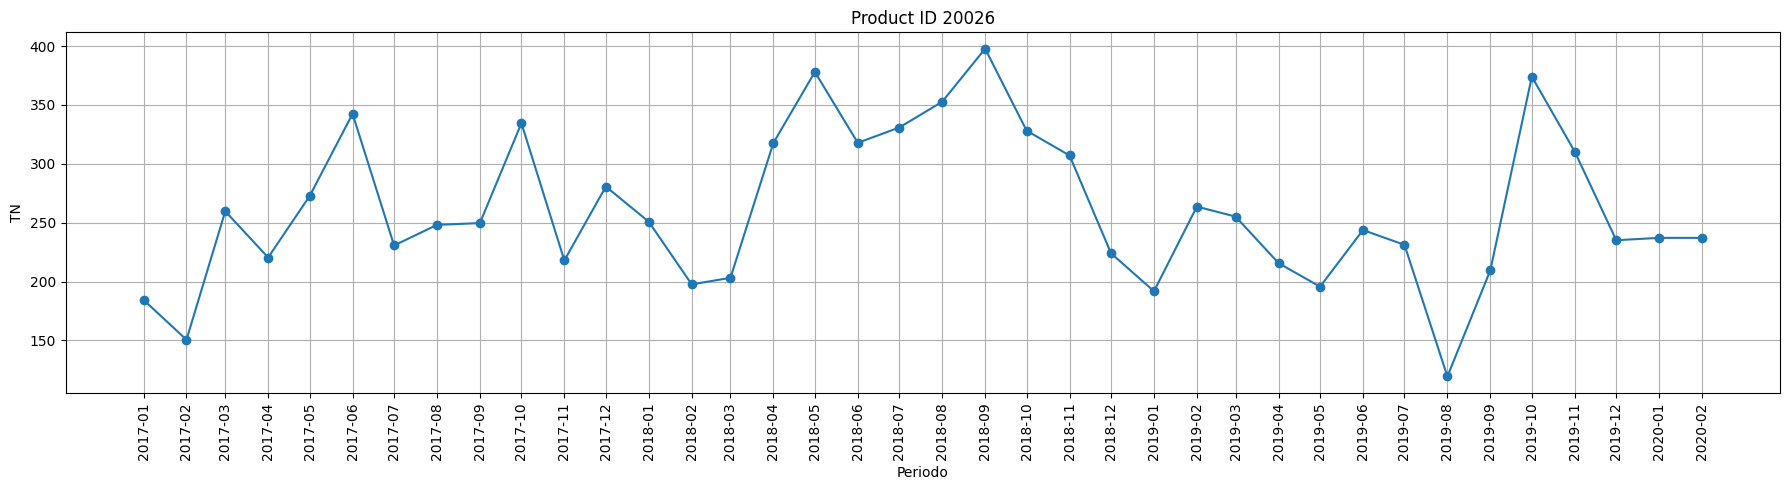

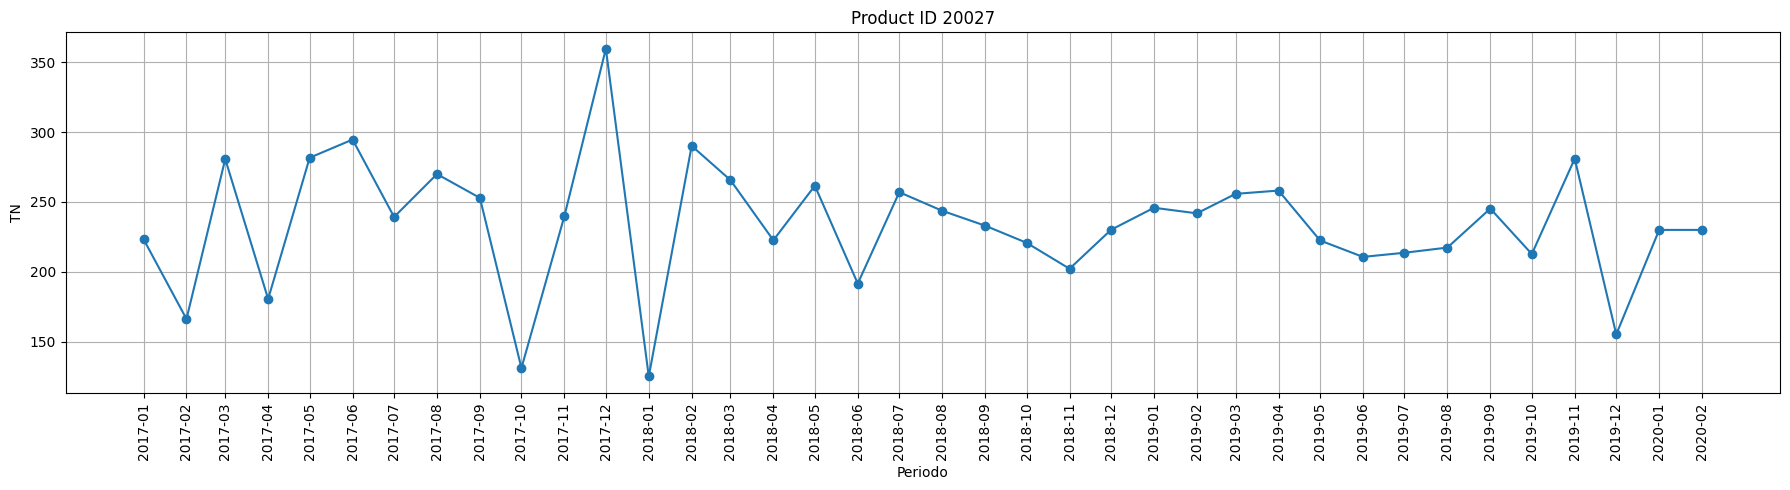

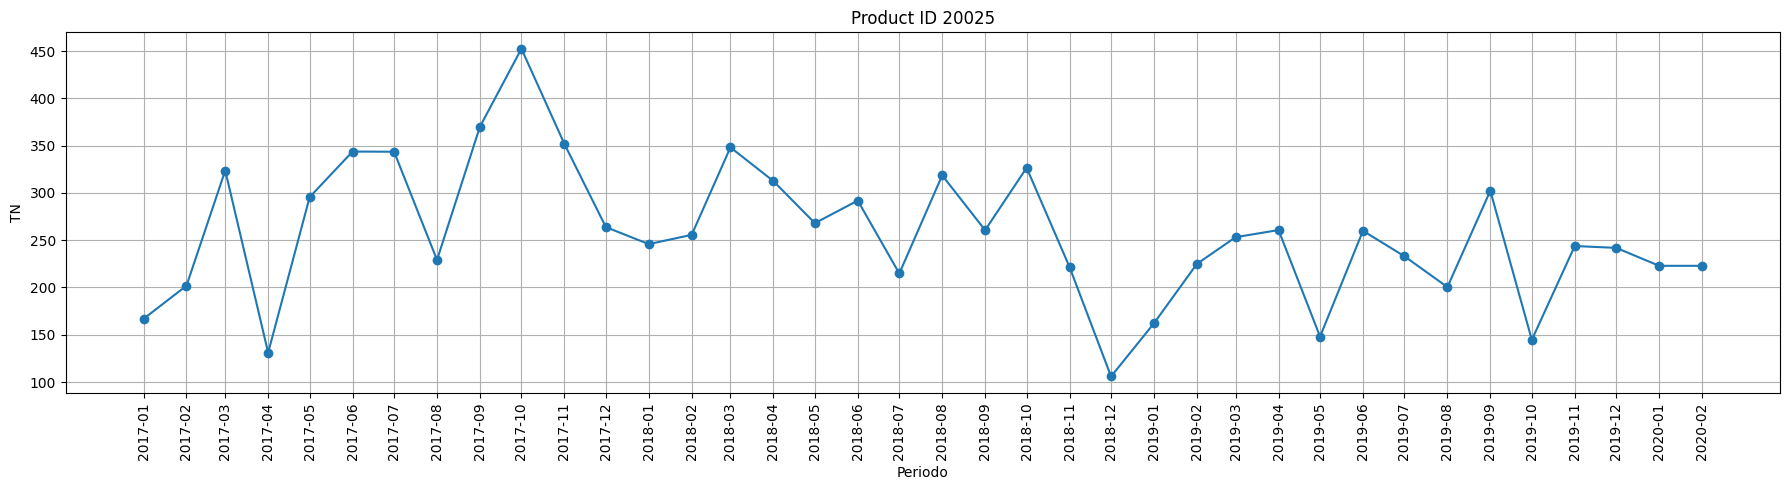

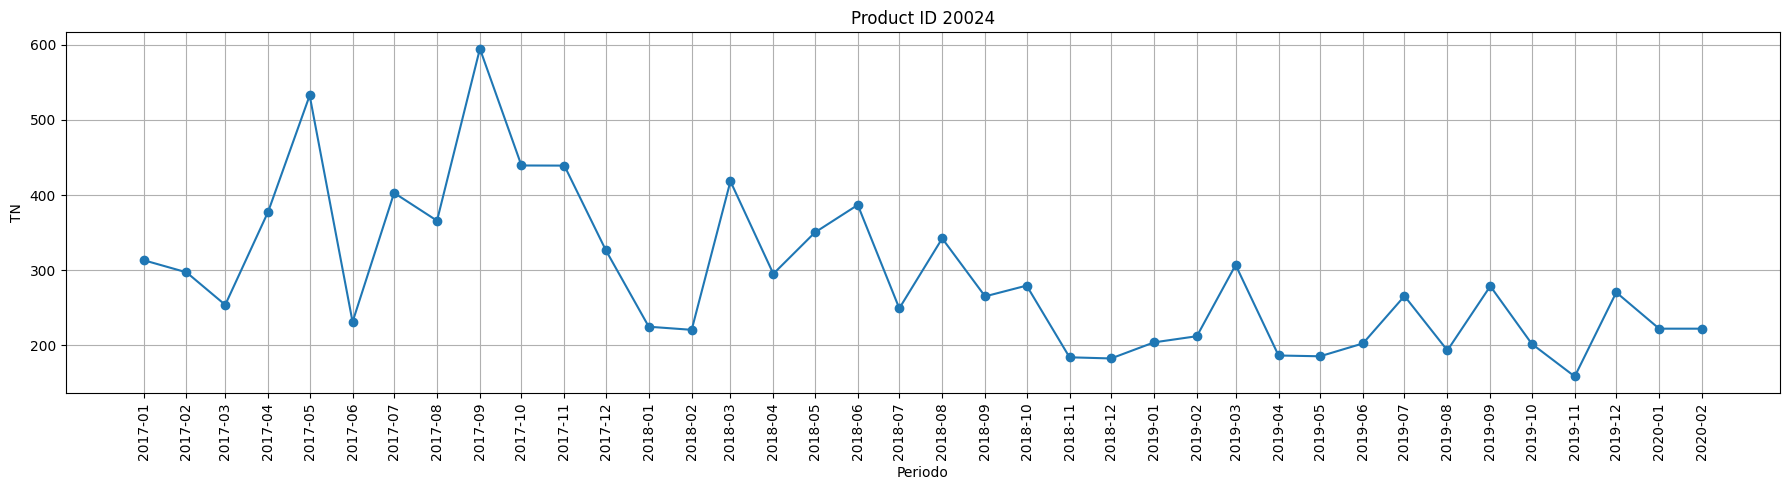

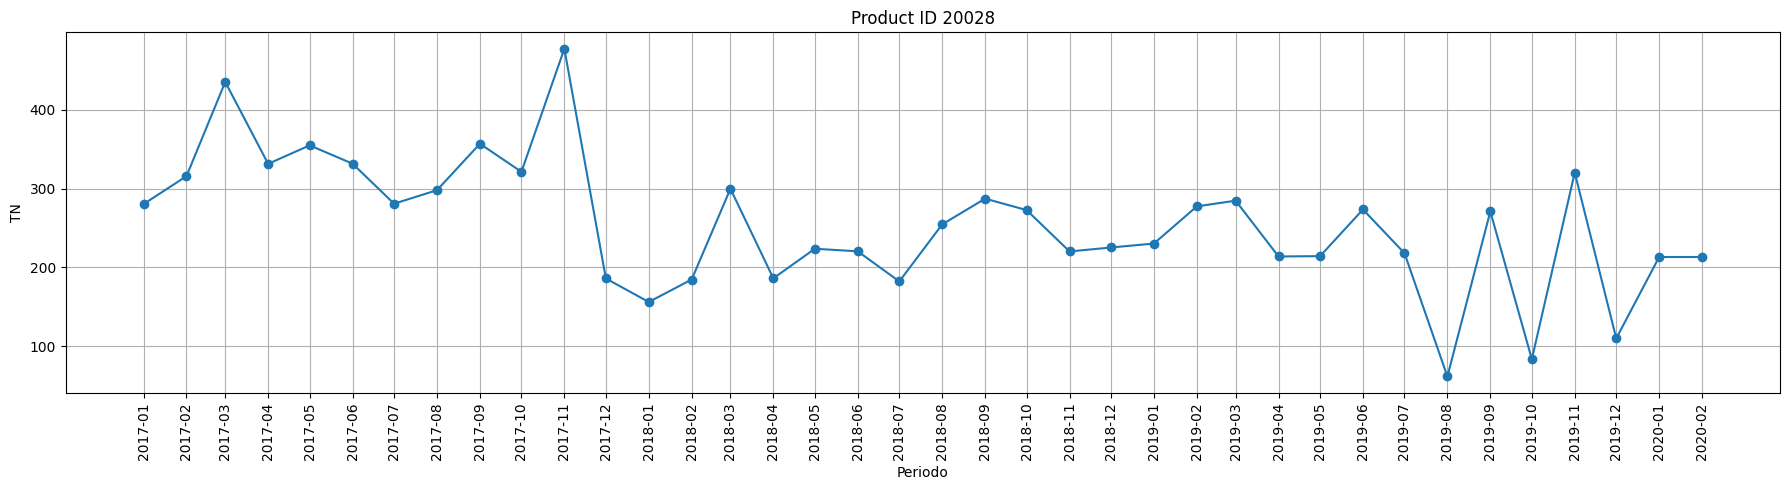

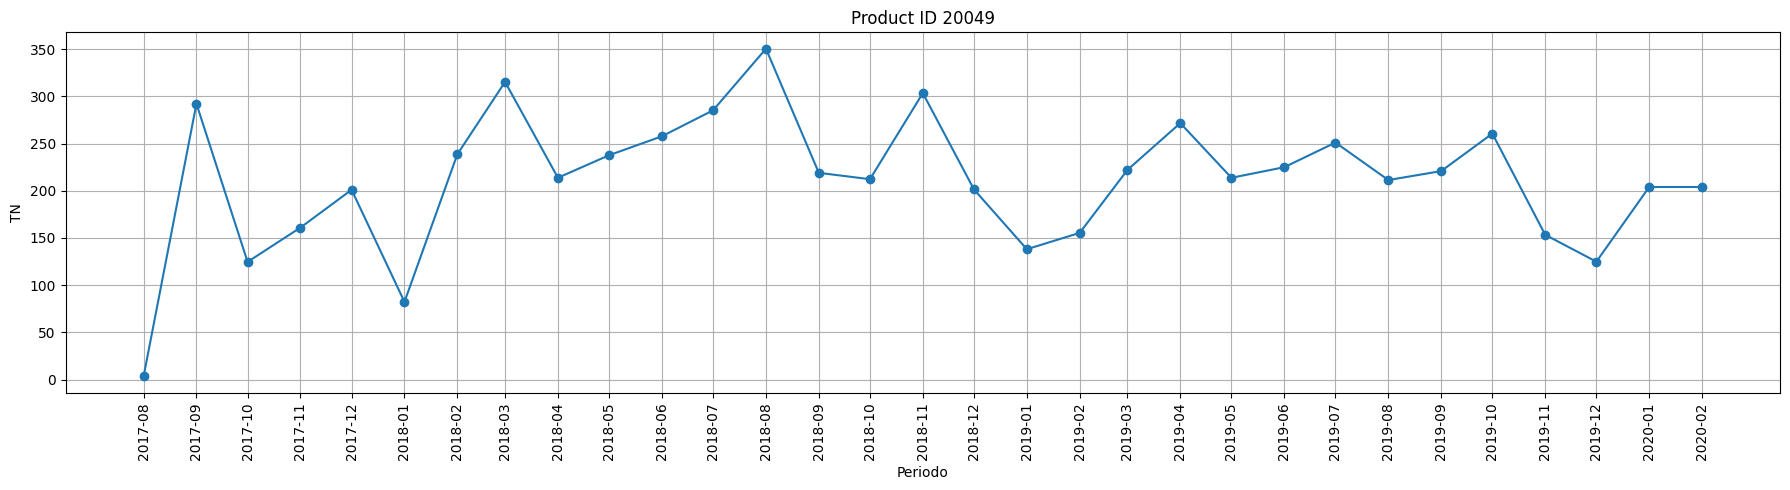

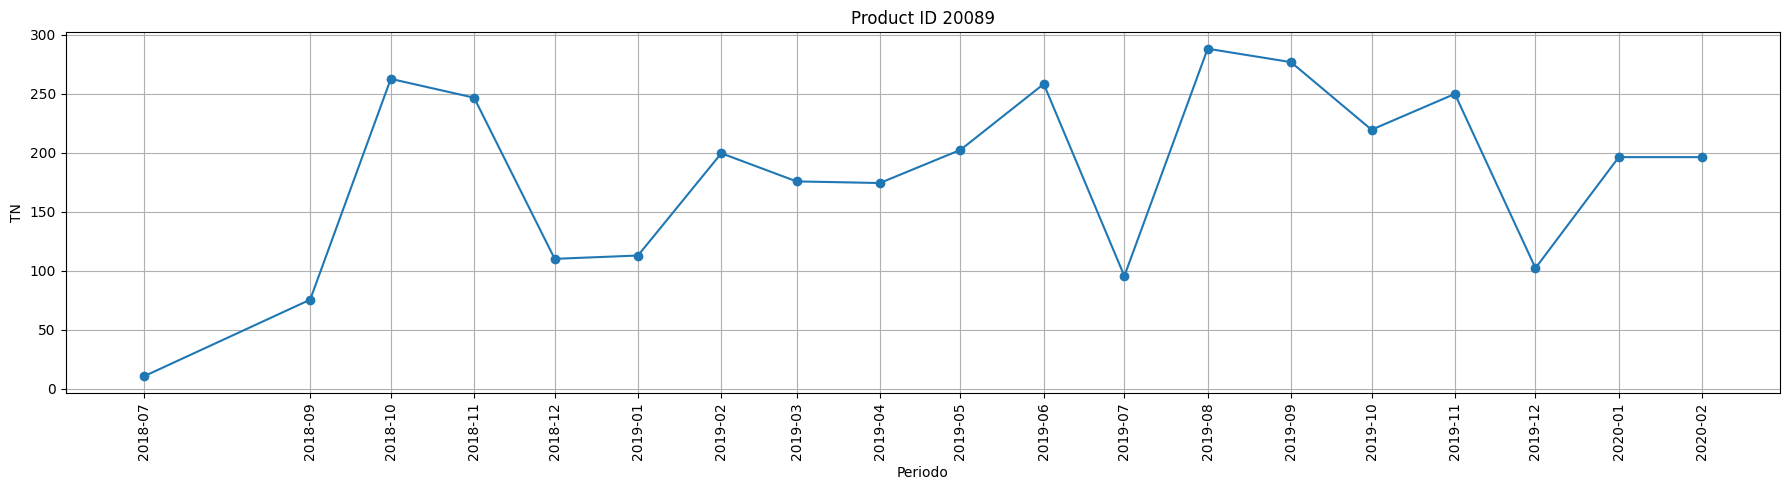

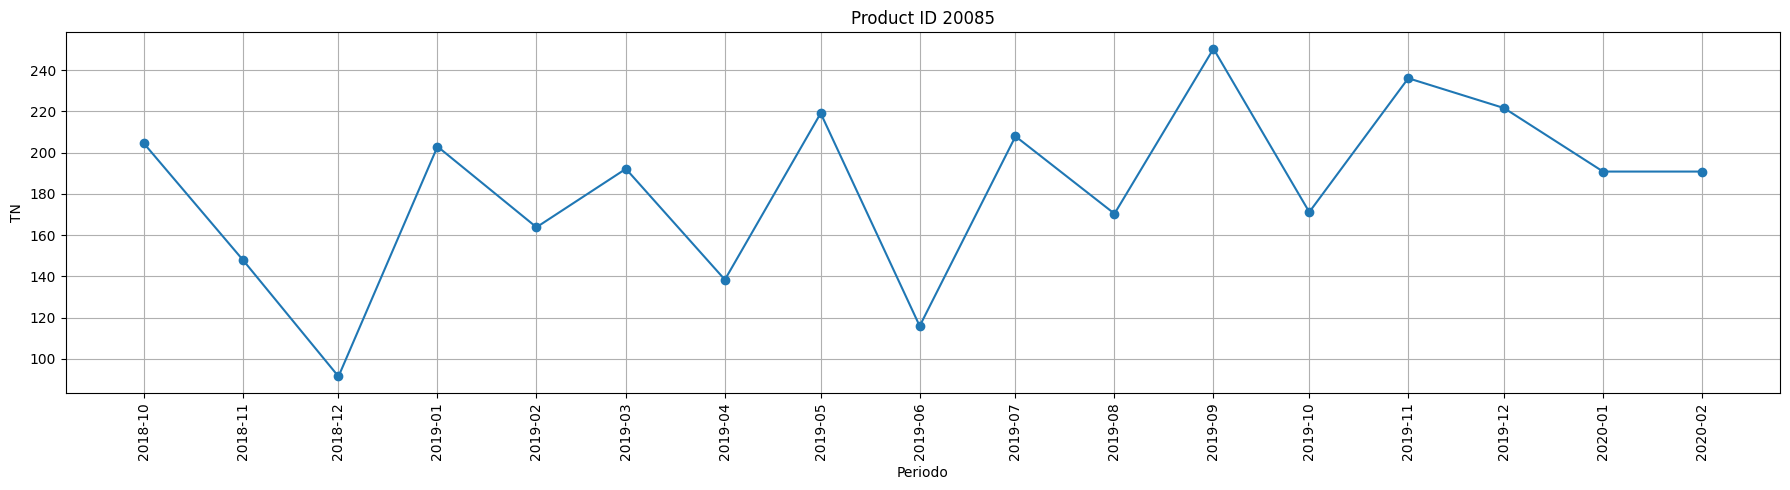

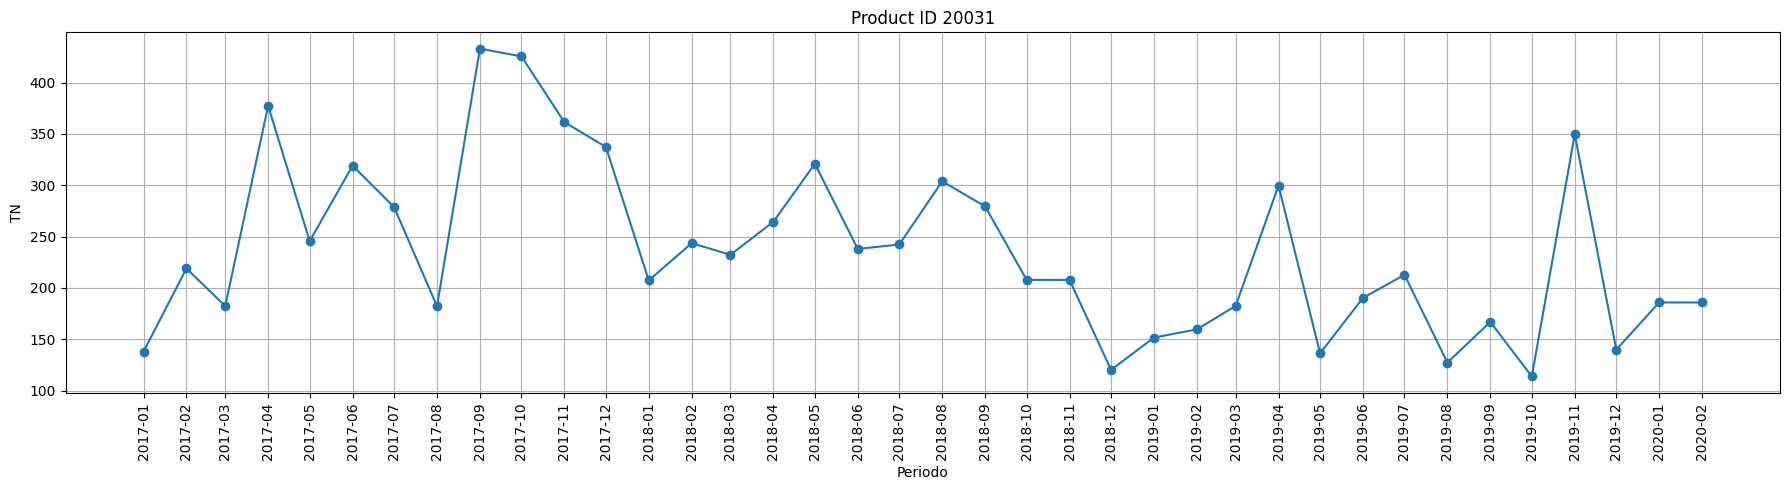

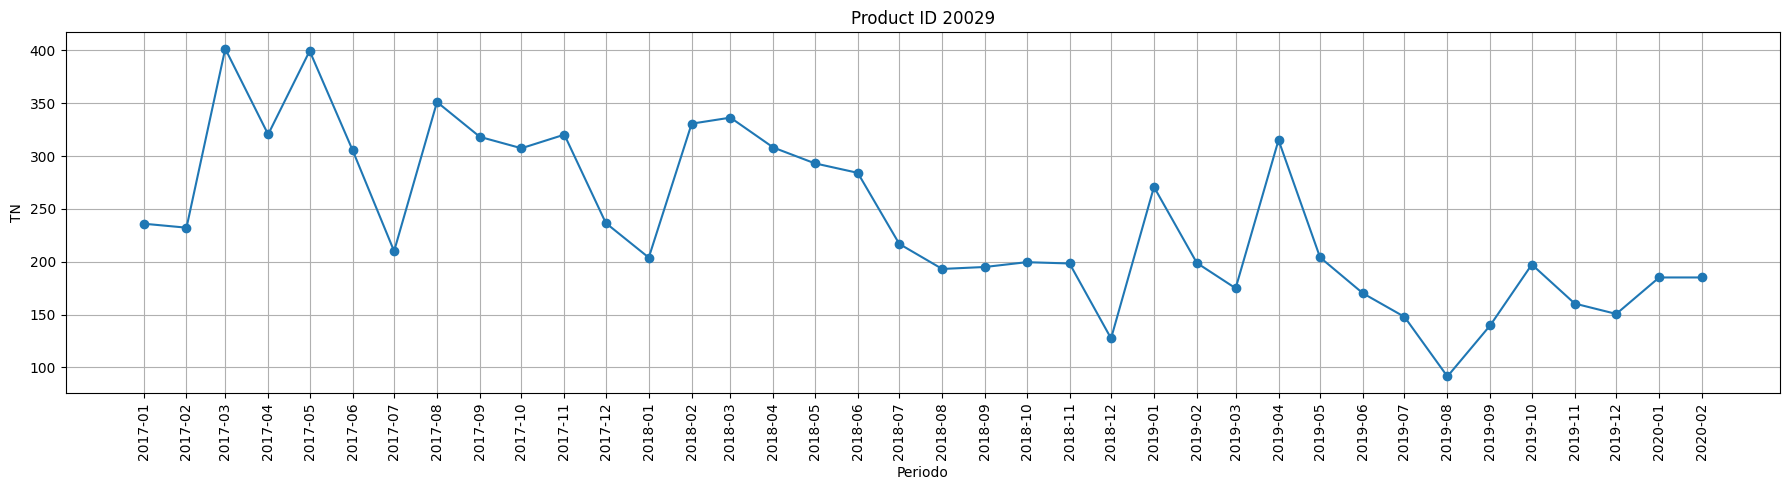

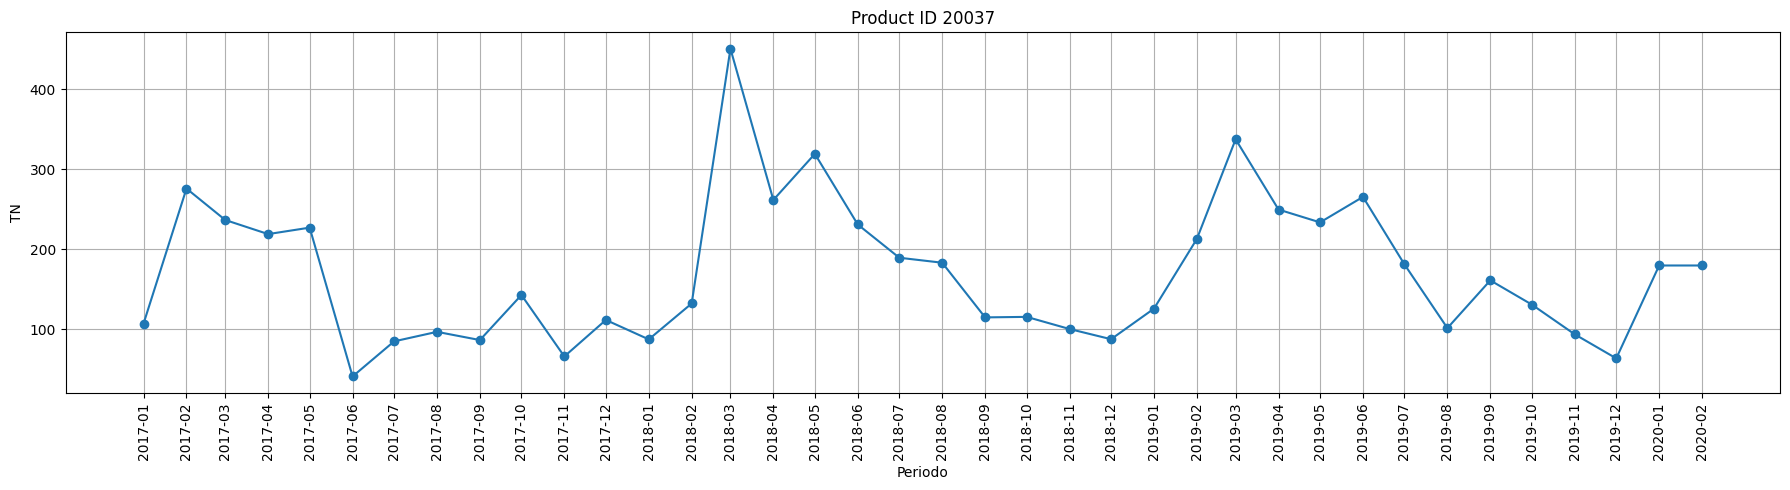

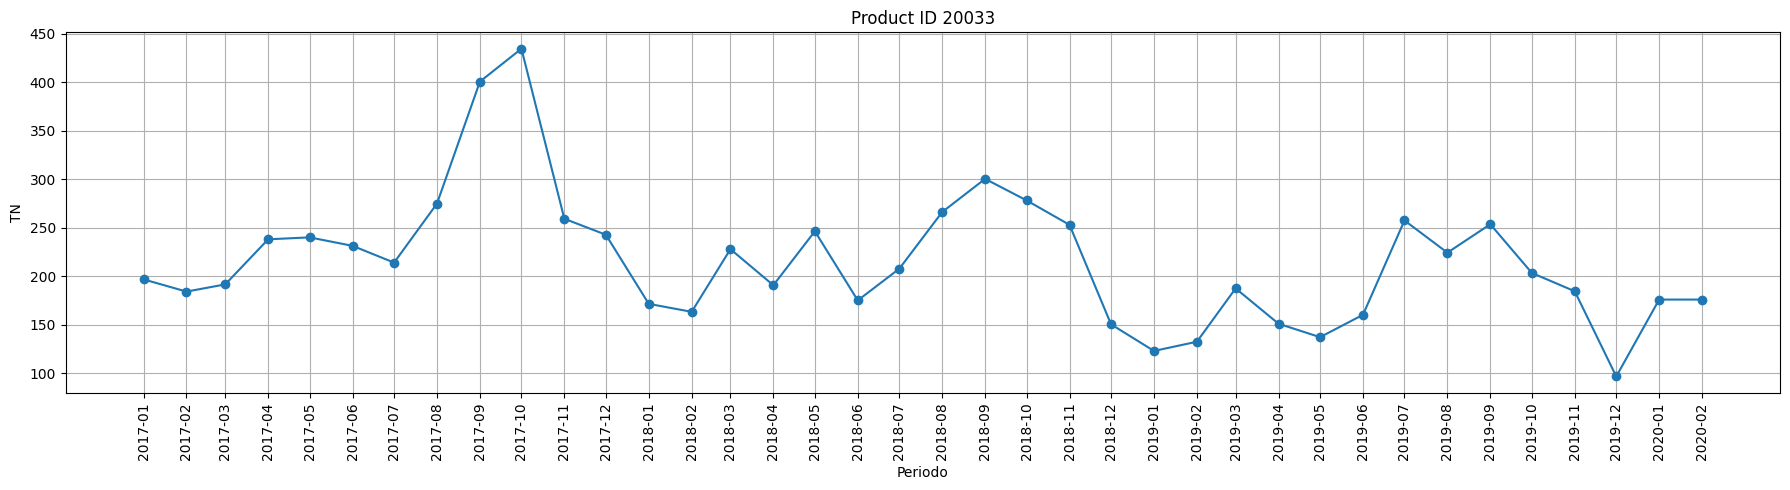

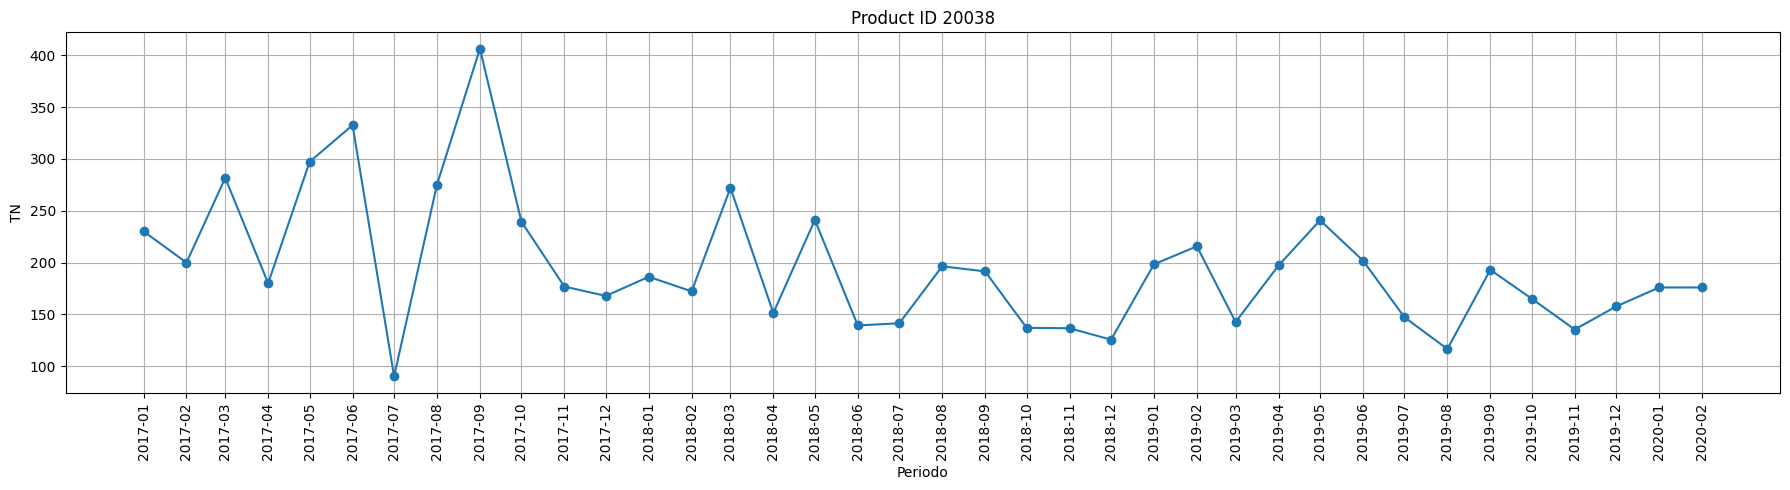

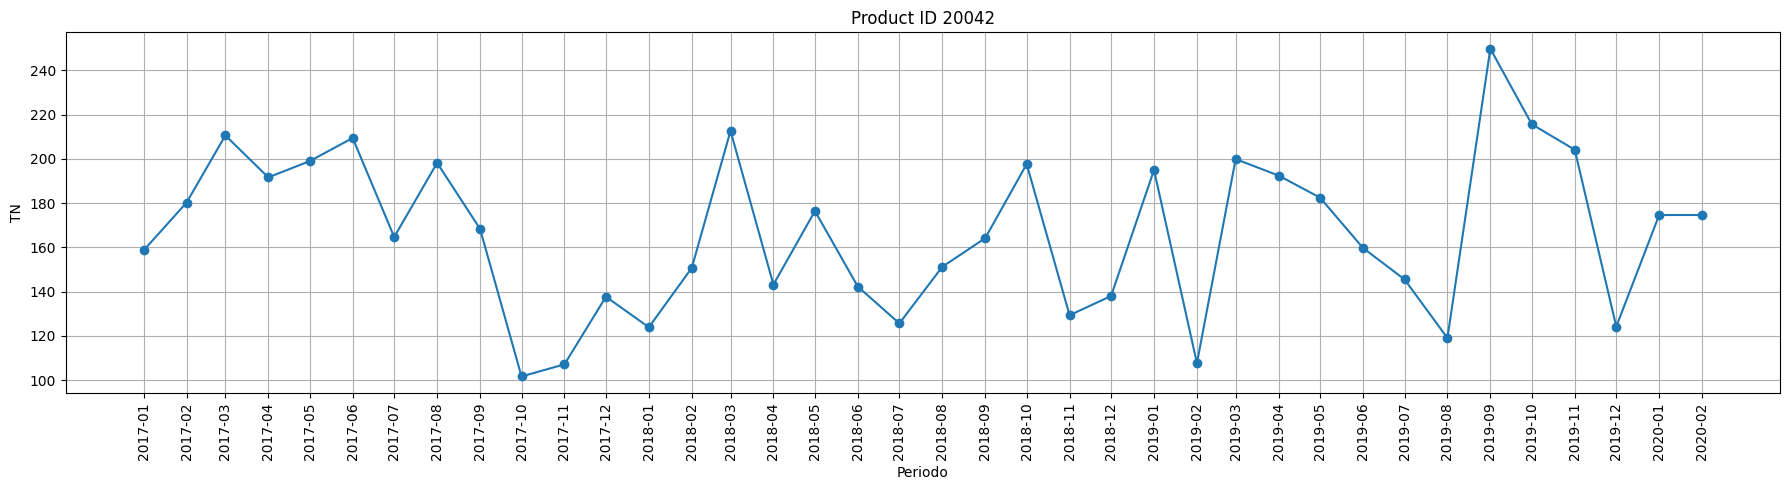

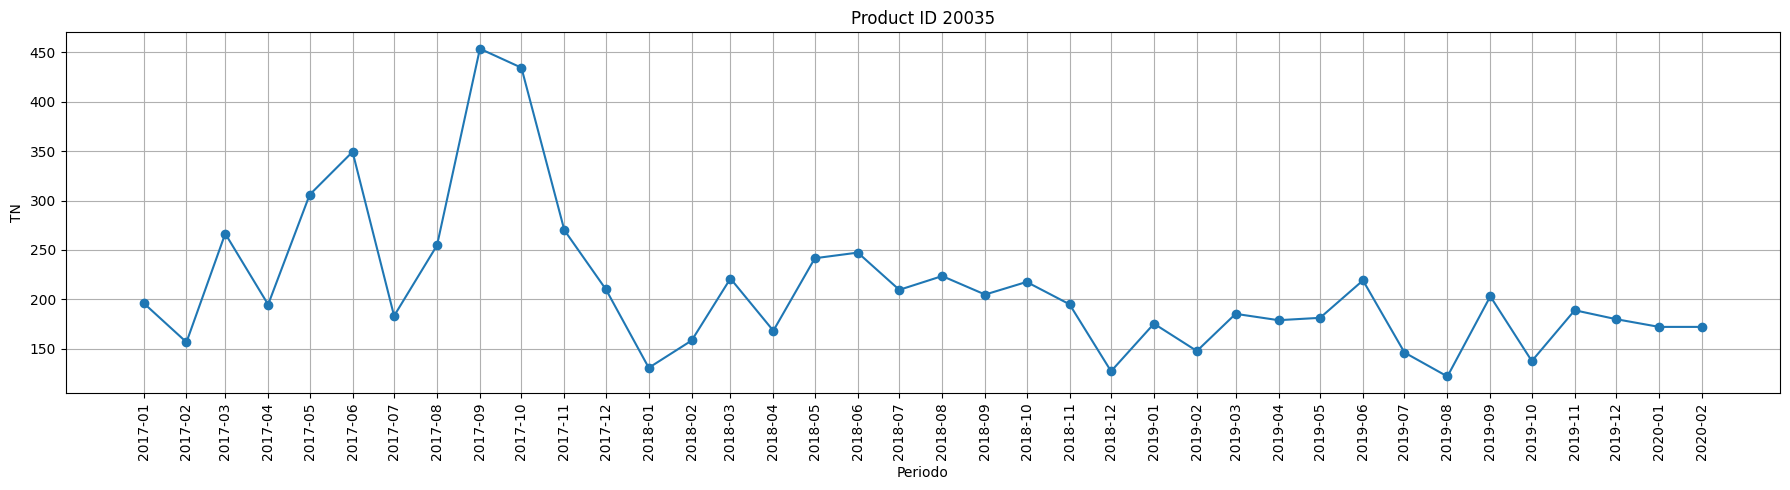

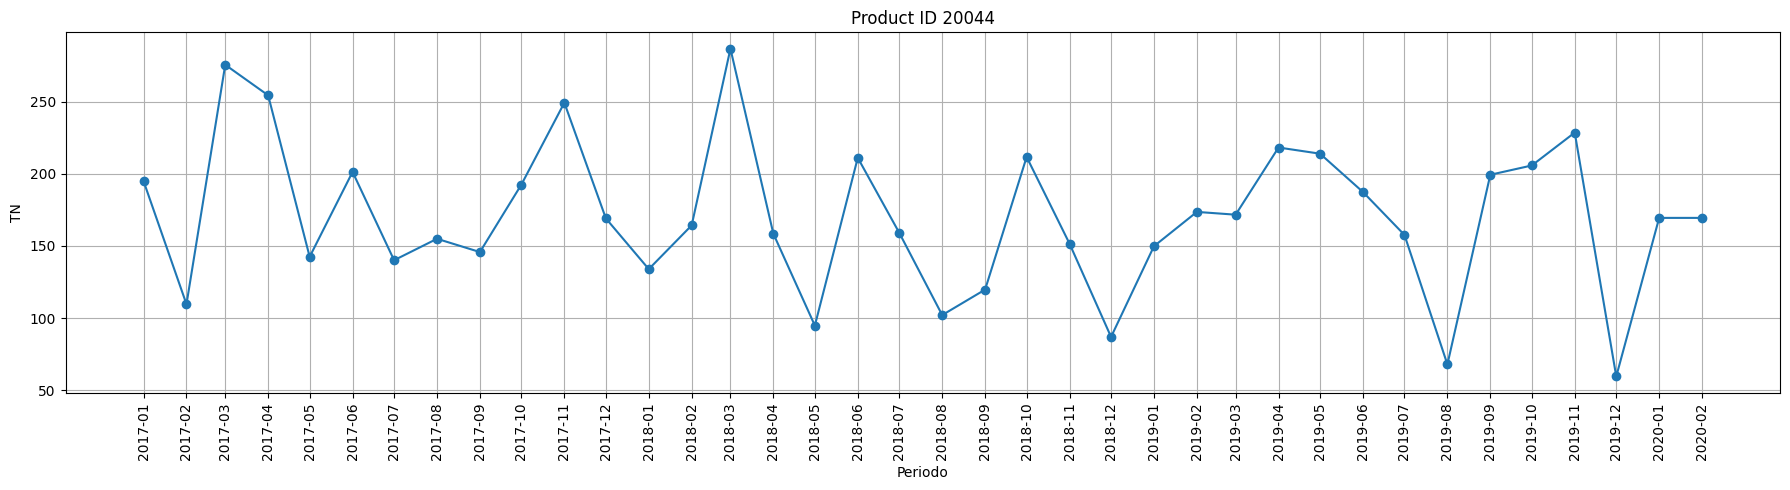

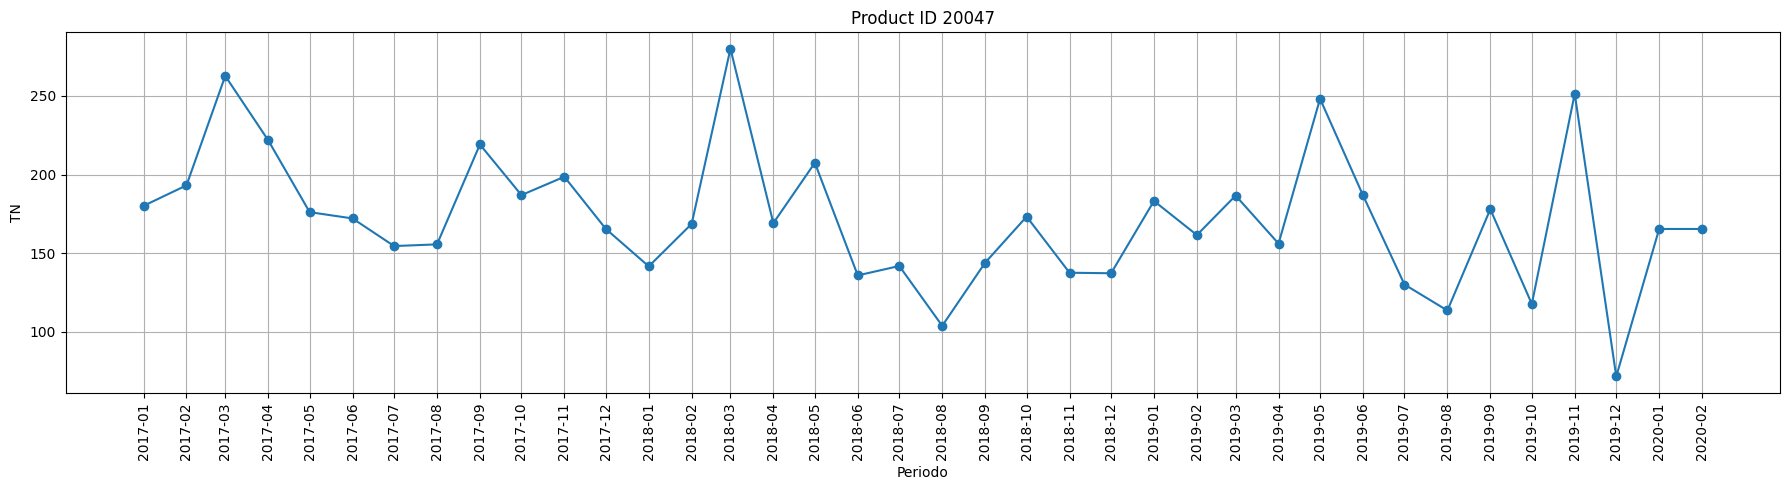

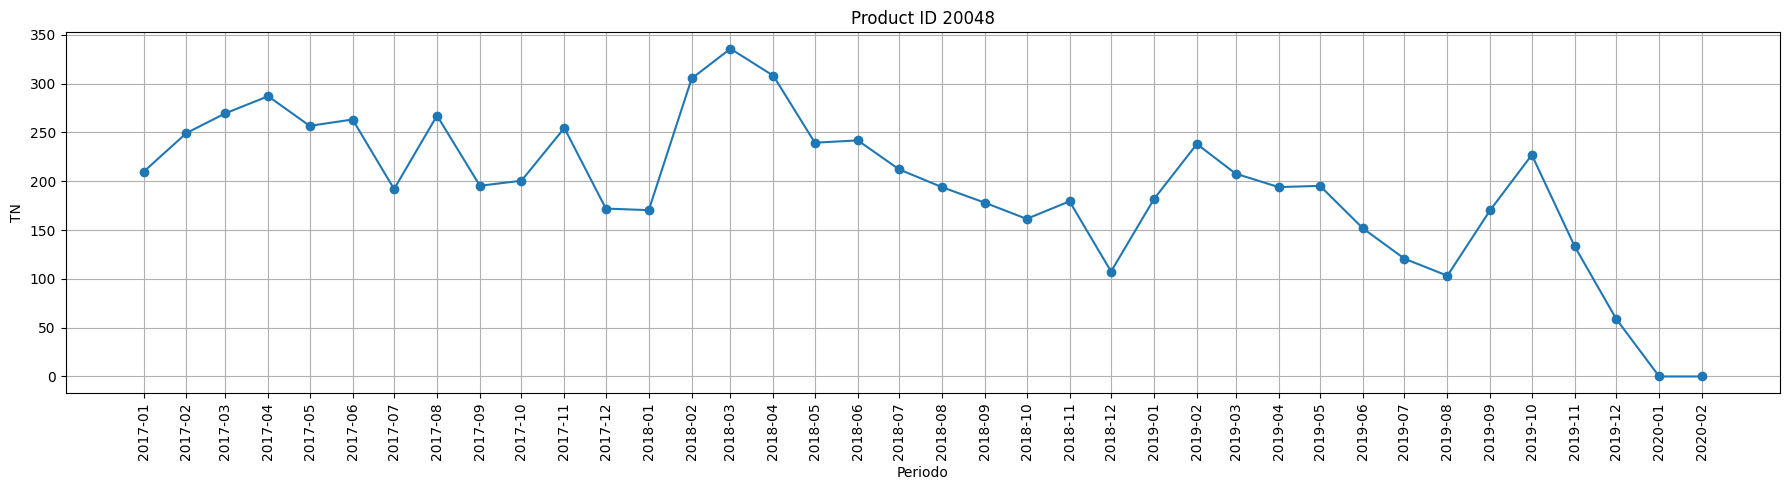

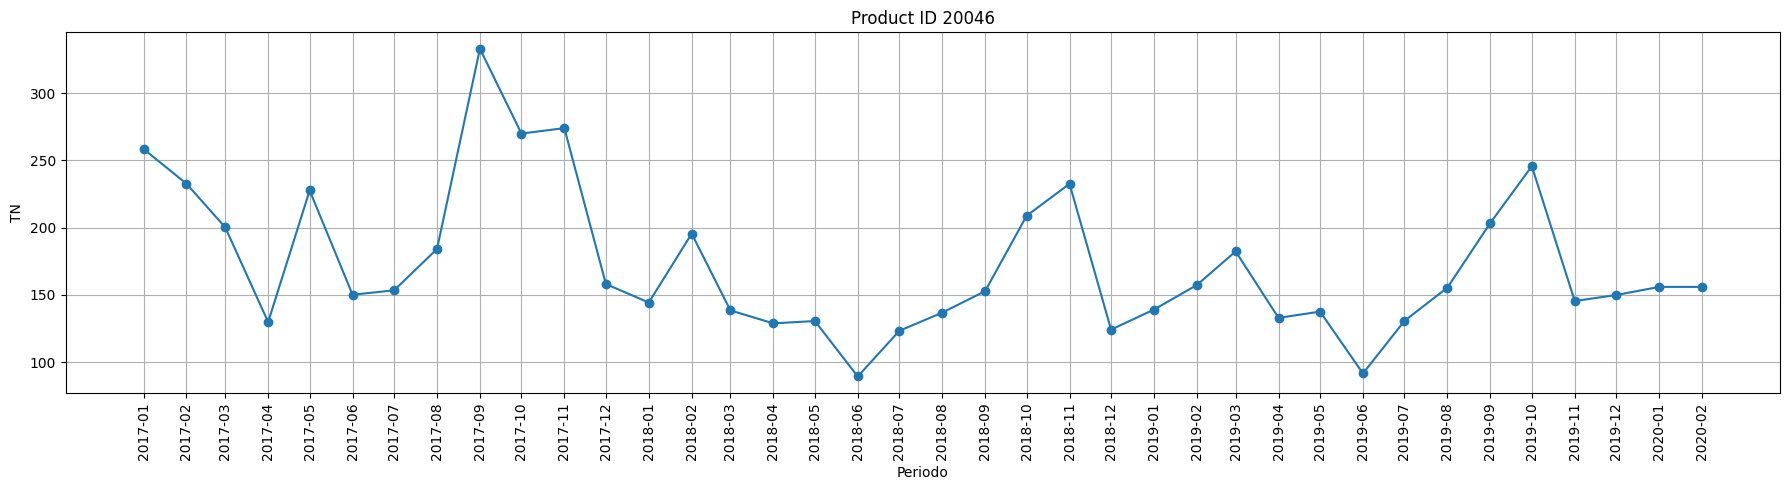

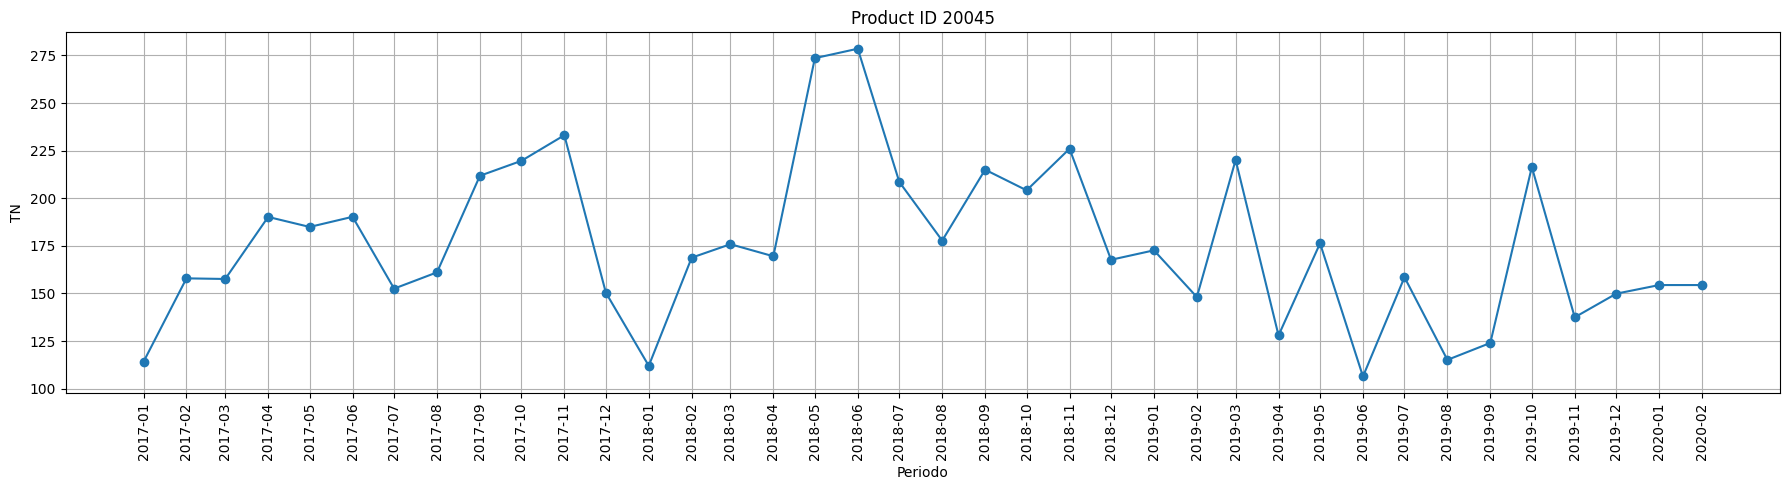

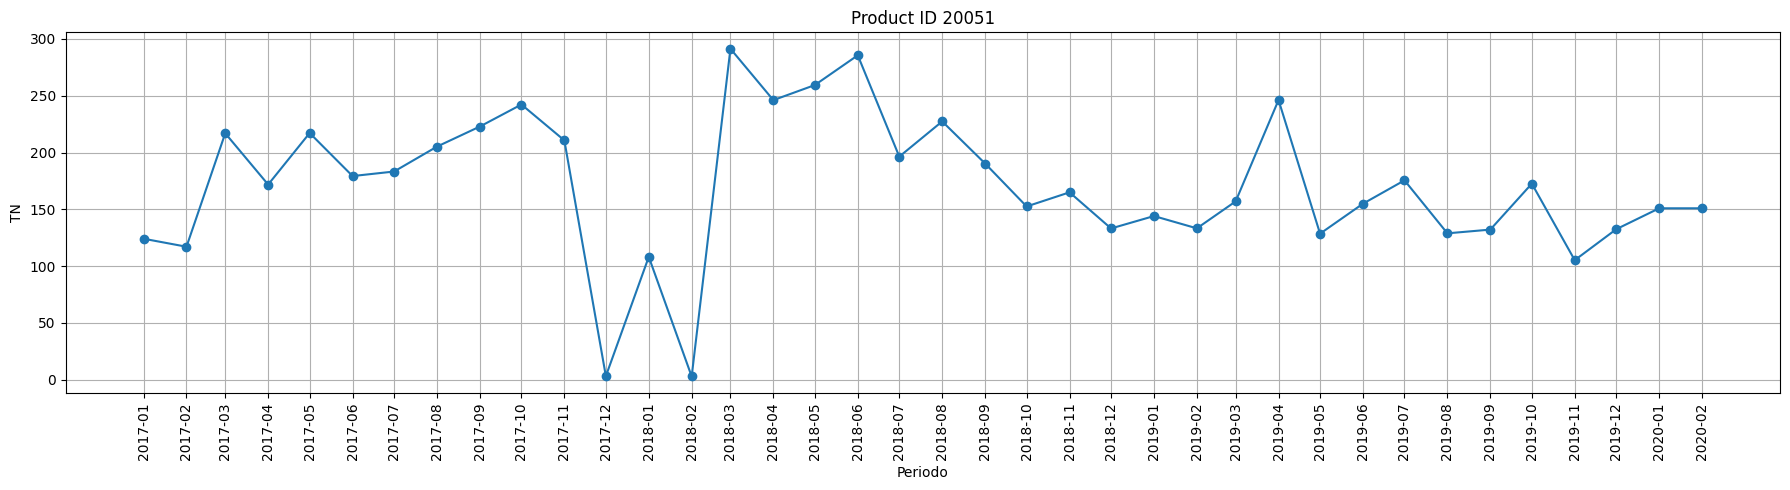

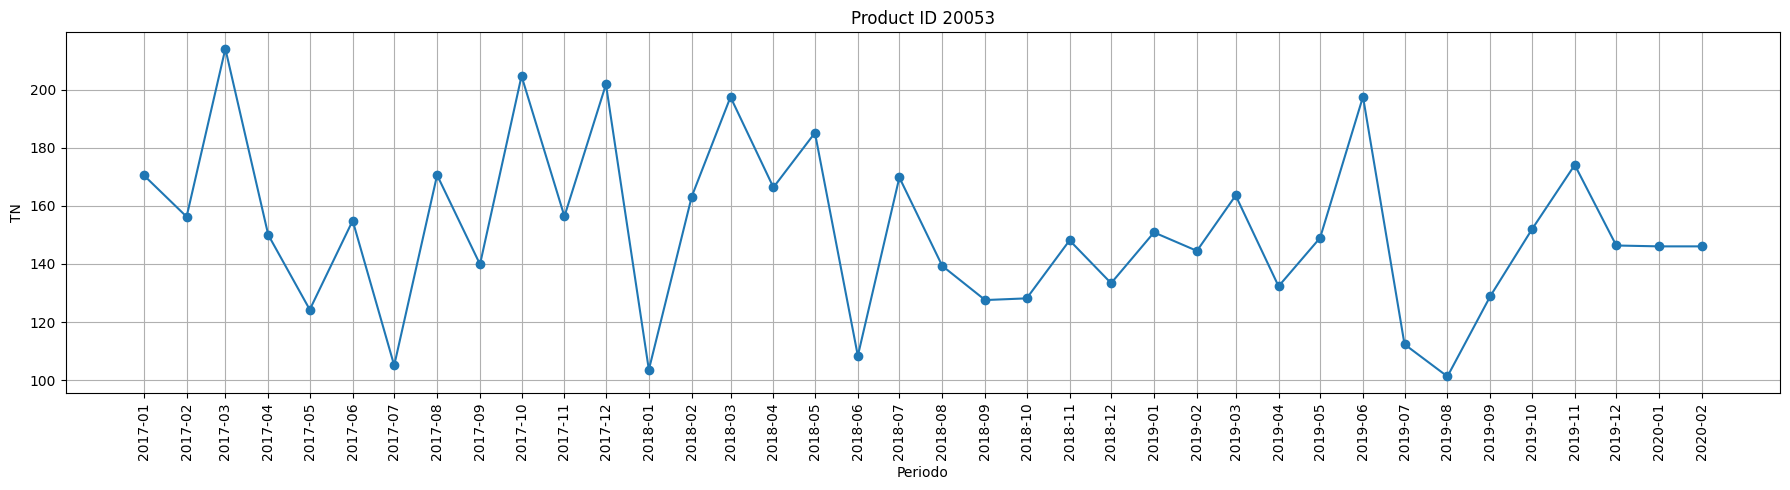

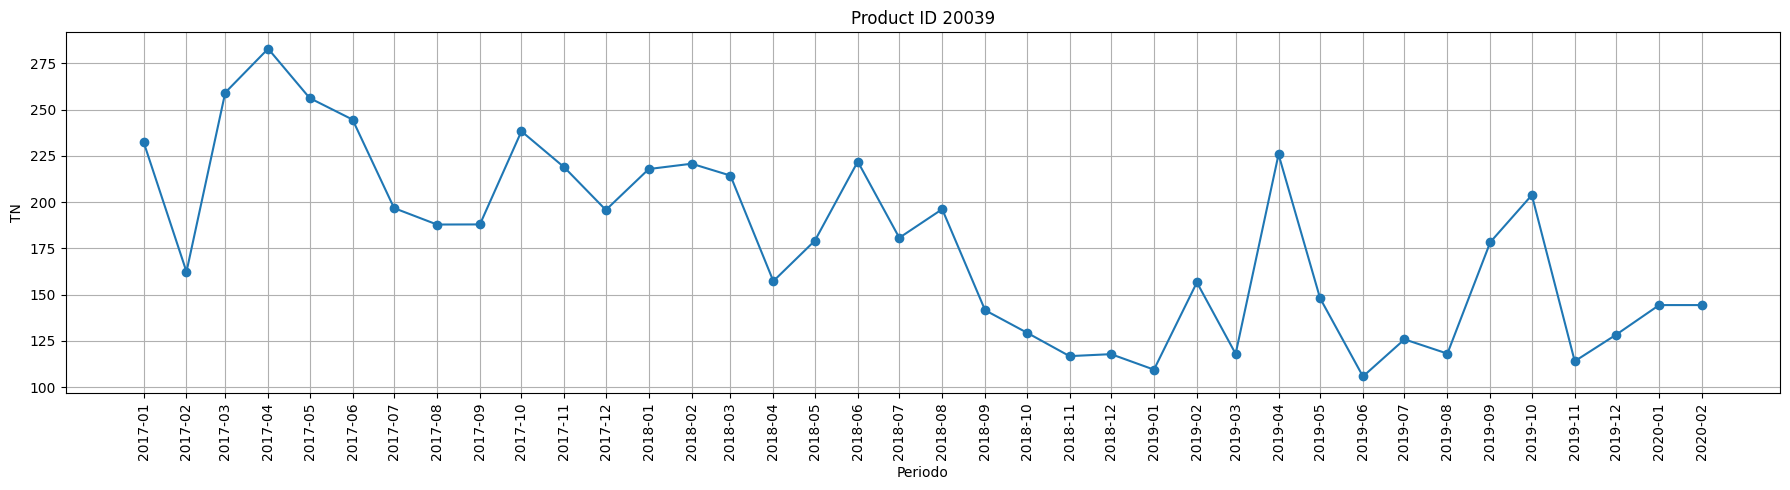

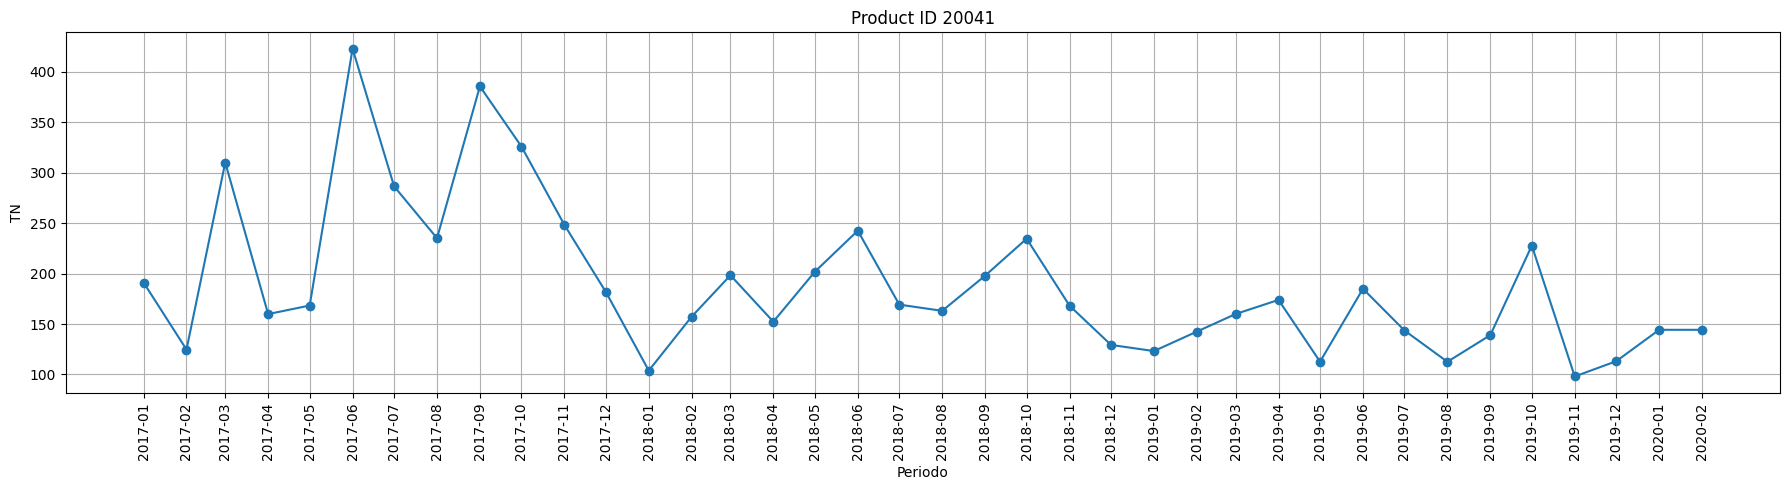

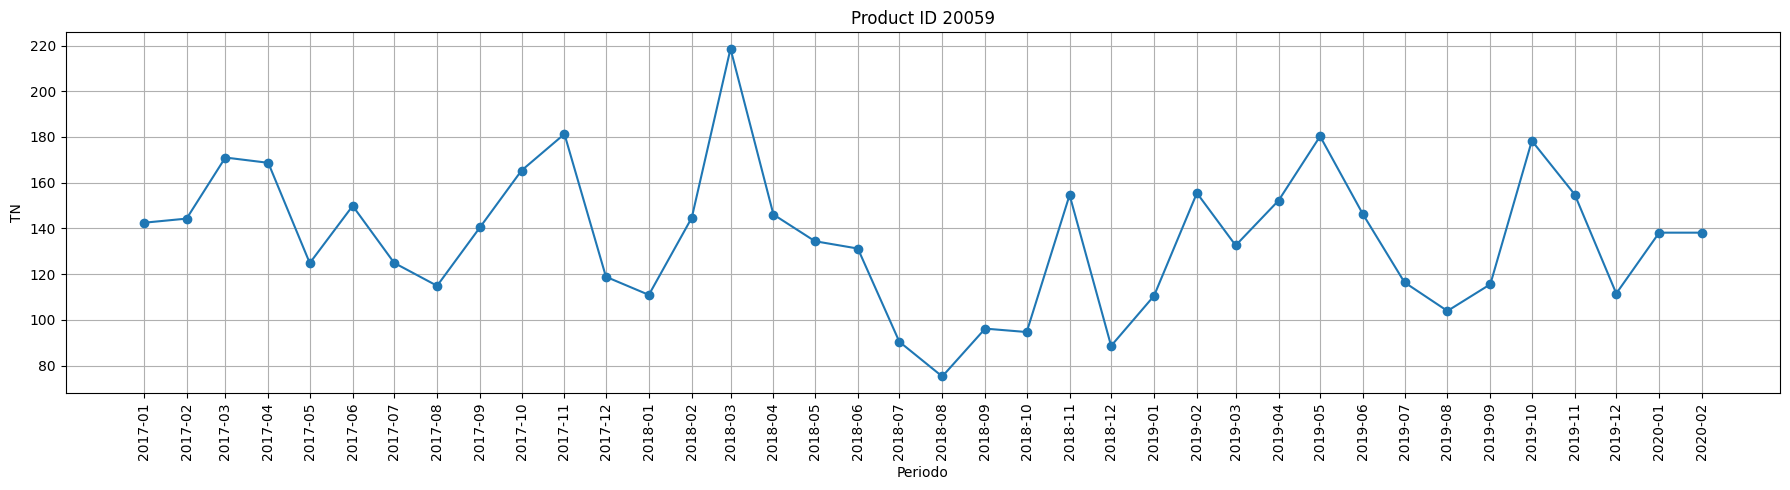

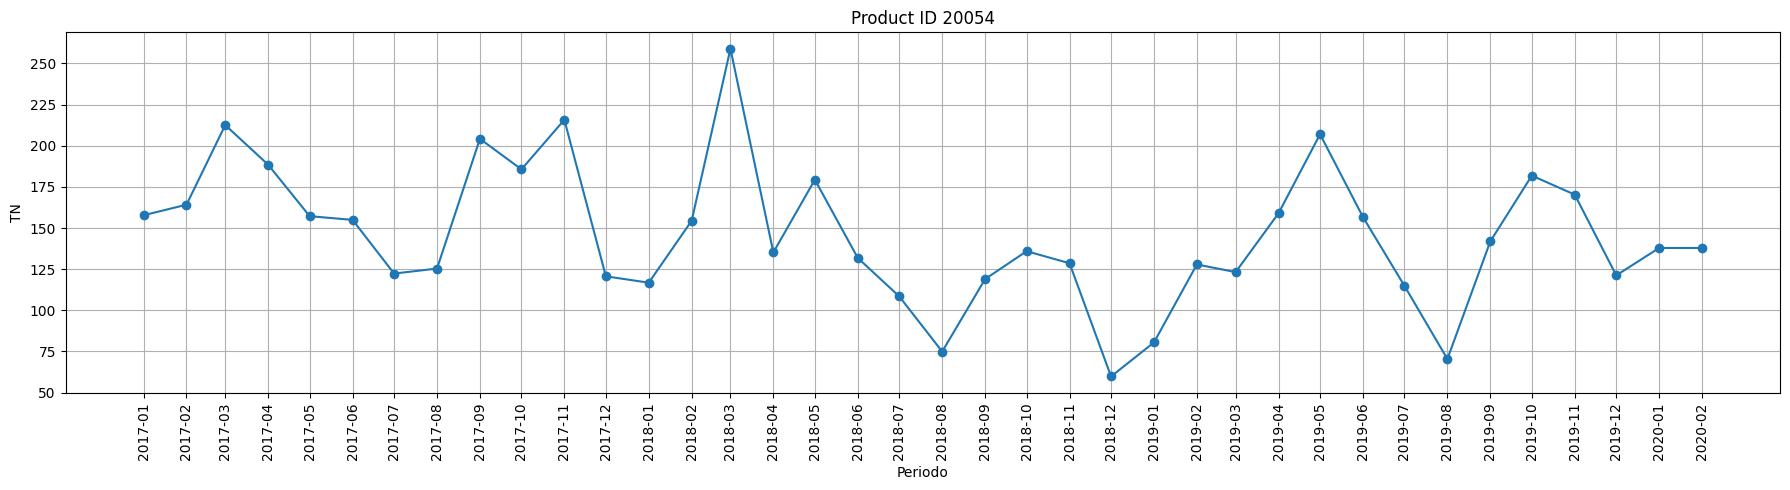

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Suponiendo que ya tienes sell_in_group_top50 y graficos_promedio definidos

# Convertir 'periodo' a formato de fecha
sell_in_group_top50['periodo'] = pd.to_datetime(sell_in_group_top50['periodo'], format='%Y-%m-%d')
graficos_promedio['periodo'] = pd.to_datetime(graficos_promedio['periodo'], format='%Y-%m-%d')

# Obtener una lista de product_id únicos
unique_product_ids = sell_in_group_top50['product_id'].unique()

# Crear un gráfico por cada product_id único
for product_id in unique_product_ids:
    # Filtrar los datos para el product_id específico
    data = sell_in_group_top50[sell_in_group_top50['product_id'] == product_id]

    # Obtener los dos últimos períodos de graficos_promedio para el product_id específico
    additional_data = graficos_promedio[graficos_promedio['product_id'] == product_id].tail(2)

    # Concatenar los datos originales con los períodos adicionales
    combined_data = pd.concat([data, additional_data])

    # Crear el gráfico
    plt.figure(figsize=(18, 5))
    plt.plot(combined_data['periodo'], combined_data['tn'], marker='o')
    plt.title(f'Product ID {product_id}')
    plt.xlabel('Periodo')
    plt.ylabel('TN')
    plt.grid(True)

    # Establecer las etiquetas del eje x como texto
    plt.xticks(combined_data['periodo'], combined_data['periodo'].dt.strftime('%Y-%m'))
    plt.xticks(rotation=90)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    plt.tight_layout()
    plt.show()
